# **PRÁCTICA 1: PREDICCIÓN DE LA PRODUCCIÓN DE ENERGÍA SOLAR**

**Aprendizaje Automatico Curso 2022/2023**

Grupo 10

*   Carmen Abans Maciel - 100432086@alumnos.uc3m.es
*   Noelia Hernandez Rodriguez - 100432116@alumnos.uc3m.es


# Librerías

In [1]:
''' Librerias en colab
!pip install --upgrade linear-tree
!pip install statsmodels 
!pip install pydot
!pip install graphviz
!pip install git+https://github.com/scikit-optimize/scikit-optimize.git
!pip install mlxtend
'''

' Librerias en colab\n!pip install --upgrade linear-tree\n!pip install statsmodels \n!pip install pydot\n!pip install graphviz\n!pip install git+https://github.com/scikit-optimize/scikit-optimize.git\n!pip install mlxtend\n'

In [2]:

'''%pip install --upgrade linear-tree
%pip install statsmodels 
%pip install pydot
%pip install graphviz
# %pip install git+https://github.com/scikit-optimize/scikit-optimize.git
%pip install scikit-optimize
%pip install mlxtend
%pip install xgboost
%pip install lightgbm
%conda install -c conda-forge lightgbm'''


'%pip install --upgrade linear-tree\n%pip install statsmodels \n%pip install pydot\n%pip install graphviz\n# %pip install git+https://github.com/scikit-optimize/scikit-optimize.git\n%pip install scikit-optimize\n%pip install mlxtend\n%pip install xgboost\n%pip install lightgbm\n%conda install -c conda-forge lightgbm'

In [3]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
import statistics
import time

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import matplotlib.ticker as ticker

# Preprocesado y modelado
# ==============================================================================
from sklearn import metrics
from sklearn import tree
from lineartree import LinearTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from pprint import pprint
import multiprocessing

from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV, cross_validate, cross_val_score, RepeatedKFold, GridSearchCV, ParameterGrid, PredefinedSplit
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.decomposition import PCA
from sklearn.svm import SVR, SVC, LinearSVR
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.utils.fixes import loguniform

from scipy.stats import pearsonr
from scipy.stats import randint as sp_randint

from skopt import BayesSearchCV
from skopt.space import Real
from skopt.plots import plot_convergence, plot_objective

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Cargar los conjuntos de datos

In [4]:
'''# En colab
from google.colab import drive
drive.mount('/content/gdrive')

import os
# dir Carmen
os.chdir("/content/gdrive/MyDrive/Curso_2022-23/Aprendizaje Automatico/Aprendizaje automático")
# dir Noe
#os.chdir("/content/gdrive/MyDrive/4º Universidad/Aprendizaje automático")
'''

'# En colab\nfrom google.colab import drive\ndrive.mount(\'/content/gdrive\')\n\nimport os\n# dir Carmen\nos.chdir("/content/gdrive/MyDrive/Curso_2022-23/Aprendizaje Automatico/Aprendizaje automático")\n# dir Noe\n#os.chdir("/content/gdrive/MyDrive/4º Universidad/Aprendizaje automático")\n'

In [5]:
# Leer conjuntos de datos
disp_df = pd.read_csv("disp_st10ns1.txt.bz2", compression="bz2",index_col=0)
comp_df = pd.read_csv("comp_st10ns1.txt.bz2",compression="bz2", index_col=0)

In [6]:
# Lista con los nombres de las variables
feat_names = disp_df.columns[:-1]

In [7]:
# Cambiamos las opciones de respresentación para poder ver todos los valores
pd.options.display.max_columns = 76
pd.options.display.max_rows = 76

# Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos (EDA por sus siglas en inglés) es una técnica utilizada en la ciencia de datos para analizar y resumir las principales características de un conjunto de datos. El objetivo del EDA es descubrir patrones, tendencias, relaciones y anomalías en los datos y utilizar esta información para comprender mejor los datos y tomar decisiones informadas. Esto nos permite obtener una mejor comprensión de los datos y tomar decisiones informadas sobre el modelado y la elección de los algoritmos de aprendizaje automático adecuados para el problema. Además, el EDA también puede ayudar a identificar problemas de calidad de los datos y proporcionar información útil para las decisiones comerciales. 

## Paso 1. Visualizar los datos
Utilizamos la función head() de pandas para visualizar las 5 primeras filas del dataset y asegurarnos de que los datos se han cargado correctamente.

In [8]:
disp_df.head()

apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1         0.0    0.000000    0.000000         0.0         0.0  226.038128   
V2         0.0    0.007273    0.051818         0.0         0.0  264.453142   
V3         0.0    0.000000    0.000000         0.0         0.0  215.098183   
V4         0.0    0.000000    0.000000         0.0         0.0  228.135775   
V5         0.0    0.000000    0.000000         0.0         0.0  249.617293   

    dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  dswrf_s1_1  dswrf_s2_1  \
V1  223.605277  228.265395  248.832217  250.104714         0.0        10.0   
V2  243.551397  245.345732  240.532651  235.747265         0.0        10.0   
V3  216.996022  224.678547  253.710940  255.021949         0.0        10.0   
V4  209.441999  215.039039  240.547283  242.804048         0.0        10.0   
V5  252.472505  264.669004  287.213609  281.754644         0.0        10.0   

    dswrf_s3_1  dswrf_s4_1  dswrf_s5_1     pres_ms1_1     pres_ms2_1  \
V1  171.818182  500.000000  335.454545  102260.985795  102386.627131   
V2  161.818182  506.363636  347.272727  101326.101562  101651.389205   
V3  176.363636  500.000000  341.000000  102196.926136  102032.828835   
V4  180.000000  506.363636  345.090909  102971.335227  102989.509233   
V5  150.909091  477.272727  331.818182  100650.478693  100426.941761   

       pres_ms3_1     pres_ms4_1     pres_ms5_1  pwat_ea1_1  pwat_ea2_1  \
V1  102170.235085  101609.680398  101586.578125    5.306466    6.236364   
V2  101988.634943  101854.164062  102233.978693    6.370703    6.296407   
V3  101541.007812  101125.715909  101192.544744    4.599497    6.140347   
V4  102684.528409  102130.329545  101980.115767    4.208086    4.641686   
V5  100024.987216   99610.339489   99806.674716    9.019811    8.389178   

    pwat_ea3_1  pwat_ea4_1  pwat_ea5_1  spfh_2m1_1  spfh_2m2_1  spfh_2m3_1  \
V1    6.815345    7.090909    7.473324    0.002158    0.002144    0.002234   
V2    6.613901    4.640862    4.297002    0.002648    0.002141    0.002490   
V3    7.545455    8.672727    9.136364    0.002112    0.002099    0.002042   
V4    6.208357    8.495449    9.620929    0.002149    0.002100    0.001961   
V5    7.744145    8.684057    6.838524    0.002489    0.002175    0.002032   

    spfh_2m4_1  spfh_2m5_1  tcdc_ea1_1  tcdc_ea2_1  tcdc_ea3_1  tcdc_ea4_1  \
V1    0.002320    0.002387    0.002727    0.000000    0.000909    0.012727   
V2    0.002040    0.001818    0.052727    0.060909    0.001818    0.000000   
V3    0.002122    0.002394    0.000000    0.002727    0.000000    0.000000   
V4    0.002024    0.002272    0.000000    0.000000    0.002727    0.001818   
V5    0.002334    0.002499    0.002727    0.050000    0.065455    0.014545   

    tcdc_ea5_1  tcolc_e1_1  tcolc_e2_1  tcolc_e3_1  tcolc_e4_1  tcolc_e5_1  \
V1    0.013636    0.003200    0.000791    0.002736    0.012282    0.014409   
V2    0.000000    0.051764    0.060827    0.002936    0.001264    0.000336   
V3    0.014545    0.000773    0.003345    0.001082    0.001000    0.013536   
V4    0.000000    0.000091    0.000200    0.002464    0.004173    0.000945   
V5    0.008182    0.004455    0.049982    0.064718    0.014991    0.004964   

    tmax_2m1_1  tmax_2m2_1  tmax_2m3_1  tmax_2m4_1  tmax_2m5_1  tmin_2m1_1  \
V1  277.117060  274.745625  280.991400  284.327137  284.322185  274.381661   
V2  279.449596  279.363378  281.564040  282.015772  282.016124  277.695279   
V3  273.080095  273.469790  281.040336  285.338606  285.604378  271.314217   
V4  278.423318  272.731462  277.968628  281.795826  281.881120  272.757299   
V5  279.422078  280.154388  290.215465  293.762063  293.756051  278.485687   

    tmin_2m2_1  tmin_2m3_1  tmin_2m4_1  tmin_2m5_1  tmp_2m_1_1  tmp_2m_2_1  \
V1  273.570798  273.571997  281.150593  279.944225  274.403797  274.739483   
V2  278.564264  278.564264  281.583371  278.371993  279.291709  278.797660   
V3  271.765001  271.763708  281.217244  279.711054  271.917788  273.4697

## Paso 2. Verificar la información de los datos
Utilizamos la función info() de pandas para verificar la información de los datos, como el número de filas y columnas, los tipos de datos y si hay valores nulos.


In [9]:
disp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4380 entries, V1 to V4380
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  4380 non-null   float64
 1   apcp_sf2_1  4380 non-null   float64
 2   apcp_sf3_1  4380 non-null   float64
 3   apcp_sf4_1  4380 non-null   float64
 4   apcp_sf5_1  4380 non-null   float64
 5   dlwrf_s1_1  4380 non-null   float64
 6   dlwrf_s2_1  4380 non-null   float64
 7   dlwrf_s3_1  4380 non-null   float64
 8   dlwrf_s4_1  4380 non-null   float64
 9   dlwrf_s5_1  4380 non-null   float64
 10  dswrf_s1_1  4380 non-null   float64
 11  dswrf_s2_1  4380 non-null   float64
 12  dswrf_s3_1  4380 non-null   float64
 13  dswrf_s4_1  4380 non-null   float64
 14  dswrf_s5_1  4380 non-null   float64
 15  pres_ms1_1  4380 non-null   float64
 16  pres_ms2_1  4380 non-null   float64
 17  pres_ms3_1  4380 non-null   float64
 18  pres_ms4_1  4380 non-null   float64
 19  pres_ms5_1  4380 non-null   fl

Podemos ver que hay 4380 filas (instancias) y 76 columnas (atributos) y que no tenemos valores nulos.

Tambien podemos ver que todas las variables son de tipo float64 menos dos ('uswrf_s1_1' y 'salida') que son int64. Para evitar problemas vamos a poner todos los datos en tipo float64.

In [10]:
disp_df["uswrf_s1_1"] = disp_df["uswrf_s1_1"].astype(float)
disp_df["salida"] = disp_df["salida"].astype(float)

# Comprobamos que se ha modificado el dataset correctamente
disp_df.dtypes   # Devuelve una serie con los tipos de datos de las columnas

apcp_sf1_1    float64
apcp_sf2_1    float64
apcp_sf3_1    float64
apcp_sf4_1    float64
apcp_sf5_1    float64
dlwrf_s1_1    float64
dlwrf_s2_1    float64
dlwrf_s3_1    float64
dlwrf_s4_1    float64
dlwrf_s5_1    float64
dswrf_s1_1    float64
dswrf_s2_1    float64
dswrf_s3_1    float64
dswrf_s4_1    float64
dswrf_s5_1    float64
pres_ms1_1    float64
pres_ms2_1    float64
pres_ms3_1    float64
pres_ms4_1    float64
pres_ms5_1    float64
pwat_ea1_1    float64
pwat_ea2_1    float64
pwat_ea3_1    float64
pwat_ea4_1    float64
pwat_ea5_1    float64
spfh_2m1_1    float64
spfh_2m2_1    float64
spfh_2m3_1    float64
spfh_2m4_1    float64
spfh_2m5_1    float64
tcdc_ea1_1    float64
tcdc_ea2_1    float64
tcdc_ea3_1    float64
tcdc_ea4_1    float64
tcdc_ea5_1    float64
tcolc_e1_1    float64
tcolc_e2_1    float64
tcolc_e3_1    float64
tcolc_e4_1    float64
tcolc_e5_1    float64
tmax_2m1_1    float64
tmax_2m2_1    float64
tmax_2m3_1    float64
tmax_2m4_1    float64
tmax_2m5_1    float64
tmin_2m1_1

## Paso 3. Describir estadisticamente los datos

Utilizamos la función df.describe() de pandas para obtener un resumen estadístico para cada columna del dataset, como la media, la desviación típica, el mínimo, el máximo y los cuartiles.

In [11]:
disp_df.columns[:5]

# https://aprendeconalf.es/docencia/python/manual/pandas/ 

Index(['apcp_sf1_1', 'apcp_sf2_1', 'apcp_sf3_1', 'apcp_sf4_1', 'apcp_sf5_1'], dtype='object')

In [12]:
disp_df.describe()

apcp_sf1_1   apcp_sf2_1   apcp_sf3_1   apcp_sf4_1   apcp_sf5_1  \
count  4380.000000  4380.000000  4380.000000  4380.000000  4380.000000   
mean      0.275064     0.102562     0.207064     0.128043     0.263712   
std       1.144788     0.497947     0.958178     0.582461     1.147248   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.028182     0.002727     0.006364     0.000000     0.003636   
max      19.467273    13.839091    26.960000    10.826364    18.732727   

        dlwrf_s1_1   dlwrf_s2_1   dlwrf_s3_1   dlwrf_s4_1   dlwrf_s5_1  \
count  4380.000000  4380.000000  4380.000000  4380.000000  4380.000000   
mean    288.396020   286.545944   295.080237   318.934828   318.760309   
std      49.209586    49.923676    52.307320    58.197269    58.466024   
min     157.038861   158.800598   166.051289   172.349099   174.851411   
25%     248.766473   245.813904   252.265219   271.256530   271.121226   
50%     283.990642   281.802236   290.189076   312.549924   312.090302   
75%     331.698893   330.773709   342.668899   373.085072   372.497629   
max     409.035104   401.117781   403.510046   447.993383   452.592821   

        dswrf_s1_1   dswrf_s2_1   dswrf_s3_1   dswrf_s4_1   dswrf_s5_1  \
count  4380.000000  4380.000000  4380.000000  4380.000000  4380.000000   
mean      0.008925   136.791345   362.123039   740.912848   569.889332   
std       0.083877   104.091754   149.423761   209.297867   191.365917   
min       0.000000     0.000000    28.181818    66.363636    45.636364   
25%       0.000000    34.545455   220.000000   555.454545   389.477273   
50%       0.000000   120.000000   369.909091   777.727273   595.909091   
75%       0.000000   229.522727   498.022727   937.272727   748.772727   
max       1.000000   340.000000   611.454545  1060.000000   885.818182   

          pres_ms1_1     pres_ms2_1     pres_ms3_1     pres_ms4_1  \
count    4380.000000    4380.000000    4380.000000    4380.000000   
mean   101630.021751  101640.122522  101514.930880  101248.659738   
std       808.610283     819.223369     801.052843     784.018795   
min     98699.982955   98349.384233   97931.701705   97752.130682   
25%    101088.507990  101096.288352  100993.540838  100741.264382   
50%    101565.964844  101575.147017  101456.114702  101195.477628   
75%    102127.576882  102152.797230  102015.142045  101730.342507   
max    104555.889205  104754.615767  104615.682528  104153.676136   

          pres_ms5_1   pwat_ea1_1   pwat_ea2_1   pwat_ea3_1   pwat_ea4_1  \
count    4380.000000  4380.000000  4380.000000  4380.000000  4380.000000   
mean   101203.190884    14.043588    13.809434    14.034994    14.354721   
std       819.533616     8.509415     8.383788     8.489586     8.606777   
min     98279.956676     1.160083     0.919741     1.199415     1.372287   
25%    100663.696733     7.322952     7.164736     7.348213     7.525223   
50%    101151.152699    11.363636    11.224966    11.320196    11.623848   
75%    101709.696733    19.786544    19.283453    19.620454    20.437326   
max    104107.937500    42.983432    42.609091    43.054546    42.409603   

        pwat_ea5_1   spfh_2m1_1   spfh_2m2_1   spfh_2m3_1   spfh_2m4_1  \
count  4380.000000  4380.000000  4380.000000  4380.000000  4380.000000   
mean     14.594284     0.005553     0.005769     0.005691     0.005430   
std       8.790211     0.003333     0.003384     0.003168     0.002949   
min       1.206955     0.000566     0.000678     0.000692     0.000717   
25%       7.618157     0.002868     0.003021     0.003146     0.003085   
50%      11.758225     0.004414     0.004602     0.004678     0.004541   
75%      20.939612     0.008062     0.008489     0.008196     0.007597   
max      43.900409     0.016771     0.016555     0.016542     0.016262   

        spfh_2m5_1   tcdc_ea1_1  

Al ver el resumen observamos que :

- La variable apcp_sf4_1 y apcp_sf5_1 tiene gran parte de valores en 0.0, lo que indica que en la región llueve poco por la noche (21h, 24h). Tambien vemos 

- La variable dswrf_s1_1 solo tiene valores de 0-1 por lo que entra un flujo de radiación de onda corta a las 12h.

- La variable uswrf_s1_1 tiene el mismo valor para todas las estadisticas (0), lo que indica que todas las lecturas de este atributo son las mismas y por tanto no añaden información. Por ello, decidimos eliminar esta columna y asi disminuir la complejidad del problema. Esta variable se corresponde con el flujo de radiacion de onda corta que sale de la superficie, que pensamos que tiene sentido ya que si no entran ondas, tampoco salen.

In [13]:
disp_df.drop(['uswrf_s1_1'], axis=1, inplace=True)

# Actualizar lista con los nombres de las variables
feat_names = disp_df.columns[:-1]

# Comprobamos que se ha eliminado correctamente
disp_df.head()

apcp_sf1_1  apcp_sf2_1  apcp_sf3_1  apcp_sf4_1  apcp_sf5_1  dlwrf_s1_1  \
V1         0.0    0.000000    0.000000         0.0         0.0  226.038128   
V2         0.0    0.007273    0.051818         0.0         0.0  264.453142   
V3         0.0    0.000000    0.000000         0.0         0.0  215.098183   
V4         0.0    0.000000    0.000000         0.0         0.0  228.135775   
V5         0.0    0.000000    0.000000         0.0         0.0  249.617293   

    dlwrf_s2_1  dlwrf_s3_1  dlwrf_s4_1  dlwrf_s5_1  dswrf_s1_1  dswrf_s2_1  \
V1  223.605277  228.265395  248.832217  250.104714         0.0        10.0   
V2  243.551397  245.345732  240.532651  235.747265         0.0        10.0   
V3  216.996022  224.678547  253.710940  255.021949         0.0        10.0   
V4  209.441999  215.039039  240.547283  242.804048         0.0        10.0   
V5  252.472505  264.669004  287.213609  281.754644         0.0        10.0   

    dswrf_s3_1  dswrf_s4_1  dswrf_s5_1     pres_ms1_1     pres_ms2_1  \
V1  171.818182  500.000000  335.454545  102260.985795  102386.627131   
V2  161.818182  506.363636  347.272727  101326.101562  101651.389205   
V3  176.363636  500.000000  341.000000  102196.926136  102032.828835   
V4  180.000000  506.363636  345.090909  102971.335227  102989.509233   
V5  150.909091  477.272727  331.818182  100650.478693  100426.941761   

       pres_ms3_1     pres_ms4_1     pres_ms5_1  pwat_ea1_1  pwat_ea2_1  \
V1  102170.235085  101609.680398  101586.578125    5.306466    6.236364   
V2  101988.634943  101854.164062  102233.978693    6.370703    6.296407   
V3  101541.007812  101125.715909  101192.544744    4.599497    6.140347   
V4  102684.528409  102130.329545  101980.115767    4.208086    4.641686   
V5  100024.987216   99610.339489   99806.674716    9.019811    8.389178   

    pwat_ea3_1  pwat_ea4_1  pwat_ea5_1  spfh_2m1_1  spfh_2m2_1  spfh_2m3_1  \
V1    6.815345    7.090909    7.473324    0.002158    0.002144    0.002234   
V2    6.613901    4.640862    4.297002    0.002648    0.002141    0.002490   
V3    7.545455    8.672727    9.136364    0.002112    0.002099    0.002042   
V4    6.208357    8.495449    9.620929    0.002149    0.002100    0.001961   
V5    7.744145    8.684057    6.838524    0.002489    0.002175    0.002032   

    spfh_2m4_1  spfh_2m5_1  tcdc_ea1_1  tcdc_ea2_1  tcdc_ea3_1  tcdc_ea4_1  \
V1    0.002320    0.002387    0.002727    0.000000    0.000909    0.012727   
V2    0.002040    0.001818    0.052727    0.060909    0.001818    0.000000   
V3    0.002122    0.002394    0.000000    0.002727    0.000000    0.000000   
V4    0.002024    0.002272    0.000000    0.000000    0.002727    0.001818   
V5    0.002334    0.002499    0.002727    0.050000    0.065455    0.014545   

    tcdc_ea5_1  tcolc_e1_1  tcolc_e2_1  tcolc_e3_1  tcolc_e4_1  tcolc_e5_1  \
V1    0.013636    0.003200    0.000791    0.002736    0.012282    0.014409   
V2    0.000000    0.051764    0.060827    0.002936    0.001264    0.000336   
V3    0.014545    0.000773    0.003345    0.001082    0.001000    0.013536   
V4    0.000000    0.000091    0.000200    0.002464    0.004173    0.000945   
V5    0.008182    0.004455    0.049982    0.064718    0.014991    0.004964   

    tmax_2m1_1  tmax_2m2_1  tmax_2m3_1  tmax_2m4_1  tmax_2m5_1  tmin_2m1_1  \
V1  277.117060  274.745625  280.991400  284.327137  284.322185  274.381661   
V2  279.449596  279.363378  281.564040  282.015772  282.016124  277.695279   
V3  273.080095  273.469790  281.040336  285.338606  285.604378  271.314217   
V4  278.423318  272.731462  277.968628  281.795826  281.881120  272.757299   
V5  279.422078  280.154388  290.215465  293.762063  293.756051  278.485687   

    tmin_2m2_1  tmin_2m3_1  tmin_2m4_1  tmin_2m5_1  tmp_2m_1_1  tmp_2m_2_1  \
V1  273.570798  273.571997  281.150593  279.944225  274.403797  274.739483   
V2  278.564264  278.564264  281.583371  278.371993  279.291709  278.797660   
V3  271.765001  271.763708  281.217244  279.711054  271.917788  273.4697

## Paso 4. Visualizar la distribución de las variables

Utilizamos la función plot.box() y sns.histplot() de la librería Seaborn para visualizar la distribución de cada variable numérica en el dataset. La primera nos devuelve un boxplot con la distribucion y los valores outliers mientras que histplot nos devuelve un grafico de como varian las tomas en un gráfico de lineas.

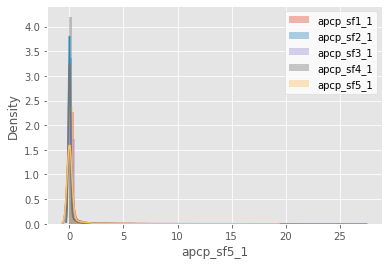

<AxesSubplot:>

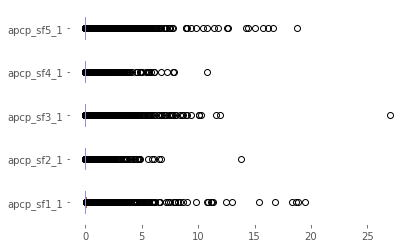

In [14]:
sns.distplot(disp_df["apcp_sf1_1"], kde=True, label="apcp_sf1_1")
sns.distplot(disp_df["apcp_sf2_1"], kde=True, label="apcp_sf2_1")
sns.distplot(disp_df["apcp_sf3_1"], kde=True, label="apcp_sf3_1")
sns.distplot(disp_df["apcp_sf4_1"], kde=True, label="apcp_sf4_1")
sns.distplot(disp_df["apcp_sf5_1"], kde=True, label="apcp_sf5_1")
sns.set_style(rc = {'axes.facecolor':'white'})
plt.legend()
plt.show()

disp_df[['apcp_sf1_1',  'apcp_sf2_1',   'apcp_sf3_1',   'apcp_sf4_1',   'apcp_sf5_1']].plot.box(vert = False, grid = True)

La variable apcp_sfc, que se corresponde con la precipitacion acumulada en las ultimas 3h en la superficie, indica que en su mayoria vale 0, con varios valores atipicos. Por tanto podemos concluir que la zona es normalmente soleada. 

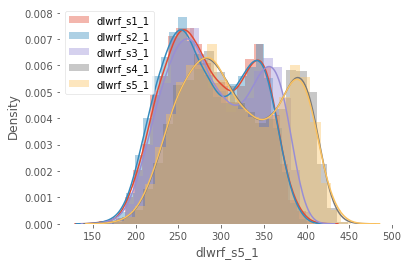

<AxesSubplot:>

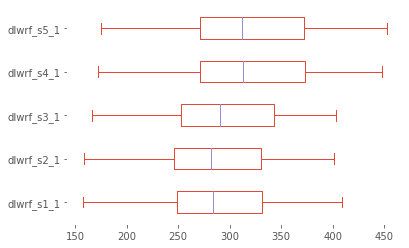

In [15]:
sns.distplot(disp_df["dlwrf_s1_1"], kde=True, label="dlwrf_s1_1")
sns.distplot(disp_df["dlwrf_s2_1"], kde=True, label="dlwrf_s2_1")
sns.distplot(disp_df["dlwrf_s3_1"], kde=True, label="dlwrf_s3_1")
sns.distplot(disp_df["dlwrf_s4_1"], kde=True, label="dlwrf_s4_1")
sns.distplot(disp_df["dlwrf_s5_1"], kde=True, label="dlwrf_s5_1")
sns.set_style(rc = {'axes.facecolor':'white'})
plt.legend()
plt.show()

disp_df[['dlwrf_s1_1',  'dlwrf_s2_1',   'dlwrf_s3_1',   'dlwrf_s4_1',   'dlwrf_s5_1']].plot.box(vert = False, grid = True)

La variable dlwrf_sfc se corresponde con la radiación de onda larga descendente. Podemos ver que no tiene valores outliers.

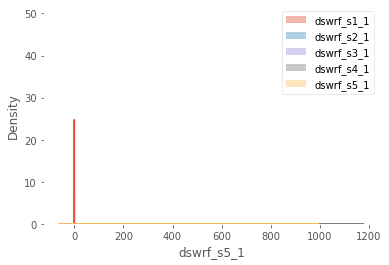

<AxesSubplot:>

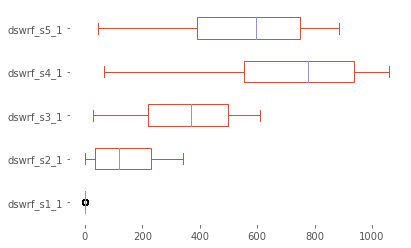

In [16]:
sns.distplot(disp_df["dswrf_s1_1"], kde=True, label="dswrf_s1_1")
sns.distplot(disp_df["dswrf_s2_1"], kde=True, label="dswrf_s2_1")
sns.distplot(disp_df["dswrf_s3_1"], kde=True, label="dswrf_s3_1")
sns.distplot(disp_df["dswrf_s4_1"], kde=True, label="dswrf_s4_1")
sns.distplot(disp_df["dswrf_s5_1"], kde=True, label="dswrf_s5_1")
sns.set_style(rc = {'axes.facecolor':'white'})
plt.legend()
plt.show()

disp_df[['dswrf_s1_1',  'dswrf_s2_1',   'dswrf_s3_1',   'dswrf_s4_1',   'dswrf_s5_1']].plot.box(vert = False, grid = True)

La variable dswrf_sfc se corresponde con la radiación de onda corta descendente. Podemos ver que no tiene valores outliers en general, menos para las tomas realizadas a las 12h.

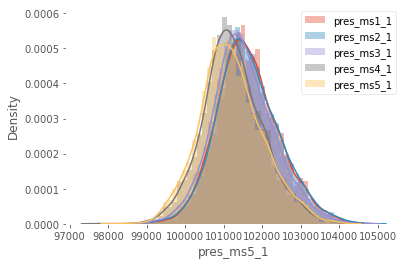

<AxesSubplot:>

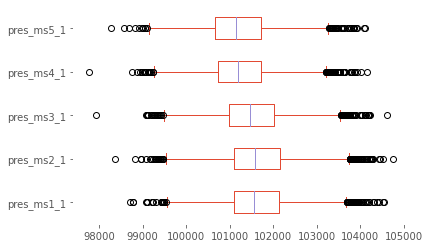

In [17]:
sns.distplot(disp_df["pres_ms1_1"], kde=True, label="pres_ms1_1")
sns.distplot(disp_df["pres_ms2_1"], kde=True, label="pres_ms2_1")
sns.distplot(disp_df["pres_ms3_1"], kde=True, label="pres_ms3_1")
sns.distplot(disp_df["pres_ms4_1"], kde=True, label="pres_ms4_1")
sns.distplot(disp_df["pres_ms5_1"], kde=True, label="pres_ms5_1")
sns.set_style(rc = {'axes.facecolor':'white'})
plt.legend()
plt.show()

disp_df[['pres_ms1_1',	'pres_ms2_1',	'pres_ms3_1',	'pres_ms4_1',	'pres_ms5_1']].plot.box(vert = False, grid = True)

La variable pres_msl indica la presion del aire al nivel del mar. Este tiene una distribucion de las horas relativamente similar.

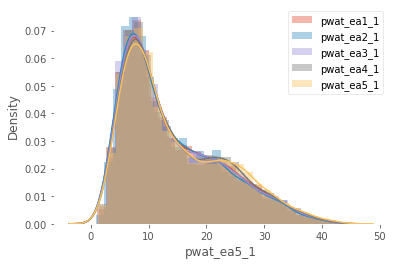

<AxesSubplot:>

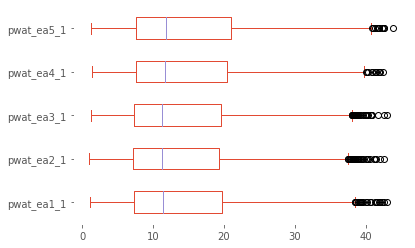

In [18]:
sns.distplot(disp_df["pwat_ea1_1"], kde=True, label="pwat_ea1_1")
sns.distplot(disp_df["pwat_ea2_1"], kde=True, label="pwat_ea2_1")
sns.distplot(disp_df["pwat_ea3_1"], kde=True, label="pwat_ea3_1")
sns.distplot(disp_df["pwat_ea4_1"], kde=True, label="pwat_ea4_1")
sns.distplot(disp_df["pwat_ea5_1"], kde=True, label="pwat_ea5_1")
sns.set_style(rc = {'axes.facecolor':'white'})
plt.legend()
plt.show()

disp_df[['pwat_ea1_1',	'pwat_ea2_1',	'pwat_ea3_1',	'pwat_ea4_1',	'pwat_ea5_1']].plot.box(vert = False, grid = True)

La variable pwat_eatm indica el agua precipitable en toda la profundidad de la atmósfera. Esto indica que es una zona con poca agua atmosferica que explica la escasa precipitacion en la zona.

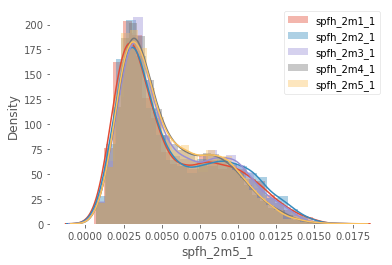

<AxesSubplot:>

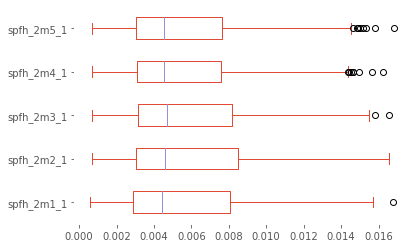

In [19]:
sns.distplot(disp_df["spfh_2m1_1"], kde=True, label="spfh_2m1_1")
sns.distplot(disp_df["spfh_2m2_1"], kde=True, label="spfh_2m2_1")
sns.distplot(disp_df["spfh_2m3_1"], kde=True, label="spfh_2m3_1")
sns.distplot(disp_df["spfh_2m4_1"], kde=True, label="spfh_2m4_1")
sns.distplot(disp_df["spfh_2m5_1"], kde=True, label="spfh_2m5_1")
sns.set_style(rc = {'axes.facecolor':'white'})
plt.legend()
plt.show()

disp_df[['spfh_2m1_1',	'spfh_2m2_1',	'spfh_2m3_1',	'spfh_2m4_1',	'spfh_2m5_1']].plot.box(vert = False, grid = True)

La spfh_2m indica la humedad especifica a 2m del suelo. Sigue en linea con la falta de lluvia de la zona y es relativamente constante diarante el dia.

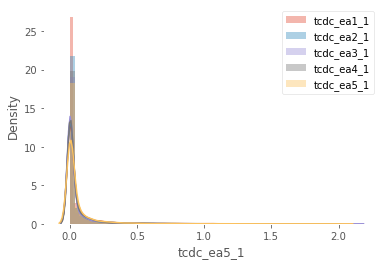

<AxesSubplot:>

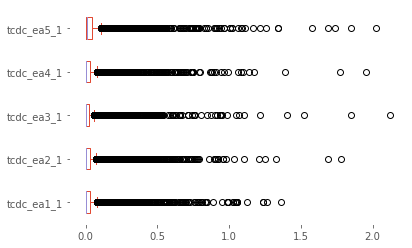

In [20]:
sns.distplot(disp_df["tcdc_ea1_1"], kde=True, label="tcdc_ea1_1")
sns.distplot(disp_df["tcdc_ea2_1"], kde=True, label="tcdc_ea2_1")
sns.distplot(disp_df["tcdc_ea3_1"], kde=True, label="tcdc_ea3_1")
sns.distplot(disp_df["tcdc_ea4_1"], kde=True, label="tcdc_ea4_1")
sns.distplot(disp_df["tcdc_ea5_1"], kde=True, label="tcdc_ea5_1")
sns.set_style(rc = {'axes.facecolor':'white'})
plt.legend()
plt.show()

disp_df[['tcdc_ea1_1',	'tcdc_ea2_1',	'tcdc_ea3_1',	'tcdc_ea4_1',	'tcdc_ea5_1']].plot.box(vert = False, grid = True)

El tcdc_eatm (Total cloud cover over the entire depth of the atmosphere) indica que hay un pequeño porcentaje de nubes el la zona.

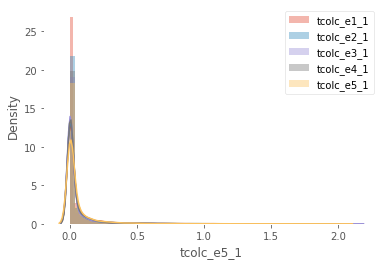

<AxesSubplot:>

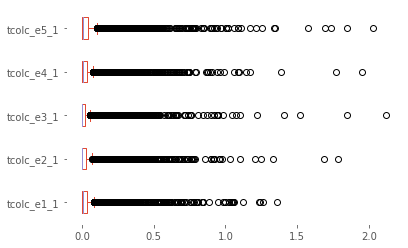

In [21]:
sns.distplot(disp_df["tcolc_e1_1"], kde=True, label="tcolc_e1_1")
sns.distplot(disp_df["tcolc_e2_1"], kde=True, label="tcolc_e2_1")
sns.distplot(disp_df["tcolc_e3_1"], kde=True, label="tcolc_e3_1")
sns.distplot(disp_df["tcolc_e4_1"], kde=True, label="tcolc_e4_1")
sns.distplot(disp_df["tcolc_e5_1"], kde=True, label="tcolc_e5_1")
sns.set_style(rc = {'axes.facecolor':'white'})
plt.legend()
plt.show()

disp_df[['tcolc_e1_1',	'tcolc_e2_1',	'tcolc_e3_1',	'tcolc_e4_1',	'tcolc_e5_1']].plot.box(vert = False, grid = True)

La variable tcolc_eatm (Total column-integrated condensate over the entire atmos.) vuelve a indicar la falta de agua en la zona.

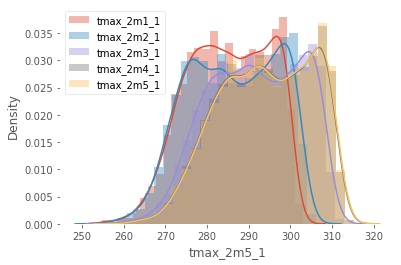

<AxesSubplot:>

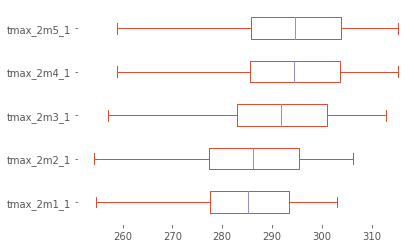

In [22]:
sns.distplot(disp_df["tmax_2m1_1"], kde=True, label="tmax_2m1_1")
sns.distplot(disp_df["tmax_2m2_1"], kde=True, label="tmax_2m2_1")
sns.distplot(disp_df["tmax_2m3_1"], kde=True, label="tmax_2m3_1")
sns.distplot(disp_df["tmax_2m4_1"], kde=True, label="tmax_2m4_1")
sns.distplot(disp_df["tmax_2m5_1"], kde=True, label="tmax_2m5_1")
sns.set_style(rc = {'axes.facecolor':'white'})
plt.legend()
plt.show()

disp_df[['tmax_2m1_1',	'tmax_2m2_1',	'tmax_2m3_1',	'tmax_2m4_1',	'tmax_2m5_1']].plot.box(vert = False, grid = True)


La variable tmax_2m indica la temperatura máxima en las ultimas 3h a 2m del nivel del suelo en k. Esta va en general de (260, 310) que serian (-13, 36) grados celsius. Por lo que durante el año hay un cambio significativo en la temperatura máxima.

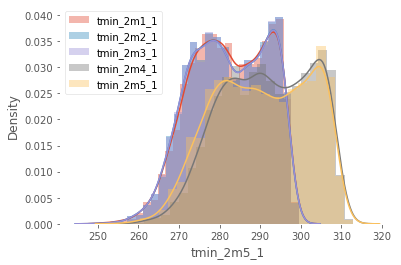

<AxesSubplot:>

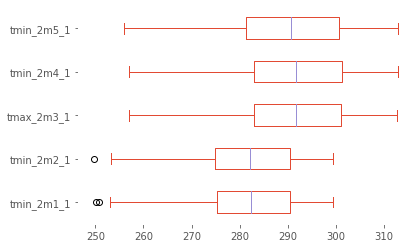

In [23]:
sns.distplot(disp_df["tmin_2m1_1"], kde=True, label="tmin_2m1_1")
sns.distplot(disp_df["tmin_2m2_1"], kde=True, label="tmin_2m2_1")
sns.distplot(disp_df["tmin_2m3_1"], kde=True, label="tmin_2m3_1")
sns.distplot(disp_df["tmin_2m4_1"], kde=True, label="tmin_2m4_1")
sns.distplot(disp_df["tmin_2m5_1"], kde=True, label="tmin_2m5_1")
sns.set_style(rc = {'axes.facecolor':'white'})
plt.legend()
plt.show()

disp_df[['tmin_2m1_1',	'tmin_2m2_1',	'tmax_2m3_1',	'tmin_2m4_1',	'tmin_2m5_1']].plot.box(vert = False, grid = True)

La variable tmin_2m indica la temperatura minima en las ultimas 3h a 2m del nivel del suelo en k. Esta va en general de (260, 320) que serian (-13, 46) grados celsius. Por lo que durante el año hay un cambio significativo en la temperatura minima.

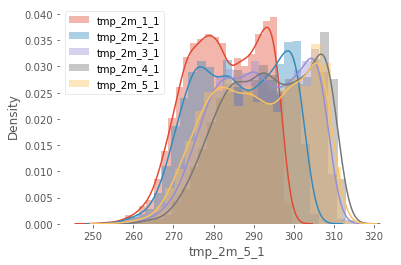

<AxesSubplot:>

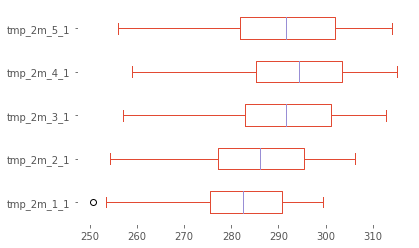

In [24]:
sns.distplot(disp_df["tmp_2m_1_1"], kde=True, label="tmp_2m_1_1")
sns.distplot(disp_df["tmp_2m_2_1"], kde=True, label="tmp_2m_2_1")
sns.distplot(disp_df["tmp_2m_3_1"], kde=True, label="tmp_2m_3_1")
sns.distplot(disp_df["tmp_2m_4_1"], kde=True, label="tmp_2m_4_1")
sns.distplot(disp_df["tmp_2m_5_1"], kde=True, label="tmp_2m_5_1")
sns.set_style(rc = {'axes.facecolor':'white'})
plt.legend()
plt.show()

disp_df[['tmp_2m_1_1',	'tmp_2m_2_1',	'tmp_2m_3_1',	'tmp_2m_4_1',	'tmp_2m_5_1']].plot.box(vert = False, grid = True)

El tmp_2m es la temperatura actual a 2m del suelo. Como vemos sigue en linea con la temperatura minima y máxima en los mismos rangos.

En las tres variables de temperatura se ve que el dia empieza siendo frio y se va calentando a lo largo del dia. 

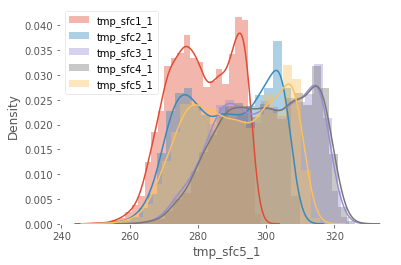

<AxesSubplot:>

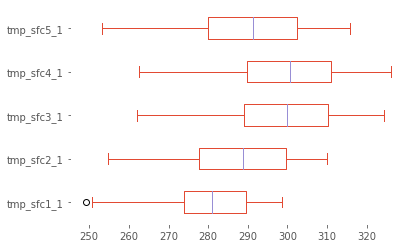

In [25]:
sns.distplot(disp_df["tmp_sfc1_1"], kde=True, label="tmp_sfc1_1")
sns.distplot(disp_df["tmp_sfc2_1"], kde=True, label="tmp_sfc2_1")
sns.distplot(disp_df["tmp_sfc3_1"], kde=True, label="tmp_sfc3_1")
sns.distplot(disp_df["tmp_sfc4_1"], kde=True, label="tmp_sfc4_1")
sns.distplot(disp_df["tmp_sfc5_1"], kde=True, label="tmp_sfc5_1")
sns.set_style(rc = {'axes.facecolor':'white'})
plt.legend()
plt.show()

disp_df[['tmp_sfc1_1',	'tmp_sfc2_1',	'tmp_sfc3_1',	'tmp_sfc4_1',	'tmp_sfc5_1']].plot.box(vert = False, grid = True)

El tmp_sfc es la temperatura de la superficie y en esta temperatura vemos un cambio más drastico en temperaturas a lo largo del dia pero los valores siguen en los rangos de las anteriores.

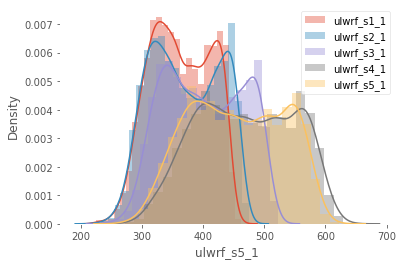

<AxesSubplot:>

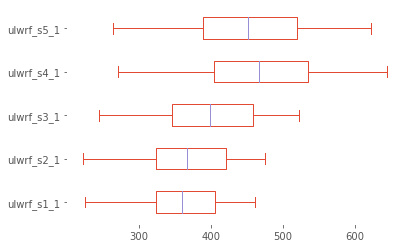

In [26]:
sns.distplot(disp_df["ulwrf_s1_1"], kde=True, label="ulwrf_s1_1")
sns.distplot(disp_df["ulwrf_s2_1"], kde=True, label="ulwrf_s2_1")
sns.distplot(disp_df["ulwrf_s3_1"], kde=True, label="ulwrf_s3_1")
sns.distplot(disp_df["ulwrf_s4_1"], kde=True, label="ulwrf_s4_1")
sns.distplot(disp_df["ulwrf_s5_1"], kde=True, label="ulwrf_s5_1")
sns.set_style(rc = {'axes.facecolor':'white'})
plt.legend()
plt.show()

disp_df[['ulwrf_s1_1',	'ulwrf_s2_1',	'ulwrf_s3_1',	'ulwrf_s4_1',	'ulwrf_s5_1']].plot.box(vert = False, grid = True)

La variable ulwrf_s indica la radiación de onda larga ascendente. Podemos ver que esta radiación es menor al inicio de las tomas pero en la noche esta es mayor.

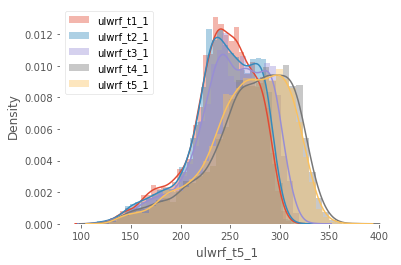

<AxesSubplot:>

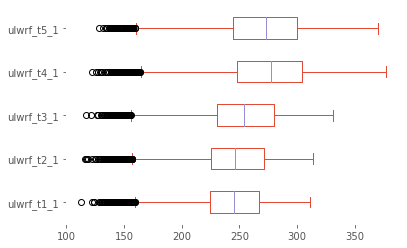

In [27]:
sns.distplot(disp_df["ulwrf_t1_1"], kde=True, label="ulwrf_t1_1")
sns.distplot(disp_df["ulwrf_t2_1"], kde=True, label="ulwrf_t2_1")
sns.distplot(disp_df["ulwrf_t3_1"], kde=True, label="ulwrf_t3_1")
sns.distplot(disp_df["ulwrf_t4_1"], kde=True, label="ulwrf_t4_1")
sns.distplot(disp_df["ulwrf_t5_1"], kde=True, label="ulwrf_t5_1")
sns.set_style(rc = {'axes.facecolor':'white'})
plt.legend()
plt.show()

disp_df[['ulwrf_t1_1',	'ulwrf_t2_1',	'ulwrf_t3_1',	'ulwrf_t4_1',	'ulwrf_t5_1']].plot.box(vert = False, grid = True)

La variable ulwrf_tatm indica la radiación de onda larga ascendente en la atmosfera. Podemos ver que esta radiación tambien es menor al inicio de las tomas pero en la noche esta es mayor. Lo que si podemos ver es que esta variable tiene muchos más outliers con valores anormalmente bajos.

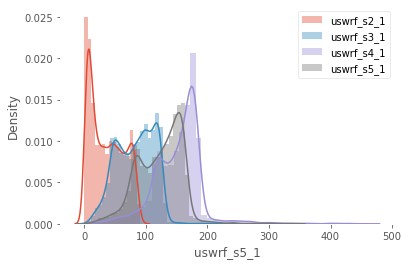

<AxesSubplot:>

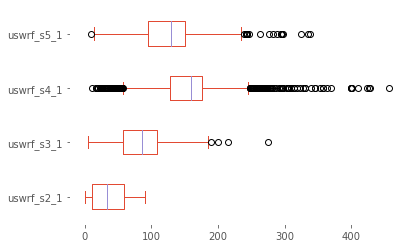

In [28]:
sns.distplot(disp_df["uswrf_s2_1"], kde=True, label="uswrf_s2_1")
sns.distplot(disp_df["uswrf_s3_1"], kde=True, label="uswrf_s3_1")
sns.distplot(disp_df["uswrf_s4_1"], kde=True, label="uswrf_s4_1")
sns.distplot(disp_df["uswrf_s5_1"], kde=True, label="uswrf_s5_1")
sns.set_style(rc = {'axes.facecolor':'white'})
plt.legend()
plt.show()

disp_df[['uswrf_s2_1',	'uswrf_s3_1',	'uswrf_s4_1',	'uswrf_s5_1']].plot.box(vert = False, grid = True)

La variable uswrf indica la radiación de onda corta ascendente en la superficie. Podemos ver que esta radiación se comporta de manera distinta a las anteriores. Esta A las 12h es escasa y va aumentando hasta llegar a su pico a las 21h y vuelve a caer (24h). 

## Paso 5. Analizar la relación entre las variables

Hay variables que por definicion creemos que están relacionadas.  Por tanto vamos a comprobar su correlacion más detenidamente y asi comprobar las conclusiones sacadas en el paso anterior.

Estas se dividen en las siguientes secciones:

- Variables relacionadas con la precipitacion (apcp_sfc, pwat_eatm, spfh_2m, tcolc_eatm)
- Variables relacionadas con la temperatura (tmax, tmin, tmp_2m, tmp_sfc)
- Variables relacionadas con la radiación (dlwrf_sf, dswrf_sf, ulwrf_sfc, ulwrf_tatm, uswrf_sfc)

### Precipitación

<AxesSubplot:>

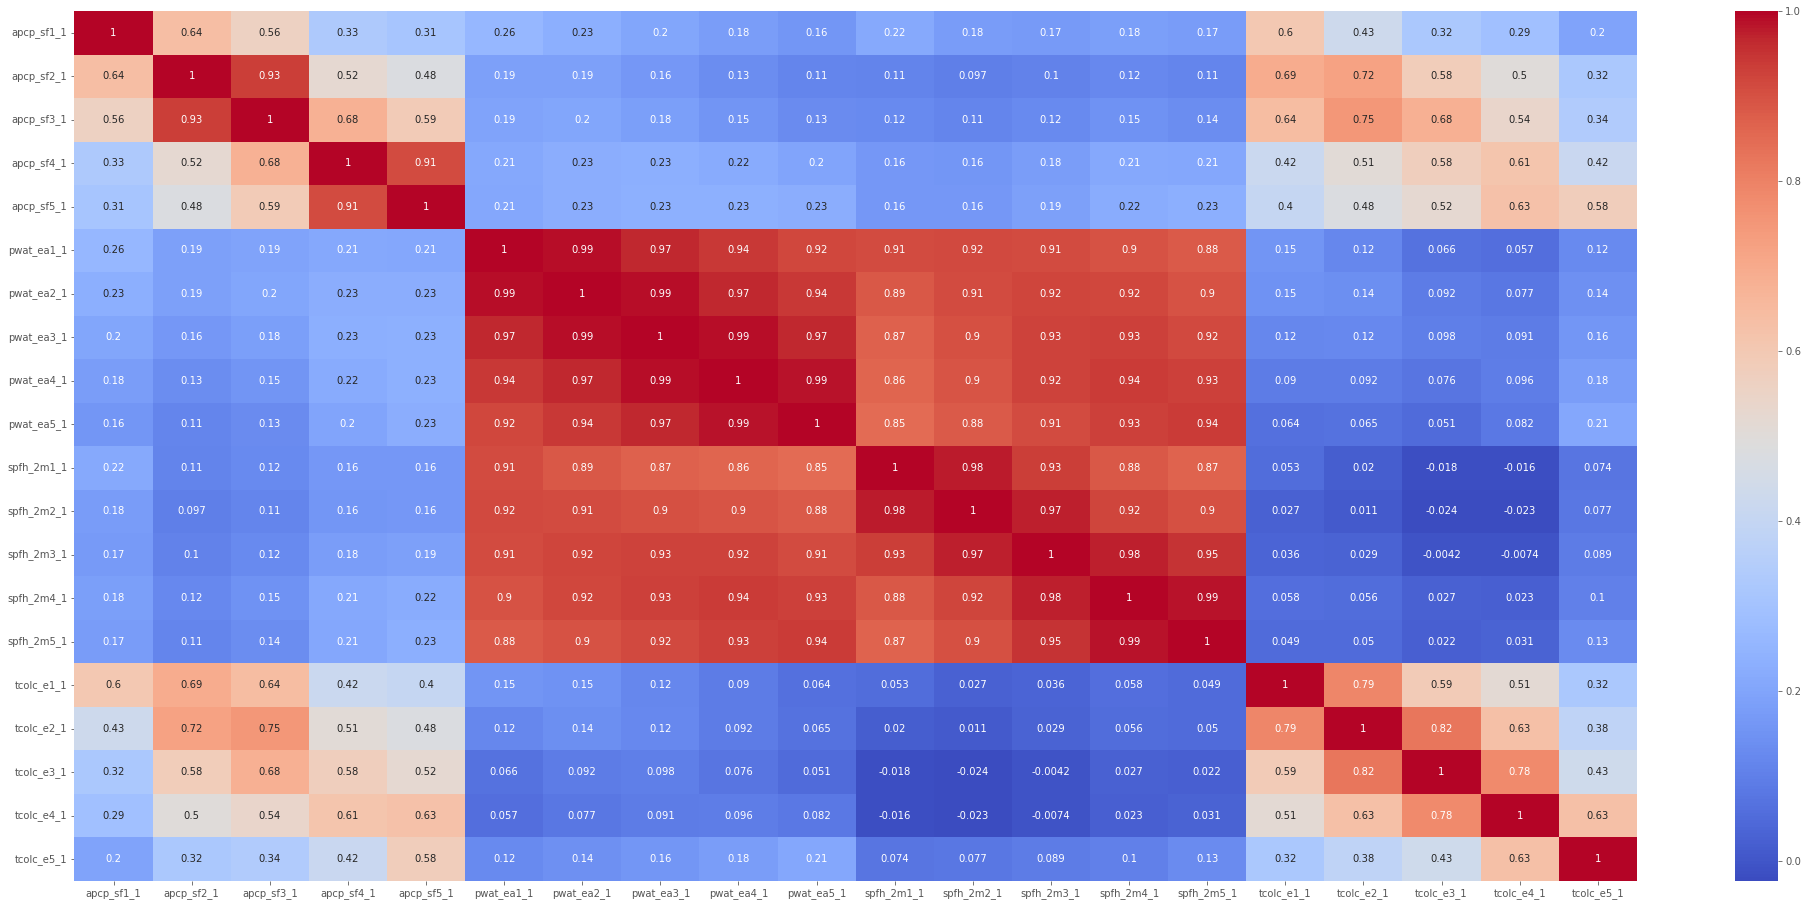

In [29]:
# Seleccionar las columnas de interés
df_agua = disp_df[['apcp_sf1_1',  'apcp_sf2_1',   'apcp_sf3_1',   'apcp_sf4_1',   'apcp_sf5_1',
                   'pwat_ea1_1',	'pwat_ea2_1',	'pwat_ea3_1',	'pwat_ea4_1',	'pwat_ea5_1', 
                   'spfh_2m1_1',	'spfh_2m2_1',	'spfh_2m3_1',	'spfh_2m4_1',	'spfh_2m5_1', 
                   'tcolc_e1_1',	'tcolc_e2_1',	'tcolc_e3_1',	'tcolc_e4_1',	'tcolc_e5_1']]

# Calcular la matriz de correlación
corr_matrix = df_agua.corr()

# Visualizar la matriz de correlación utilizando un heatmap
plt.figure(figsize=(35, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### Temperatura

<AxesSubplot:>

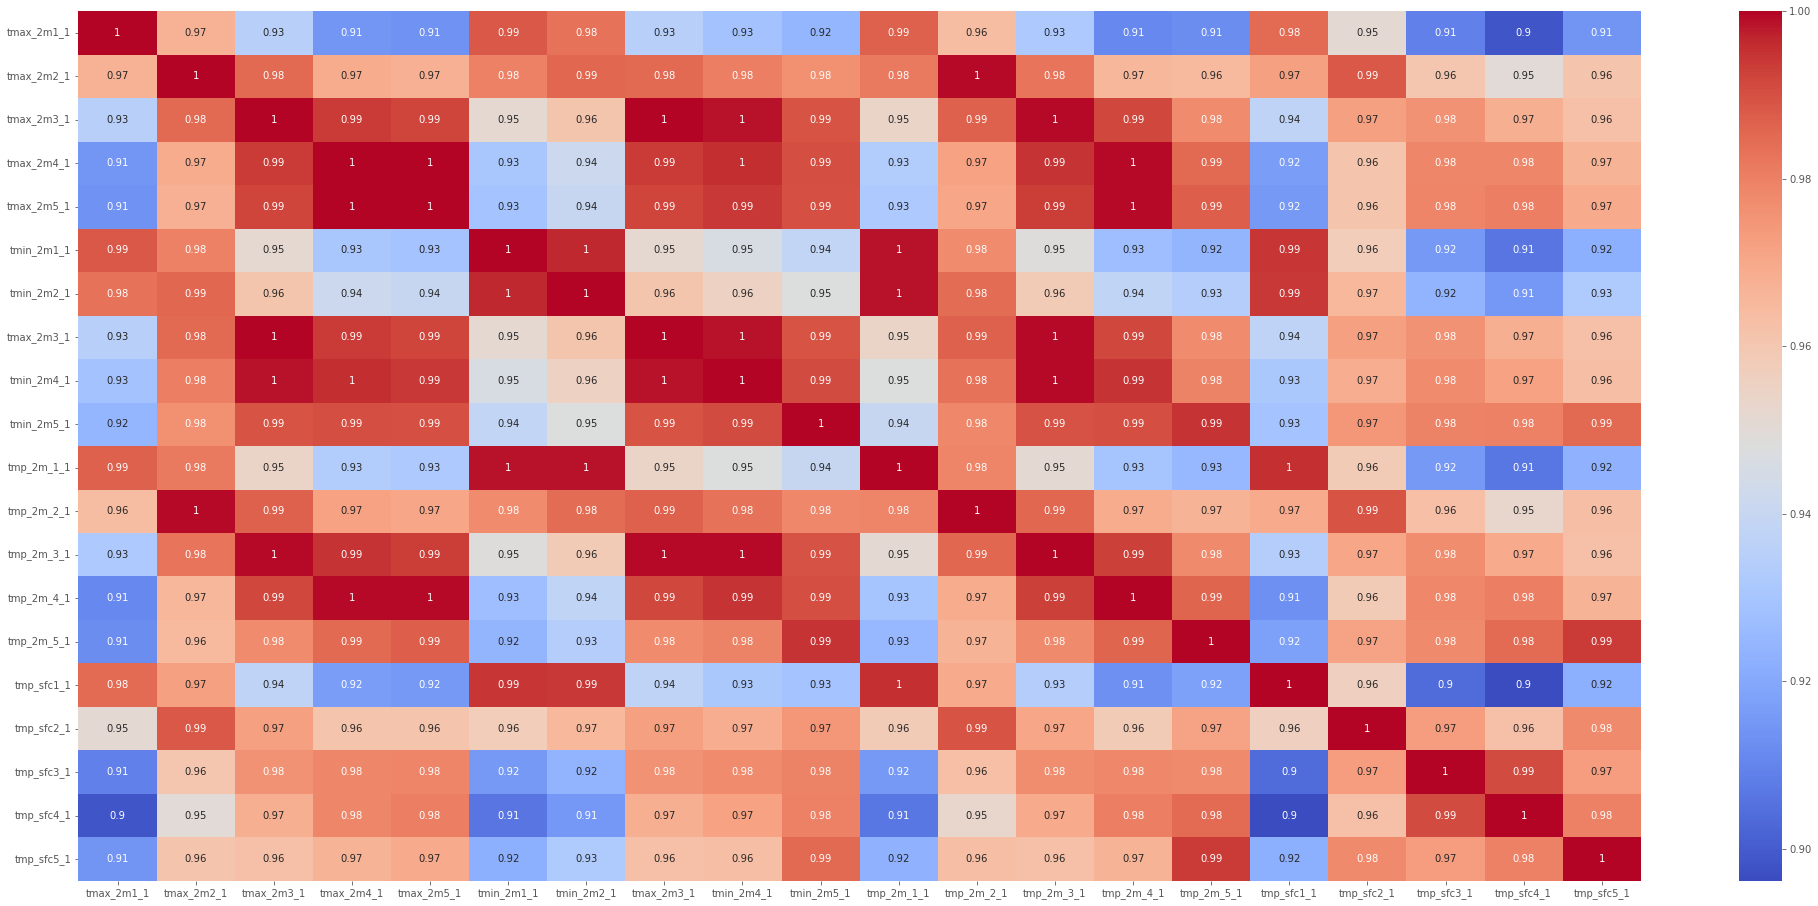

In [30]:
# Seleccionar las columnas de interés
df_temp = disp_df[['tmax_2m1_1',	'tmax_2m2_1',	'tmax_2m3_1',	'tmax_2m4_1',	'tmax_2m5_1', 
                   'tmin_2m1_1',	'tmin_2m2_1',	'tmax_2m3_1',	'tmin_2m4_1',	'tmin_2m5_1', 
                   'tmp_2m_1_1',	'tmp_2m_2_1',	'tmp_2m_3_1',	'tmp_2m_4_1',	'tmp_2m_5_1', 
                   'tmp_sfc1_1',	'tmp_sfc2_1',	'tmp_sfc3_1',	'tmp_sfc4_1',	'tmp_sfc5_1']]

# Calcular la matriz de correlación
corr_matrix = df_temp.corr()

# Visualizar la matriz de correlación utilizando un heatmap
plt.figure(figsize=(35, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

### Radiación

<AxesSubplot:>

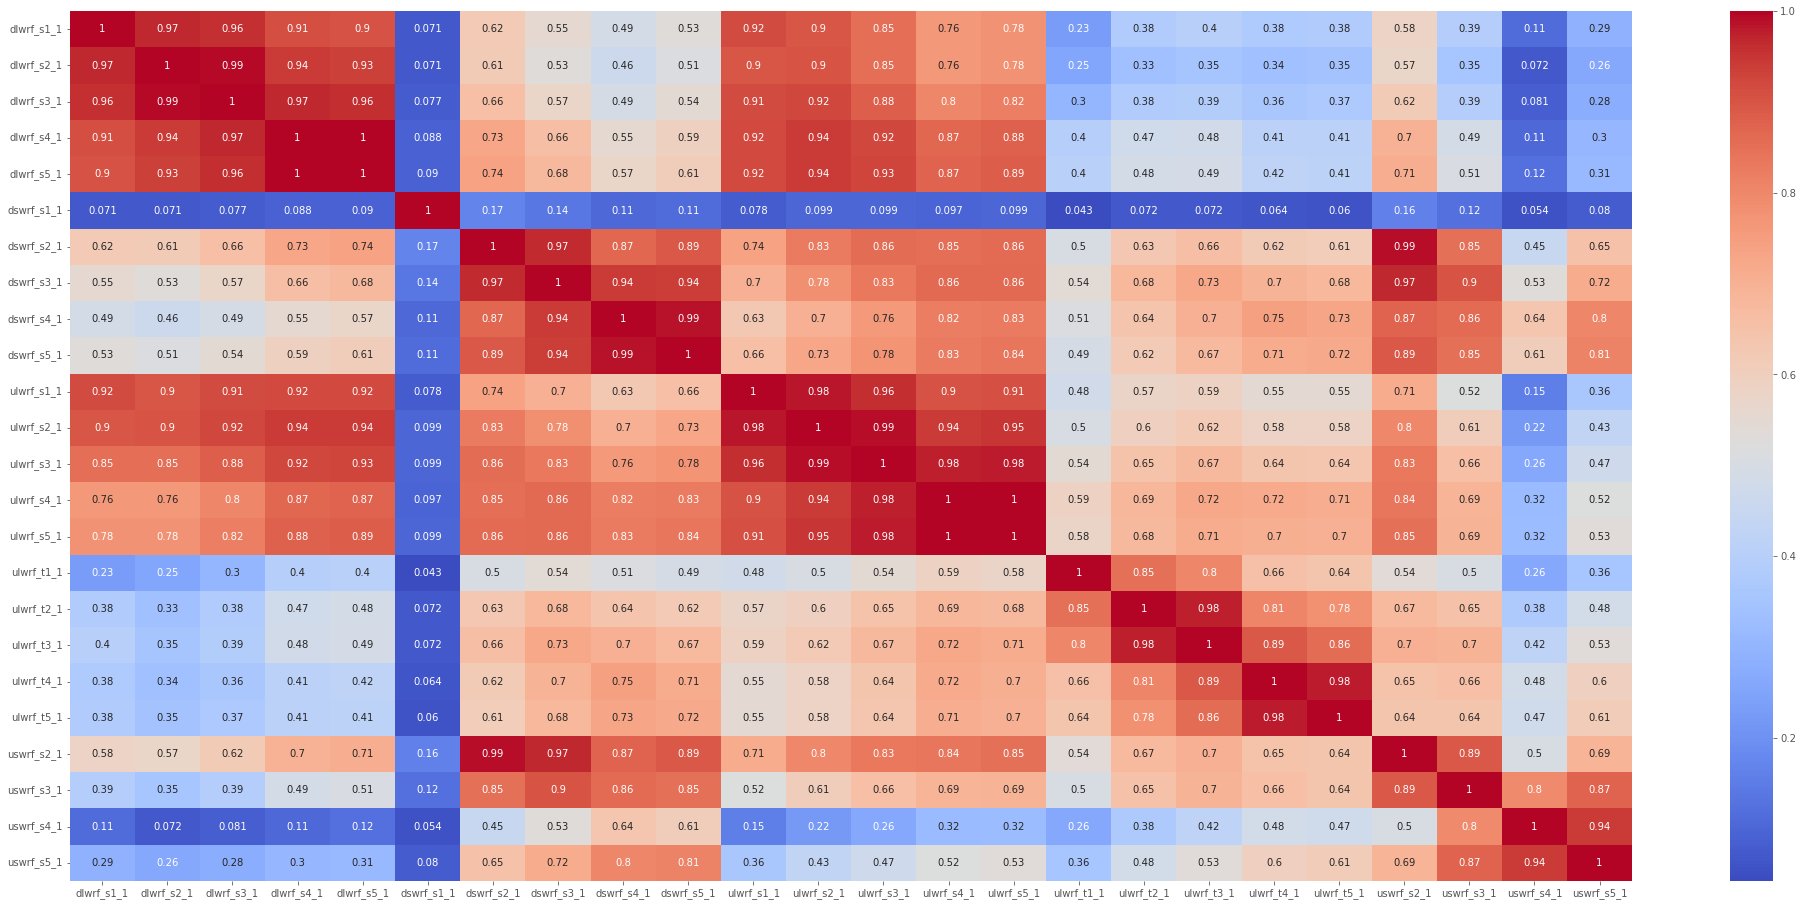

In [31]:
# Seleccionar las columnas de interés
df_rad = disp_df[['dlwrf_s1_1',  'dlwrf_s2_1',   'dlwrf_s3_1',   'dlwrf_s4_1',   'dlwrf_s5_1', 
                  'dswrf_s1_1',  'dswrf_s2_1',   'dswrf_s3_1',   'dswrf_s4_1',   'dswrf_s5_1', 
                  'ulwrf_s1_1',	'ulwrf_s2_1',	'ulwrf_s3_1',	'ulwrf_s4_1',	'ulwrf_s5_1', 
                  'ulwrf_t1_1',	'ulwrf_t2_1',	'ulwrf_t3_1',	'ulwrf_t4_1',	'ulwrf_t5_1', 
                  'uswrf_s2_1',	'uswrf_s3_1',	'uswrf_s4_1',	'uswrf_s5_1']]

# Calcular la matriz de correlación
corr_matrix = df_rad.corr()

# Visualizar la matriz de correlación utilizando un heatmap
plt.figure(figsize=(35, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

## Paso 6. Visualizar la correlación entre las variables

Utilizamos la función sns.heatmap() de la librería Seaborn para visualizar la matriz de correlación entre todas las variables numéricas en el dataset. La matriz de correlación muestra la relación lineal entre cada par de variables numéricas, donde los valores más cercanos a 1 indican una correlación positiva fuerte, los valores más cercanos a -1 indican una correlación negativa fuerte y los valores cercanos a 0 indican una correlación débil.

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

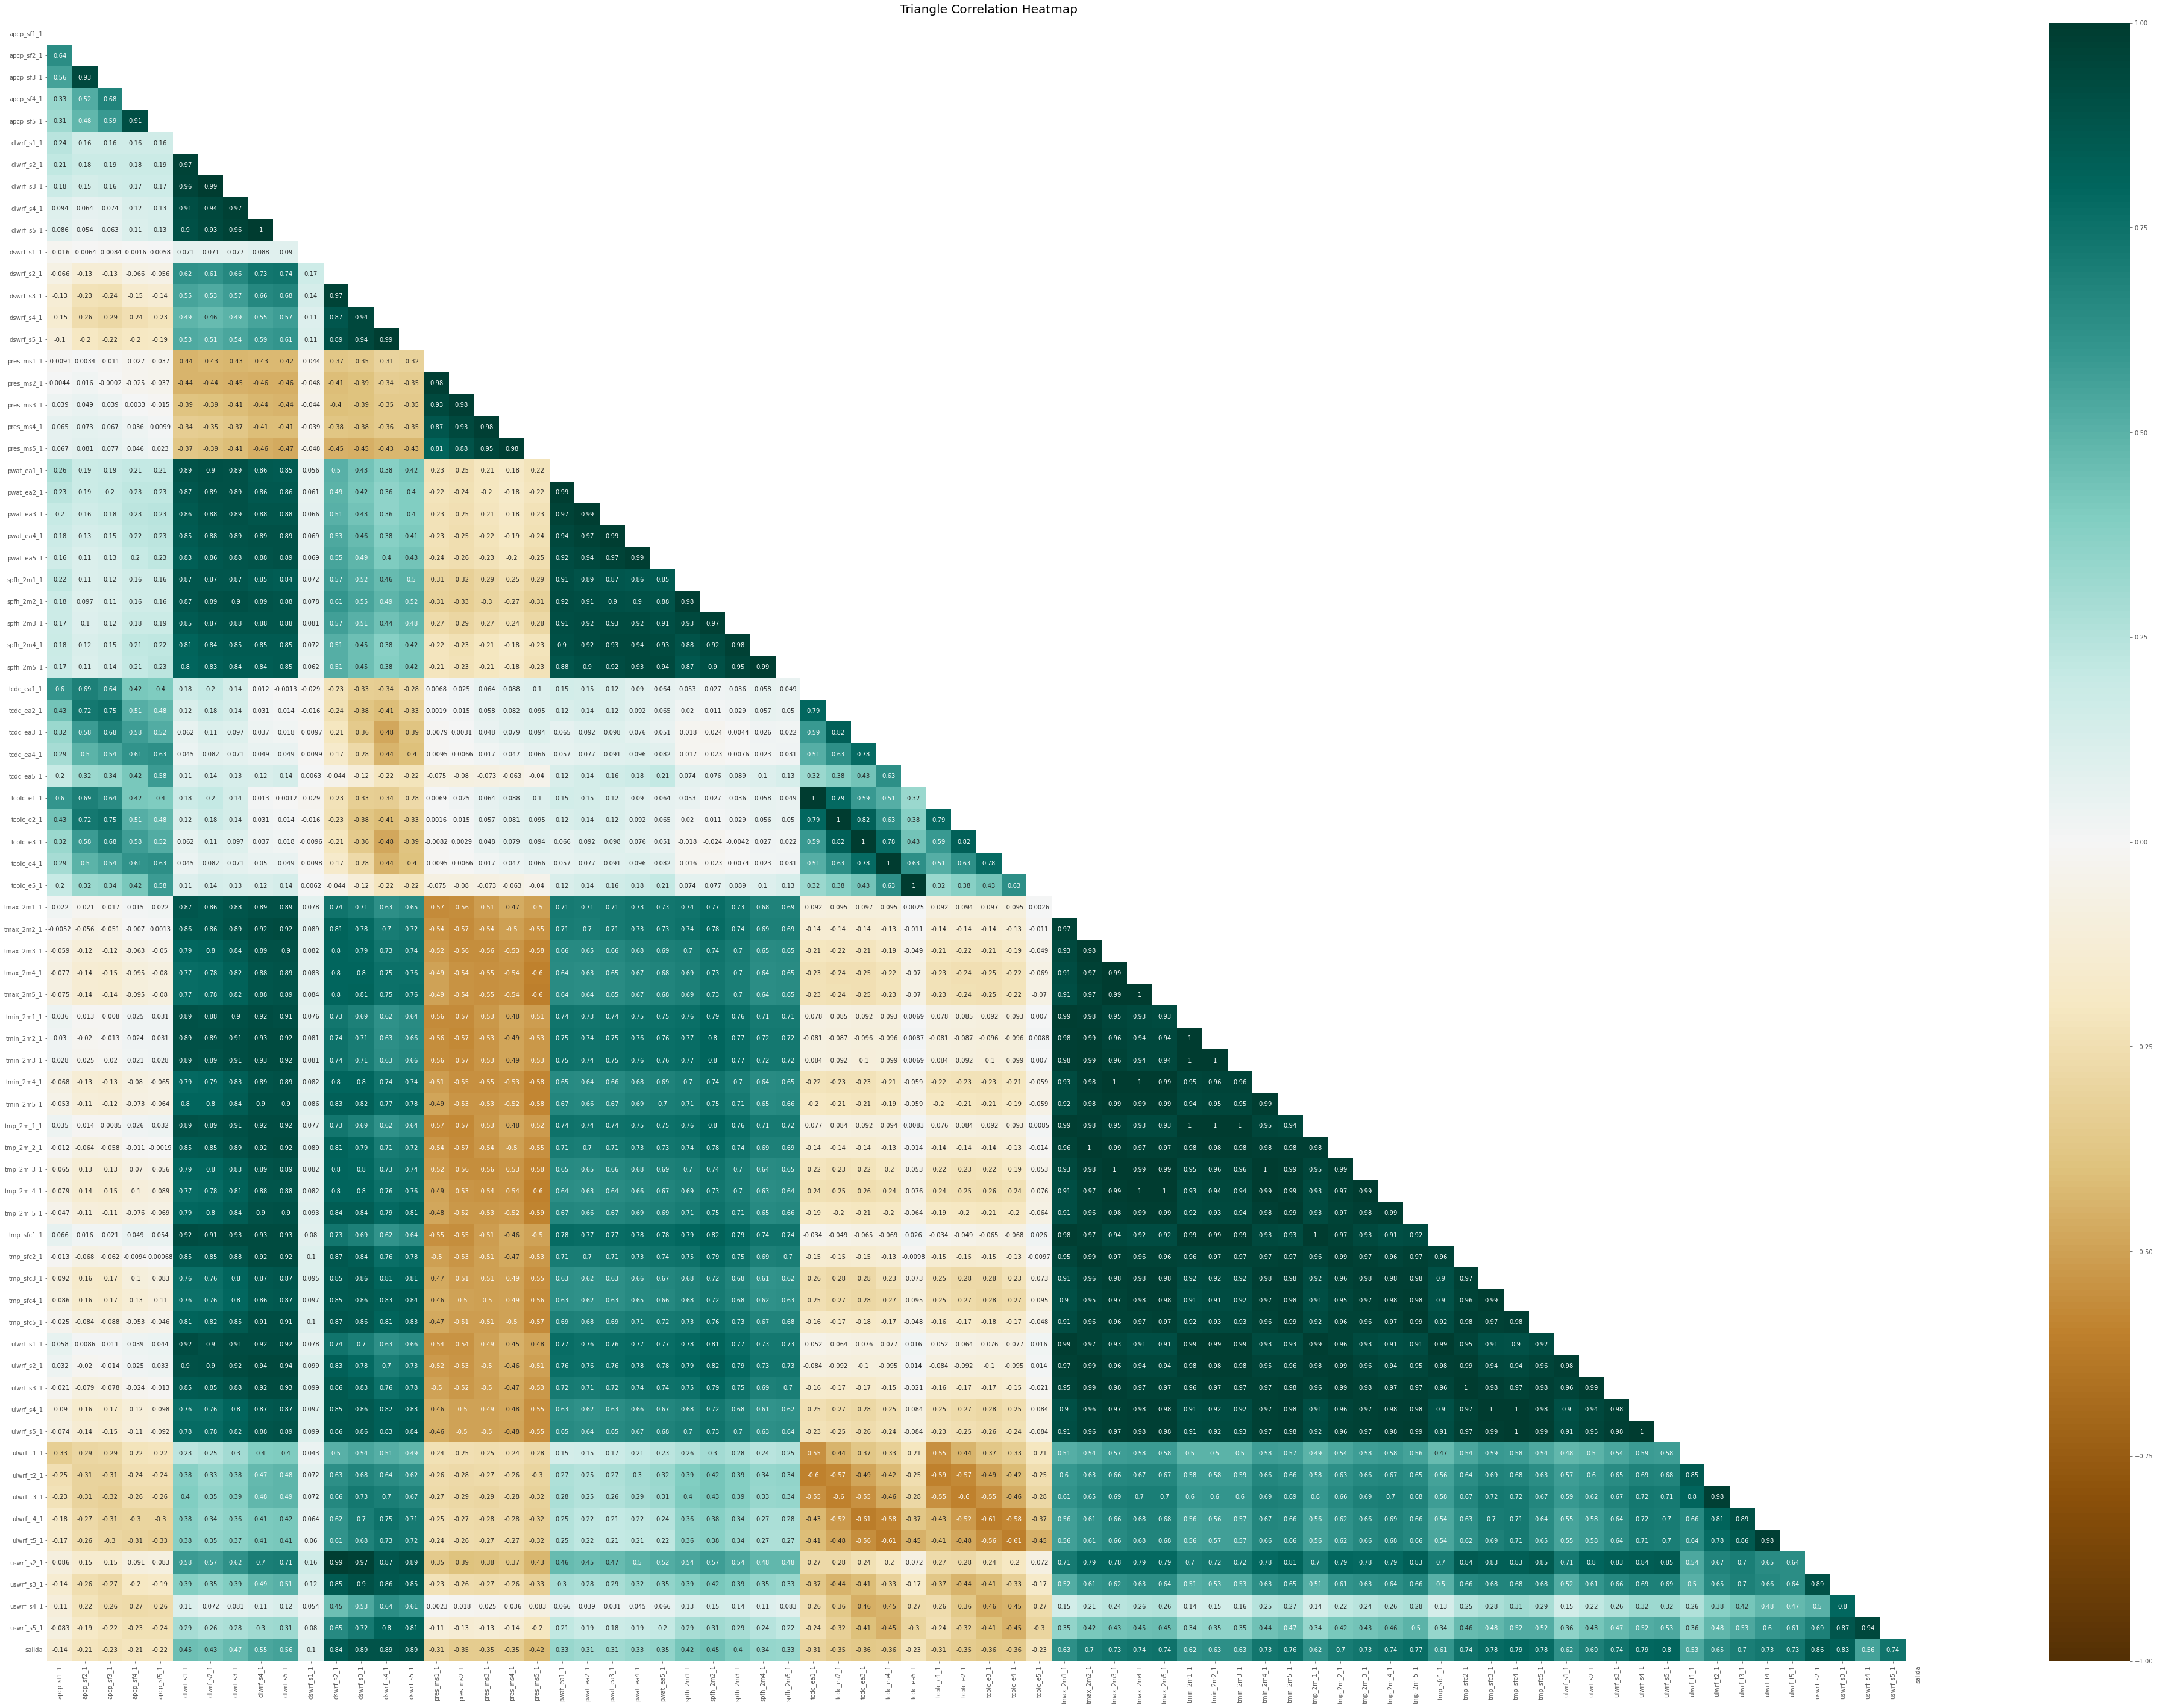

In [32]:
# Matriz de correlación diagonal utilizando seaborn
plt.figure(figsize=(70, 50))
mask = np.triu(np.ones_like(disp_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(disp_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':20}, pad=16)

## Paso 7. Visualizar la distribución de la variable de salida

Utilizamos la función sns.histplot() de la librería Seaborn para visualizar la distribución de cada variable de salida en el dataset.

<AxesSubplot:xlabel='salida', ylabel='Count'>

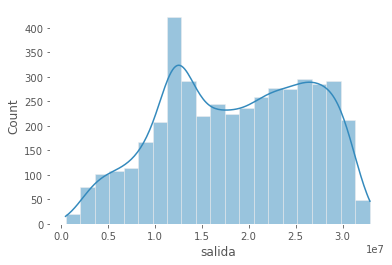

In [33]:
sns.histplot(disp_df["salida"], kde=True)

<AxesSubplot:>

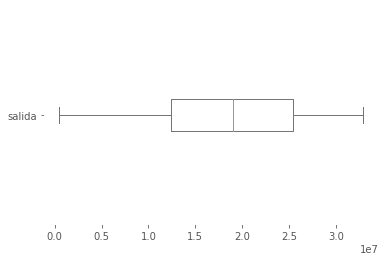

In [34]:
disp_df[['salida']].plot.box(vert = False, grid = True)

## Paso 8. Analizar la relación entre las variables de entrada y la variable de salida

Utilizamos la función sns.boxplot() de la librería Seaborn para analizar la relación entre cada variable de entrada y la variable de salida única. Esta función crea un gráfico de caja y bigotes que muestra la distribución de cada variable de entrada en función de los valores de la variable de salida única. Es importante tener en cuenta las unidades de medida y, si es necesario, normalizar las variables antes de realizar el análisis.

Text(0.5, 1.0, 'variables correladas con salida')

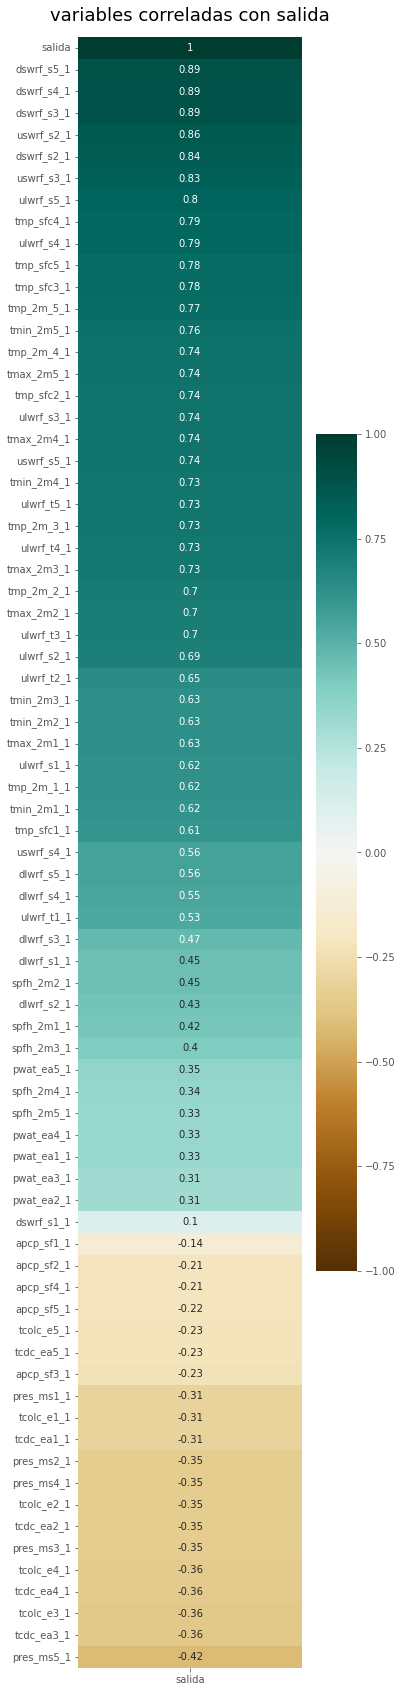

In [35]:
plt.figure(figsize=(5, 30))
heatmap = sns.heatmap(disp_df.corr()[['salida']].sort_values(by='salida', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('variables correladas con salida', fontdict={'fontsize':18}, pad=16)

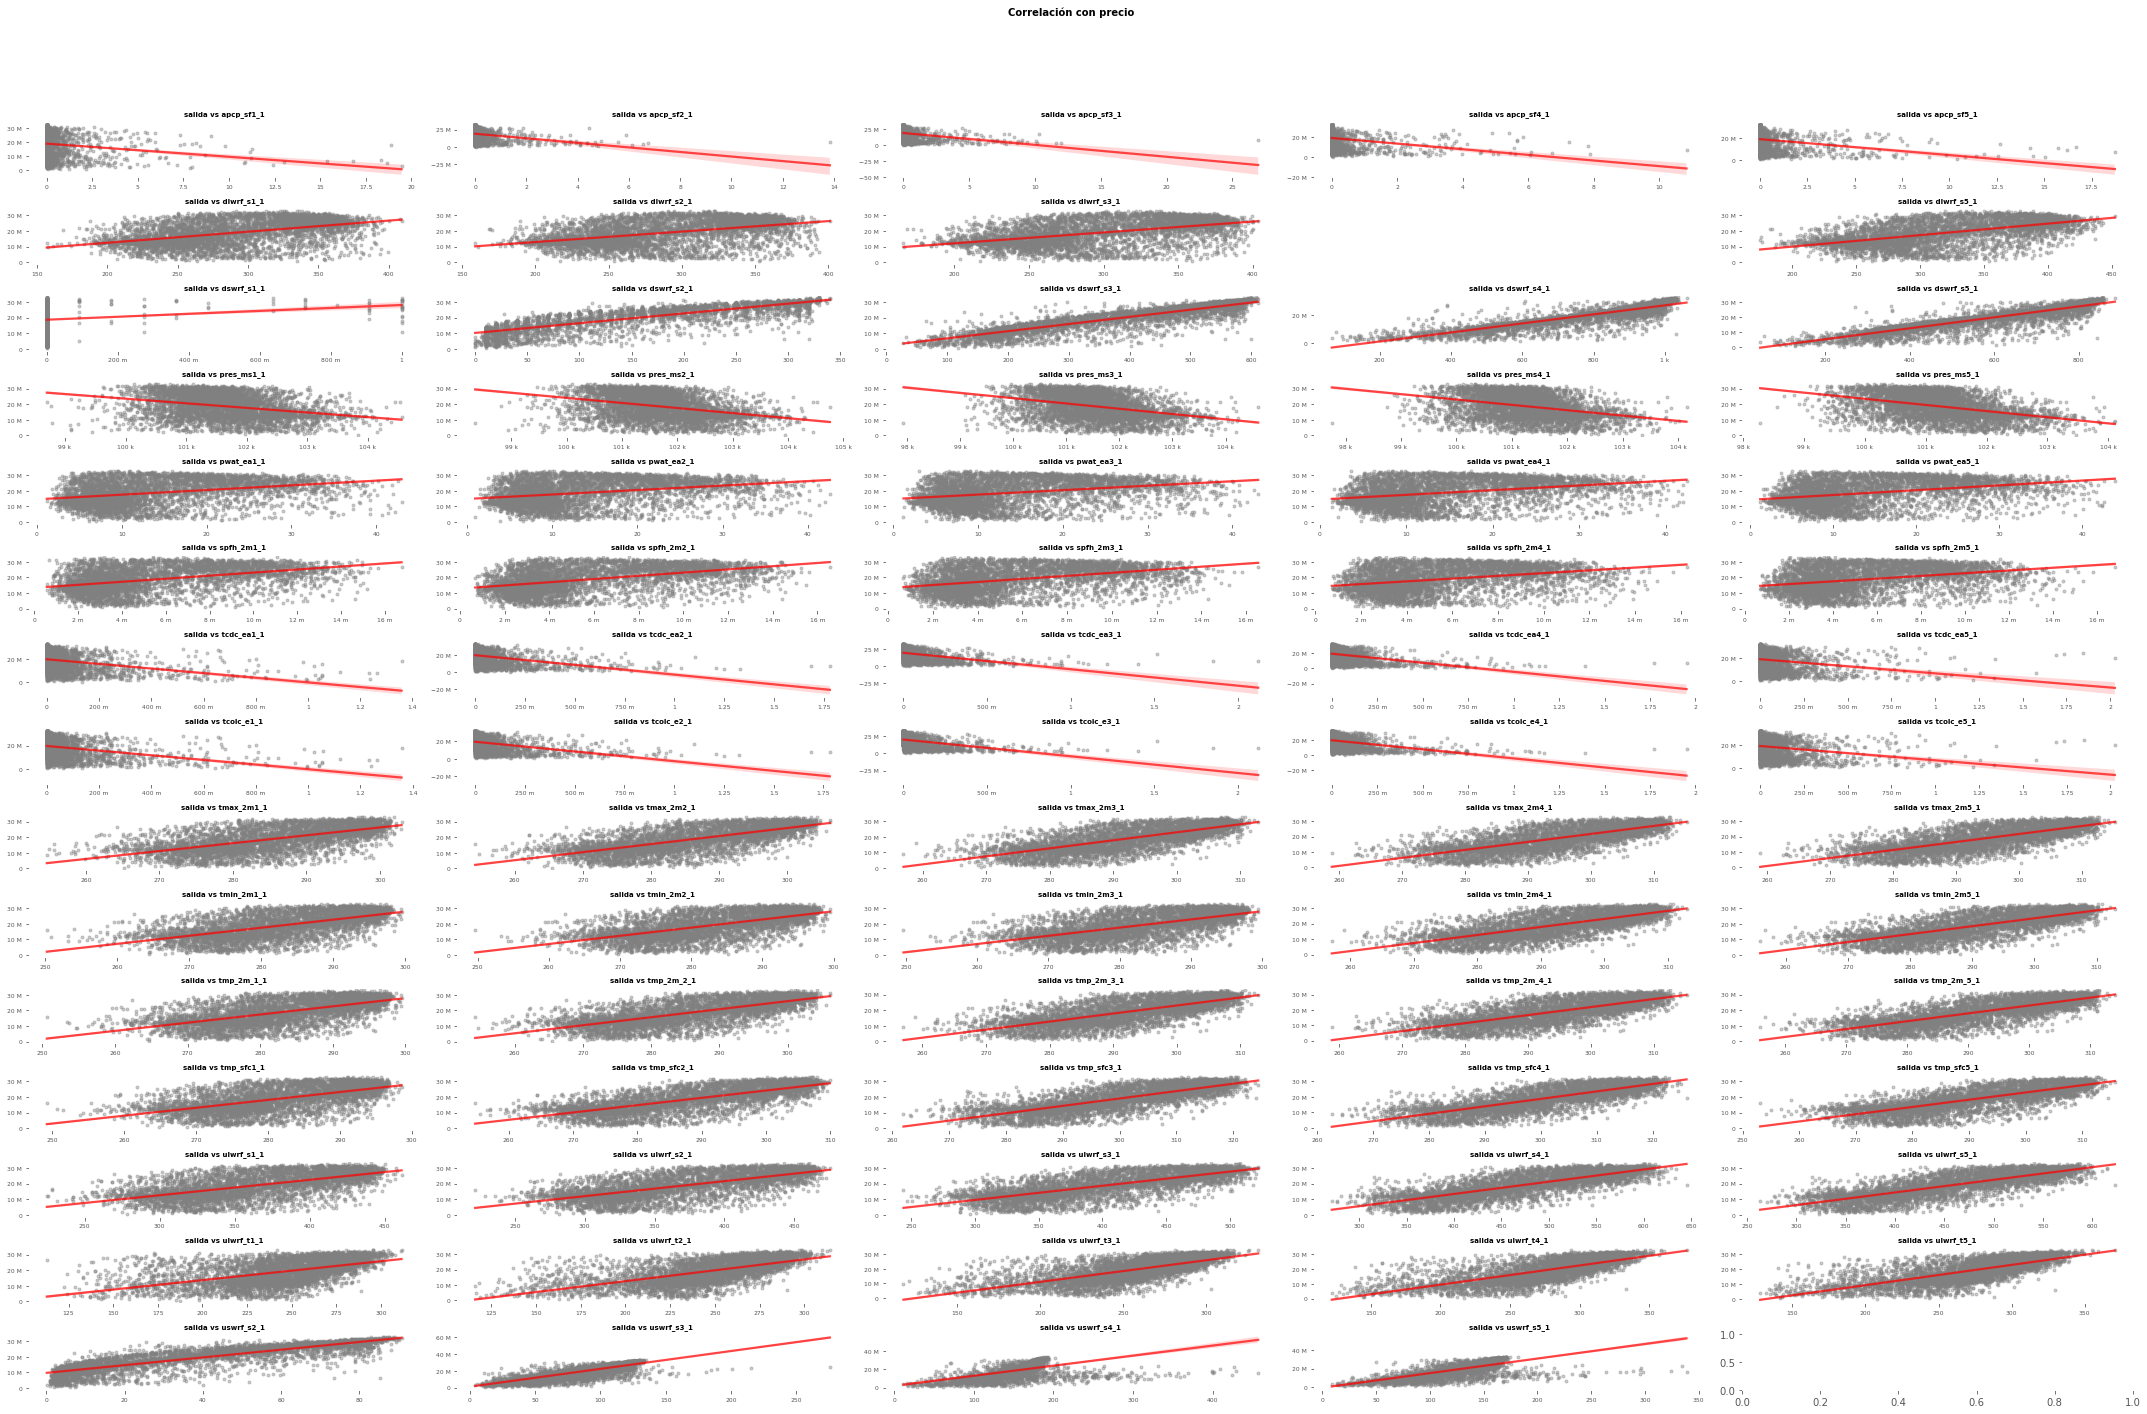

In [36]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=15, ncols=5, figsize=(30, 20))
axes = axes.flat
columnas_numeric = disp_df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('salida')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = disp_df[colum],
        y           = disp_df['salida'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"salida vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");

In [37]:
# sns.boxplot(x="salida", y="tmin_2m1_1", data=disp_df)

# División de datos
Dividimos los datos en «train» (los 10 primeros años) y «test» (los 2 últimos). Siguiendo la metodología planteada en la competición, no desordenamos los datos antes de partir en entrenamiento y test, sino que respetamos el orden temporal. 

Importante: los datos de «test» se reservan para la evaluación final (archivo Modelo Final.ipynb) de la práctica.

In [38]:
# Nombrar variable x
x_df = disp_df.drop('salida', axis=1)
X = disp_df.drop('salida', axis=1).to_numpy()
print(type(X)) # Comprobamos que tenemos un array numpy 
print(X.shape) # 4380 instancias y 75 características de entrada
print(X.dtype) # Lo valores son números reales (float64)

# Nombrar variable y
y_df = disp_df['salida']
y = disp_df['salida'].to_numpy()
print(type(y)) # Comprobamos que tenemos un array numpy 
print(y.shape) # 4380 valores de la variable objetivo
print(y.dtype) # Los valores son floats (float64)

# Split de datos
X_train, X_test = np.array_split(X, [3650])
y_train, y_test = np.array_split(y, [3650]) #4380-730 (10 años)

# The indices which have the value -1 will be kept in train. 
train_indices = np.full((2920,), -1, dtype=int) # 8 years

# The indices which have zero or positive values, will be kept in validation
val_indices = np.full((730,), 0, dtype=int) # 2 years 
test_fold = np.append(train_indices, val_indices)

# Creamos PredefinedSplit para hacer validación cruzada
ps = PredefinedSplit(test_fold)

<class 'numpy.ndarray'>
(4380, 74)
float64
<class 'numpy.ndarray'>
(4380,)
float64


# Funciones

In [39]:
# Cálculo del error cuadrático medio
def rmse(y_test, y_test_pred):
  """ Este es mi cálculo del error cuadrático medio """
  return np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

In [40]:
# Para dibujar las predicciones y los valores reales
def pintaResultados (reg, n):
  plt.subplots(figsize=(30, 5))
  x = np.arange(y_test[:n].size)
  pred = reg.predict(X=X_test)
  plt.plot(x, y_test[:n], 'b.', label='Verdaderas')
  plt.plot(x, pred[:n], 'g^', label='Predichas')
  plt.legend()

In [41]:
# Una función para representar los SVM
# ==============================================================================
def plotSVC(title, modelo):
  # Grid de valores
  x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
  y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
  Y, X = np.meshgrid(y, x)
  grid = np.vstack([X.ravel(), Y.ravel()]).T

  # Predicción valores grid
  pred_grid = modelo.predict(grid)

  fig, ax = plt.subplots(figsize=(6,4))
  ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
  ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)

  # Vectores soporte
  ax.scatter(
      modelo.support_vectors_[:, 0],
      modelo.support_vectors_[:, 1],
      s=200, linewidth=1,
      facecolors='none', edgecolors='black'
  )

  # Hiperplano de separación
  ax.contour(
      X,
      Y,
      modelo.decision_function(grid).reshape(X.shape),
      colors='k',
      levels=[0],
      alpha=0.5,
      linestyles='-'
  )

  ax.set_title(title)

# Métodos básicos

Para esta sección vamos a realizar modelos con K-nn, arboles de decision, arboles lineales, y metodos de regresion lineal (minimos cruadrados, ridge, lasso y elastic net).

Para evaluarlos realizaremos validación cruzada y comprobaremos el error mediante rmse y mae. Tambien recopilaremos el tiempo de ejecucion en cada caso.

## KNN

KNN (K-Nearest Neighbors) es un algoritmo de aprendizaje automático supervisado utilizado para la clasificación y regresión de datos. El algoritmo KNN clasifica o predice un valor para una muestra desconocida basándose en las clases o valores de las muestras cercanas conocidas en el conjunto de datos.

El algoritmo KNN funciona de la siguiente manera: primero, se define el número de vecinos a considerar (k) y una medida de distancia (por ejemplo, la distancia Euclidiana) para calcular la distancia entre la muestra desconocida y las muestras conocidas en el conjunto de datos. Luego, se seleccionan los k vecinos más cercanos a la muestra desconocida y se utilizan las clases o valores de estos vecinos para predecir la clase o valor de la muestra desconocida.

El algoritmo KNN es simple y fácil de implementar, pero su eficacia puede depender en gran medida del número óptimo de vecinos a considerar y la elección adecuada de la medida de distancia. Además, el algoritmo puede no funcionar bien en conjuntos de datos con muchas características o atributos.

### Evaluación del modelo K-NN con sus hiperparámetros por omisión

In [42]:
# Creamos un pipeline para escalar los datos
regr_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("regression", KNeighborsRegressor())
])

# Reproducibilidad
np.random.seed(10) 

# Hacemos validación cruzada midiendo el tiempo de ejecución
inicio_knn = time.time()
knn_validated = cross_validate(regr_knn, X_train, y_train, cv=ps, scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"])
fin_knn = time.time()

# Errores
rmse_knn = -knn_validated["test_neg_root_mean_squared_error"]
print("RMSE de k-nn con los parametros por omisión : ", rmse_knn)
mae_knn = -knn_validated["test_neg_mean_absolute_error"]
print("MAE de k-nn con los parametros por omisión: ", mae_knn)

# Tiempo de ejecución
run_time_knn = fin_knn - inicio_knn
print('El metodo k-NN con los parametros por omisión ha tardado:', run_time_knn, 'segundos')


RMSE de k-nn con los parametros por omisión :  [3012505.16051533]
MAE de k-nn con los parametros por omisión:  [2141476.75068493]
El metodo k-NN con los parametros por omisión ha tardado: 0.06859898567199707 segundos


### Ajuste de los hiperparámetros del modelo K-NN

#### Gridsearch

In [43]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'knn__n_neighbors': range(1, 20),
              'knn__weights': ['uniform', 'distance'], 
              'knn__p': [1, 2]
             }

# Creamos un pipeline para escalar los datos con el modelo
pipe_regr = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor())])

# Hacemos la validación cruzada con GridSearch para la busqueda de hiperparámetros
knn_grid = GridSearchCV(pipe_regr, 
                        param_grid =param_grid,
                        scoring='neg_root_mean_squared_error',  # RMSE
                        cv=ps, 
                        n_jobs=-1, verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_knn_grid = time.time()
knn_grid.fit(X=X_train, y=y_train)
fin_knn_grid = time.time()

# Error 
rmse_knn_grid = -knn_grid.best_score_
print("RMSE de KNN ajustado con gridsearch: ", rmse_knn_grid)

# Tiempo de ejecución
run_time_knn_grid = fin_knn_grid-inicio_knn_grid
print('El metodo de k-NN con gridsearch ha tardado, RMSE:', run_time_knn_grid, 'segundos')


Fitting 1 folds for each of 76 candidates, totalling 76 fits
RMSE de KNN ajustado con gridsearch:  2935959.1447191355
El metodo de k-NN con gridsearch ha tardado, RMSE: 8.115383863449097 segundos


In [44]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================
knn_grid = GridSearchCV(pipe_regr, 
                        param_grid =param_grid,
                        scoring='neg_mean_absolute_error',
                        cv=ps, 
                        n_jobs=-1, verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste
inicio_knn_grid_MAE = time.time()
knn_grid.fit(X=X_train, y=y_train)
fin_knn_grid_MAE = time.time()

# Error 
mae_knn_grid = -knn_grid.best_score_
print("MAE de KNN ajustado con gridsearch: ", mae_knn_grid)

# Tiempo de ejecución
mae_run_time_knn_grid = fin_knn_grid_MAE-inicio_knn_grid_MAE
print('El metodo de k-NN con gridsearch ha tardado, MAE:', mae_run_time_knn_grid, 'segundos')

Fitting 1 folds for each of 76 candidates, totalling 76 fits
MAE de KNN ajustado con gridsearch:  2069520.0579544506
El metodo de k-NN con gridsearch ha tardado, MAE: 2.5632340908050537 segundos


#### Randomized Search

In [45]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'knn__n_neighbors': range(1, 20),
              'knn__weights': ['uniform', 'distance'],
              'knn__p': [1, 2]
              }

# Creamos un pipeline para escalar los datos con el modelo
pipe_regr = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor())])

# Hacemos la validación cruzada con RandomizedSearch para la busqueda de hiperparámetros
knn_random = RandomizedSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_root_mean_squared_error',  # RMSE
                        cv=ps, 
                        n_jobs=-1, verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste
inicio_knn_random = time.time()
knn_random.fit(X=X_train, y=y_train)
fin_knn_random = time.time()

# Error
rmse_knn_random = -knn_random.best_score_
print("RMSE de KNN ajustado con randomSearch: ", rmse_knn_random)

# Tiempo de ejecución
run_time_knn_random = fin_knn_random-inicio_knn_random
print('El metodo de k-NN con randomSearch ha tardado, RMSE:', run_time_knn_random, 'segundos')

Fitting 1 folds for each of 10 candidates, totalling 10 fits
RMSE de KNN ajustado con randomSearch:  2938773.943149911
El metodo de k-NN con randomSearch ha tardado, RMSE: 0.4897646903991699 segundos


In [46]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================
knn_grid = RandomizedSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_mean_absolute_error',  # MAE
                        cv=ps, 
                        n_jobs=-1, verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste
inicio_knn_random = time.time()
knn_grid.fit(X=X_train, y=y_train)
fin_knn_random = time.time()

# Error
mae_knn_random = -knn_random.best_score_
print("MAE de KNN ajustado con randomSearch: ", mae_knn_random)

# Tiempo de ejecución
mae_run_time_knn_random = fin_knn_random-inicio_knn_random
print('El metodo de k-NN con randomSearch ha tardado, MAE:', mae_run_time_knn_random, 'segundos')


Fitting 1 folds for each of 10 candidates, totalling 10 fits
MAE de KNN ajustado con randomSearch:  2938773.943149911
El metodo de k-NN con randomSearch ha tardado, MAE: 0.4447648525238037 segundos


#### Optimización Bayesiana

In [47]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'knn__n_neighbors': list(range(1, 20)),
              'knn__weights': ['uniform', 'distance'],
              'knn__p': [1, 2]
              }

# Creamos un pipeline para escalar los datos con el modelo
pipe_regr = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsRegressor())])

# Hacemos la validación cruzada con BayesSearch para la busqueda de hiperparámetros
knn_bayes = BayesSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_root_mean_squared_error',  # RMSE
                        cv=ps, 
                        n_jobs=-1, verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_knn_bayes = time.time()
knn_bayes.fit(X=X_train, y=y_train)
fin_knn_bayes = time.time()

# Error
rmse_knn_bayes = -knn_bayes.best_score_
print("RMSE de k-NN con bayesSearch: ", rmse_knn_bayes)

# Tiempo de ejecución
run_time_knn_bayes = fin_knn_bayes-inicio_knn_bayes
print('El metodo de k-NN con bayesSearch ha tardado, RMSE:', run_time_knn_bayes, 'segundos')


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fi

In [48]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================
knn_bayes = BayesSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_mean_absolute_error',  # MAE
                        cv=ps, 
                        n_jobs=-1, verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_knn_bayes = time.time()
knn_bayes.fit(X=X_train, y=y_train)
fin_knn_bayes = time.time()

# Error
mae_knn_bayes = -knn_bayes.best_score_
print("MAE de k-NN con bayesSearch: ", mae_knn_bayes)

# Tiempo de ejecución
mae_run_time_knn_bayes = fin_knn_bayes-inicio_knn_bayes
print('El metodo de k-NN con bayesSearch ha tardado, MAE:', mae_run_time_knn_bayes, 'segundos')

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fi

## Árboles de regresión

### DecisionTreeRegressor

#### Evaluación del modelo con sus hiperparámetros por omisión

In [49]:
# Creamos el modelo
regr_aDecision = DecisionTreeRegressor()

np.random.seed(10)  # Reproducibilidad

# Hacemos validación cruzada
inicio_aDecision = time.time()
regr_aDecision_validated = cross_validate(regr_aDecision, X_train, y_train, cv=ps, scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"])
fin_aDecision = time.time()

# Errores
rmse_aDecision = -regr_aDecision_validated["test_neg_root_mean_squared_error"]
print("RMSE de arboles de regresión por defecto : ", rmse_aDecision)
mae_aDecision = -regr_aDecision_validated["test_neg_mean_absolute_error"]
print("MAE de arboles de regresión por defecto : ", mae_aDecision)

# Tiempo de ejecución
run_time_aDecision = fin_aDecision-inicio_aDecision
print('El metodo arbol de regresión ha tardado:', run_time_aDecision, 'segundos')


RMSE de arboles de regresión por defecto :  [4114831.98514337]
MAE de arboles de regresión por defecto :  [2742760.68493151]
El metodo arbol de regresión ha tardado: 0.2498149871826172 segundos


#### Ajuste de los hiperparámetros del modelo

##### Gridsearch

In [50]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'max_depth': range(1, 16),
              'min_samples_split': range(2, 16),
              #'min_samples_leaf': range(1, 6)
              }

# Hacemos la validación cruzada para la busqueda de hiperparámetros
aDecision_grid = GridSearchCV(DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_root_mean_squared_error',
                   cv=ps, 
                   n_jobs=-1, verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste
inicio_aDecision_grid = time.time()
aDecision_grid.fit(X=X_train, y=y_train)
fin_aDecision_grid = time.time()

# Error
rmse_aDecision_grid = -aDecision_grid.best_score_
print("RMSE de arbol de regresion con gridSeach: ", rmse_aDecision_grid)

# Tiempo de ejecución
run_time_aDecision_grid = fin_aDecision_grid-inicio_aDecision_grid
print('El metodo de arbol de regresion con gridSeach ha tardado, RMSE:', run_time_aDecision_grid, 'segundos')


Fitting 1 folds for each of 210 candidates, totalling 210 fits
RMSE de arbol de regresion con gridSeach:  3101087.825646977
El metodo de arbol de regresion con gridSeach ha tardado, RMSE: 7.259197950363159 segundos


In [51]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================

aDecision_grid = GridSearchCV(DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=ps, 
                   n_jobs=-1, verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste
inicio_aDecision_grid = time.time()
aDecision_grid.fit(X=X_train, y=y_train)
fin_aDecision_grid = time.time()

# Error
mae_aDecision_grid = -aDecision_grid.best_score_
print(f"MAE de arbol de regresion con gridSeach: ", mae_aDecision_grid)

# Tiempo de ejecución
mae_run_time_aDecision_grid = fin_aDecision_grid-inicio_aDecision_grid
print('El metodo de arbol de regresion con gridSeach ha tardado, MAE:', mae_run_time_aDecision_grid, 'segundos')


Fitting 1 folds for each of 210 candidates, totalling 210 fits
MAE de arbol de regresion con gridSeach:  2165689.172741287
El metodo de arbol de regresion con gridSeach ha tardado, MAE: 6.664095878601074 segundos


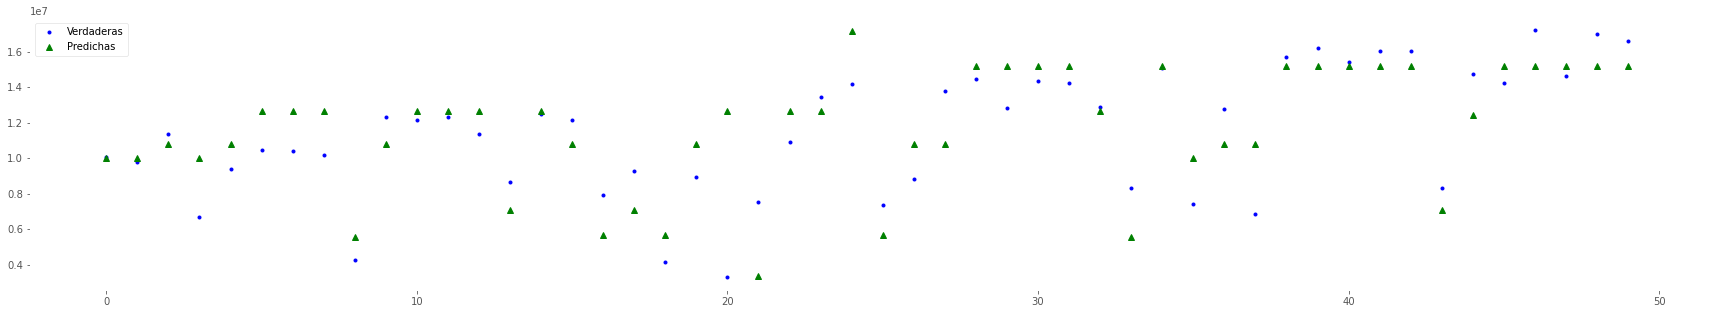

In [52]:
pintaResultados(aDecision_grid, 50)

##### Randomized Search

In [53]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'max_depth': range(1, 16),
              'min_samples_split': range(2, 16),
              #'min_samples_leaf': range(1, 6)
              }

# Hacemos la validación cruzada con RandomSearch para la busqueda de hiperparámetros
aDecision_random = RandomizedSearchCV(DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_root_mean_squared_error',
                   cv=ps, 
                   n_jobs=-1, verbose=1, n_iter=100)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste
inicio_aDecision_random = time.time()
aDecision_random.fit(X=X_train, y=y_train)
fin_aDecision_random = time.time()

# Error
rmse_aDecision_random = -aDecision_random.best_score_
print("RMSE de KNN ajustado con gridsearch: ", rmse_aDecision_random)

# Tiempo de ejecución
run_time_aDecision_random = fin_aDecision_random-inicio_aDecision_random
print('El metodo de arbol de regresion con randomSearch ha tardado, RSME:', run_time_aDecision_random, 'segundos')


Fitting 1 folds for each of 100 candidates, totalling 100 fits
RMSE de KNN ajustado con gridsearch:  3101087.825646977
El metodo de arbol de regresion con randomSearch ha tardado, RSME: 3.2722198963165283 segundos


In [54]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================

aDecision_random = RandomizedSearchCV(DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=ps, 
                   n_jobs=-1, verbose=1, n_iter=100)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_aDecision_random = time.time()
aDecision_random.fit(X=X_train, y=y_train)
fin_aDecision_random = time.time()

# Error
mae_aDecision_random = -aDecision_random.best_score_
print("MAE de arbol de regresion con randomSearch: ", mae_aDecision_random)

# Tiempo de ejecución
mae_run_time_aDecision_random = fin_aDecision_random-inicio_aDecision_random
print('El metodo de arbol de regresion con randomSearch ha tardado, MAE:', run_time_aDecision_random, 'segundos')


Fitting 1 folds for each of 100 candidates, totalling 100 fits
MAE de arbol de regresion con randomSearch:  2165689.172741287
El metodo de arbol de regresion con randomSearch ha tardado, MAE: 3.2722198963165283 segundos


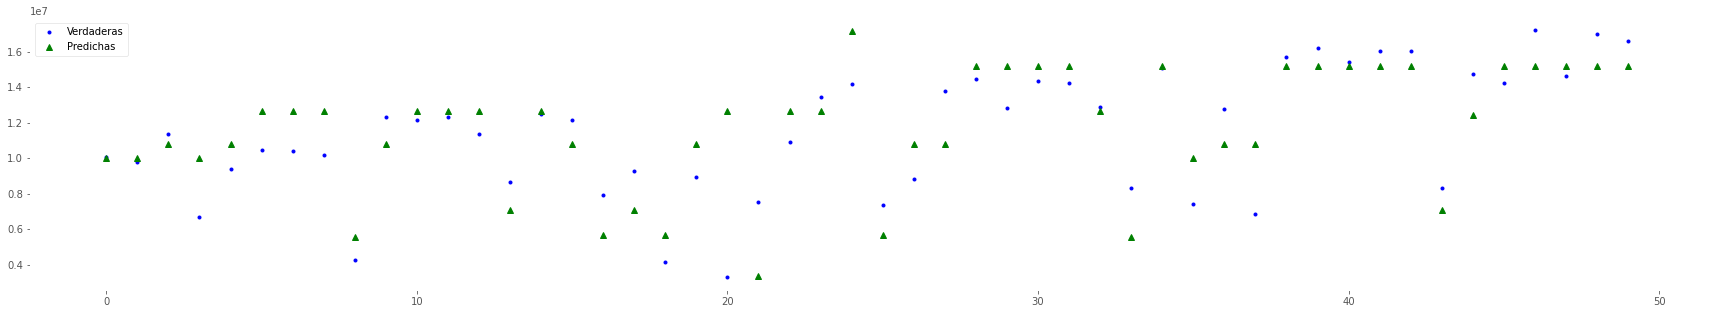

In [55]:
pintaResultados(aDecision_random, 50)

##### Optimización bayesiana

In [56]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'max_depth': list(range(1, 16)),
              'min_samples_split': list(range(2, 16)),
              #'min_samples_leaf': range(1, 6)
              }


# Definition of a 2-step process that self-adjusts 2 hyperpars
aDecision_bayes = BayesSearchCV(DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_root_mean_squared_error',
                   cv=ps, 
                   n_jobs=-1, verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_aDecision_bayes = time.time()
aDecision_bayes.fit(X=X_train, y=y_train)
fin_aDecision_bayes = time.time()

# Error
rmse_aDecision_bayes = -aDecision_bayes.best_score_
print("RMSE de arbol de regresion lineal: ", rmse_aDecision_bayes)

# Tiempo de ejecución
run_time_aDecision_bayes = fin_aDecision_bayes-inicio_aDecision_bayes
print('El metodo de arbol de regresion lineal ha tardado, RMSE:', run_time_aDecision_bayes, 'segundos')


Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fi

In [57]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================

# Definition of a 2-step process that self-adjusts 2 hyperpars
aDecision_bayes = BayesSearchCV(DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=ps, 
                   n_jobs=-1, verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_aDecision_bayes = time.time()
aDecision_bayes.fit(X=X_train, y=y_train)
fin_aDecision_bayes = time.time()

# Error
mae_aDecision_bayes = -aDecision_bayes.best_score_
print("MAE de arbol de regresion lineal: ", mae_aDecision_bayes)

# Tiempo de ejecución
mae_run_time_aDecision_bayes = fin_aDecision_bayes-inicio_aDecision_bayes
print('El metodo de arbol de regresion lineal ha tardado, MAE:', mae_run_time_aDecision_bayes, 'segundos')

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fi

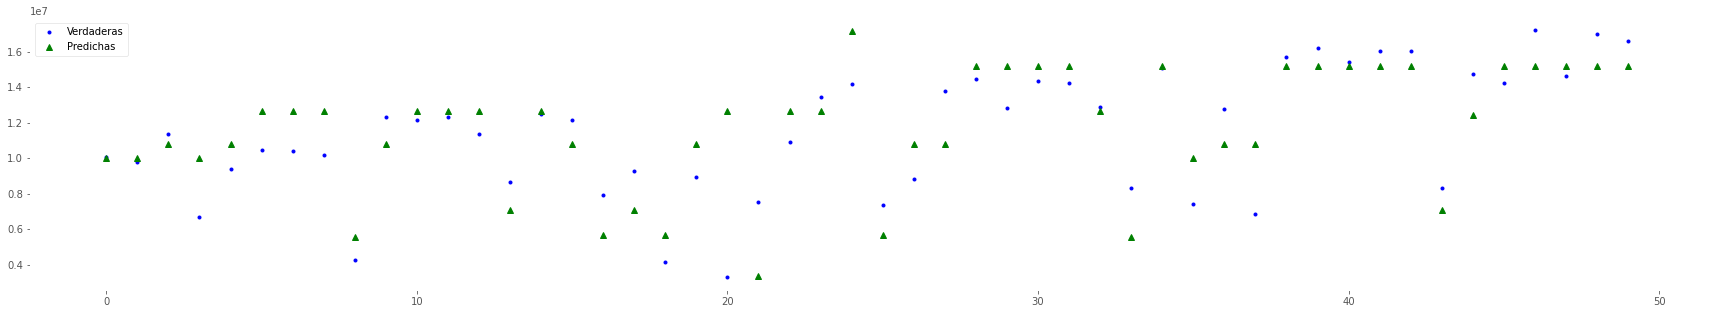

In [58]:
pintaResultados(aDecision_bayes,50)

### LinearTreeRegressor

#### Evaluación del modelo con sus hiperparámetros por omisión

In [59]:
# Aquí, establecemos nuestro modelo
aLineal = LinearTreeRegressor(base_estimator=LinearRegression())

np.random.seed(10)  # Reproducibilidad

# Hacemos validación cruzada
inicio_aLineal = time.time()
linearTreeRegressor_validated = cross_validate(aLineal, X_train, y_train, cv=ps, scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"])
fin_aLineal = time.time()

# Errores
rmse_aLineal = -linearTreeRegressor_validated["test_neg_root_mean_squared_error"]
mae_aLineal = -linearTreeRegressor_validated["test_neg_mean_absolute_error"]
print("RMSE de linearTreeRegressor por defecto : ", rmse_aLineal)
print("MAE de linearTreeRegressor por defecto : ", mae_aLineal)

# Tiempo de ejecución
run_time_aLineal = fin_aDecision-inicio_aDecision
print('El metodo linearTreeRegressorn ha tardado:', run_time_aLineal, 'segundos')

RMSE de linearTreeRegressor por defecto :  [3133509.69023352]
MAE de linearTreeRegressor por defecto :  [2262895.10684932]
El metodo linearTreeRegressorn ha tardado: 0.2498149871826172 segundos


#### Ajuste de los hiperparámetros del modelo

##### Gridsearch

In [60]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'fit_intercept': [True, False],
               "copy_X": [True, False],
               "fit_intercept": [True, False],
               "n_jobs": [1, 2, 4, 8],
               "positive": [True, False]
}

# Hacemos la validación cruzada para la busqueda de hiperparámetros
aLineal_grid = GridSearchCV(LinearRegression(), 
                   param_grid,
                   scoring='neg_root_mean_squared_error',
                   cv=ps, 
                   n_jobs=-1, verbose=1)

# Reproducibilidad
np.random.seed(10) 

# Entrenamos el modelo
inicio_aLineal_grid = time.time()
aLineal_grid.fit(X=X_train, y=y_train)
fin_aLineal_grid = time.time()

# Error
rmse_aLineal_grid = -aLineal_grid.best_score_
print(f"RMSE de arbol de regresion con gridSeach: ", -aLineal_grid.best_score_)

# Tiempo de ejecución
run_time_aLineal_grid = fin_aLineal_grid-inicio_aLineal_grid
print('El metodo de arbol de regresion con gridSeach ha tardado, RMSE:', run_time_aLineal_grid, 'segundos')

Fitting 1 folds for each of 32 candidates, totalling 32 fits
RMSE de arbol de regresion con gridSeach:  2791815.855998384
El metodo de arbol de regresion con gridSeach ha tardado, RMSE: 0.24545788764953613 segundos


In [61]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================

aLineal_grid = GridSearchCV(LinearRegression(), 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=ps, 
                   n_jobs=-1, verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_aLineal_grid = time.time()
aLineal_grid.fit(X=X_train, y=y_train)
fin_aLineal_grid = time.time()

# Error
mae_aLineal_grid = -aLineal_grid.best_score_
print(f"MAE de arbol de regresion con gridSeach: ", rmse_aLineal_grid)

# Tiempo de ejecución
mae_run_time_aLineal_grid = fin_aLineal_grid-inicio_aLineal_grid
print('El metodo de arbol de regresion con gridSeach ha tardado, MAE:', mae_run_time_aLineal_grid, 'segundos')

Fitting 1 folds for each of 32 candidates, totalling 32 fits
MAE de arbol de regresion con gridSeach:  2791815.855998384
El metodo de arbol de regresion con gridSeach ha tardado, MAE: 0.21564006805419922 segundos


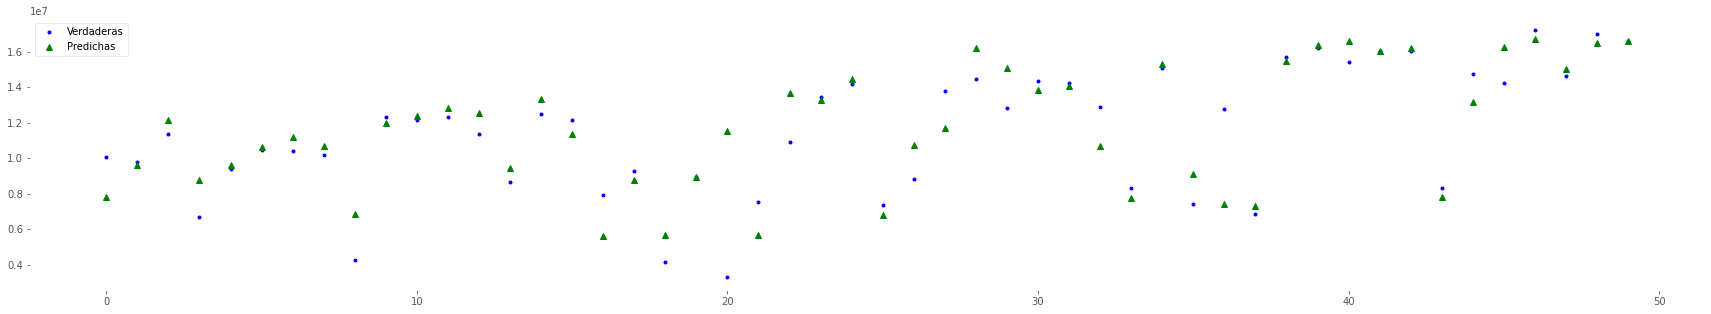

In [62]:
pintaResultados(aLineal_grid, 50)

##### Randomized Search

In [63]:
# Definir los hiperparámetros a ajustar
param_random = {'fit_intercept': [True, False],
               "copy_X": [True, False],
               "fit_intercept": [True, False],
               "n_jobs": [1, 2, 4, 8],
               "positive": [True, False]
}

# Hacemos la validación cruzada para la busqueda de hiperparámetros
aLineal_random = RandomizedSearchCV(LinearRegression(), 
                   param_grid,
                   scoring='neg_root_mean_squared_error',
                   cv=ps, 
                   n_jobs=-1, verbose=1, n_iter=100)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste
inicio_aLineal_random = time.time()
aLineal_random.fit(X=X_train, y=y_train)
fin_aLineal_random = time.time()

# Error
rmse_aLineal_random = -aLineal_random.best_score_
print("RMSE de KNN ajustado con randomsearch: ", rmse_aLineal_random)

# Tiempo de ejecución
run_time_aLineal_random = fin_aLineal_random-inicio_aLineal_random
print('El metodo de arbol de regresion con randomSearch ha tardado, RSME:', run_time_aLineal_random, 'segundos')


Fitting 1 folds for each of 32 candidates, totalling 32 fits
RMSE de KNN ajustado con randomsearch:  2791815.855998384
El metodo de arbol de regresion con randomSearch ha tardado, RSME: 0.2319629192352295 segundos


In [64]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================
# Hacemos la validación cruzada para la busqueda de hiperparámetros
aLineal_random = RandomizedSearchCV(LinearRegression(), 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=ps, 
                   n_jobs=-1, verbose=1, n_iter=100)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste
inicio_aLineal_random = time.time()
aLineal_random.fit(X=X_train, y=y_train)
fin_aLineal_random = time.time()

# Error
mae_aLineal_random = -aLineal_random.best_score_
print("MAE de KNN ajustado con randomsearch: ", rmse_aLineal_random)

# Tiempo de ejecución
mae_run_time_aLineal_random = fin_aLineal_random-inicio_aLineal_random
print('El metodo de arbol de regresion con randomSearch ha tardado, MAE:', mae_run_time_aLineal_random, 'segundos')

Fitting 1 folds for each of 32 candidates, totalling 32 fits
MAE de KNN ajustado con randomsearch:  2791815.855998384
El metodo de arbol de regresion con randomSearch ha tardado, MAE: 0.21228599548339844 segundos


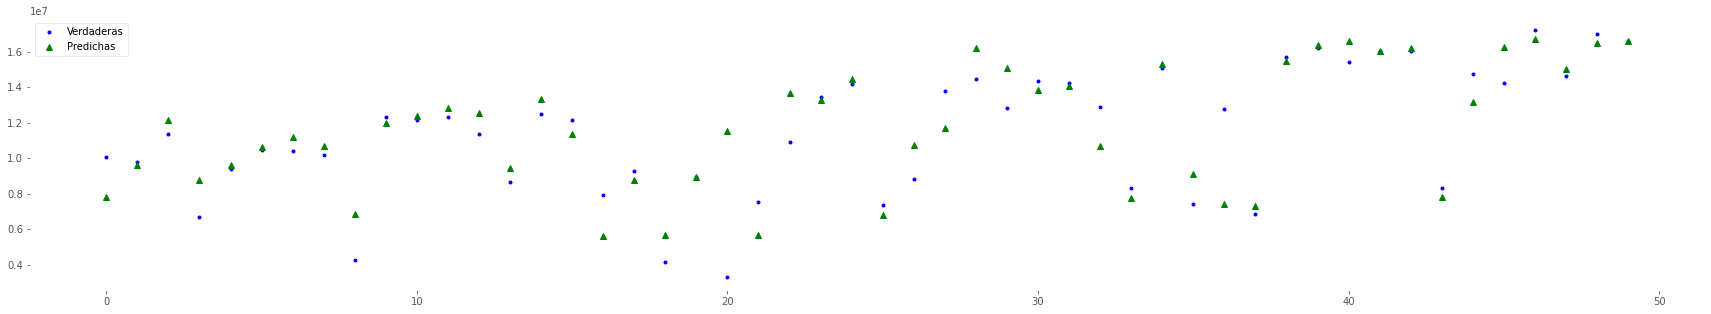

In [65]:
pintaResultados(aLineal_random, 50)

##### Optimización bayesiana

In [66]:
# Definir los hiperparámetros a ajustar
param_bayes = {'fit_intercept': [True, False],
               "copy_X": [True, False],
               "fit_intercept": [True, False],
               "n_jobs": [1, 2, 4, 8],
               "positive": [True, False]
}

# Hacemos la validación cruzada para la busqueda de hiperparámetros
aLineal_bayes = BayesSearchCV(LinearRegression(), 
                   param_grid,
                   scoring='neg_root_mean_squared_error',
                   cv=ps, 
                   n_jobs=-1, verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_aLineal_bayes = time.time()
aLineal_bayes.fit(X=X_train, y=y_train)
fin_aLineal_bayes = time.time()

# Error
rmse_aLineal_bayes = -aLineal_bayes.best_score_
print("RMSE de arbol de regresion lineal: ", rmse_aLineal_bayes)

# Tiempo de ejecución
run_time_aLineal_bayes = fin_aLineal_bayes-inicio_aLineal_bayes
print('El metodo de arbol de regresion lineal ha tardado, RMSE:', run_time_aLineal_bayes, 'segundos')

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fi

In [67]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================

# Hacemos la validación cruzada con BayesSearch para la busqueda de hiperparámetros
aLineal_bayes = BayesSearchCV(LinearRegression(), 
                   param_grid,
                   scoring='neg_mean_absolute_error',
                   cv=ps, 
                   n_jobs=-1, verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_aLineal_bayes = time.time()
aLineal_bayes.fit(X=X_train, y=y_train)
fin_aLineal_bayes = time.time()

# Error
mae_aLineal_bayes = -aLineal_bayes.best_score_
print("MAE de arbol de regresion lineal con bayesSearch: ", -aLineal_bayes.best_score_)

# Tiempo de ejecución
mae_run_time_aLineal_bayes = fin_aLineal_bayes-inicio_aLineal_bayes
print('El metodo de arbol de regresion lineal ha tardado con bayesSearch, MAE:', mae_run_time_aLineal_bayes, 'segundos')

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fi

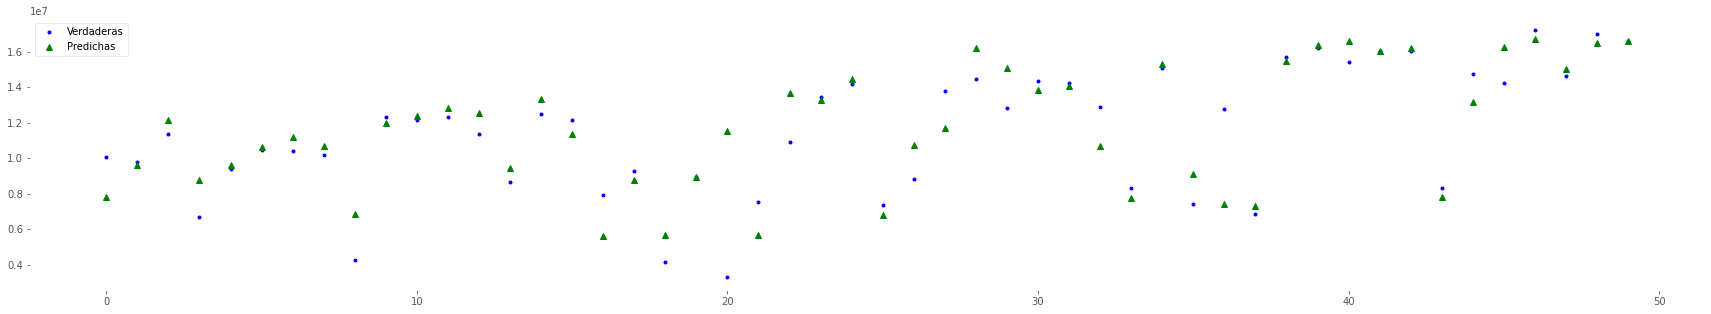

In [68]:
pintaResultados(aLineal_bayes, 50)

## Regresión lineal

En esta sección trabajaremos con los modelos de regresión lineal. En concreto construiremos modelos lineales aproximados por mínimos cuadrados, así como sus versiones en las que se incorporan las regularizaciones Ridge, Lasso y Elastic Net. Como último veremos una regresión polinómica.

### Regresión lineal por mínimos cuadrados

#### Evaluación del modelo con sus hiperparámetros por omisión

In [161]:
# Aquí, establecemos nuestro modelo
linealmc = Pipeline([
    ('scale', StandardScaler()),
    ('REGL', LinearRegression())])

np.random.seed(10)  # Reproducibilidad

# Hacemos validación cruzada
inicio_linealmc = time.time()
regr_linealmc_validated = cross_validate(linealmc, X_train, y_train, cv=ps, scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"])
fin_linealmc = time.time()

# Errores
rmse_linealmc =  -regr_linealmc_validated["test_neg_root_mean_squared_error"]
mae_linealmc =  -regr_linealmc_validated["test_neg_mean_absolute_error"]

print("RMSE de regresión lineal por minimos cuadrados con los parametros por omisión : ", -regr_linealmc_validated["test_neg_root_mean_squared_error"])
print("MAE de regresión lineal por minimos cuadrados con los parametros por omisión: ", -regr_linealmc_validated["test_neg_mean_absolute_error"])

# Tiempo de ejecución
run_time_regr_linealmc_validated = fin_linealmc - inicio_linealmc
print('El metodo regresión lineal por minimos cuadrados con los parametros por omisión ha tardado:', run_time_regr_linealmc_validated, 'segundos')


RMSE de regresión lineal por minimos cuadrados con los parametros por omisión :  [2794559.50992496]
MAE de regresión lineal por minimos cuadrados con los parametros por omisión:  [1968858.6833078]
El metodo regresión lineal por minimos cuadrados con los parametros por omisión ha tardado: 0.09514284133911133 segundos


#### Ajuste de los hiperparámetros del modelo

##### Gridsearch

In [164]:
# Creamos un pipeline con StandardScaler y LinearRegression
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regression", LinearRegression())
])

# Definimos los hiperparámetros a ajustar y sus posibles valores
parametros = {
    "regression__copy_X": [True, False],
    "regression__fit_intercept": [True, False],
    "regression__n_jobs": [0.1, 1, 2, 4, 8],
    "regression__positive": [True, False]
}

# Creamos un objeto GridSearchCV para buscar los mejores hiperparámetros
linealmc_grid = GridSearchCV(pipeline, # El pipeline que vamos a ajustar
    parametros, # Los hiperparámetros a ajustar
    cv=ps, # Número de folds para la validación cruzada
    scoring="neg_root_mean_squared_error" # Métrica de evaluación del modelo
)

# Reproducibilidad
np.random.seed(10) 

# Ajustamos el modelo a los datos
inicio_linealmc_grid = time.time()
linealmc_grid.fit(X, y)
fin_linealmc_grid = time.time()

# Error 
rmse_linealmc_grid = -linealmc_grid.best_score_
print("RMSE de regresión lineal por minimos cuadrados ajustado con gridsearch: ", -linealmc_grid.best_score_)

# Tiempo de ejecución
run_time_linealmc_grid = fin_linealmc_grid-inicio_linealmc_grid
print('El metodo de regresión lineal por minimos cuadrados ajustado con gridsearch ha tardado, RMSE:', run_time_linealmc_grid, 'segundos')

RMSE de regresión lineal por minimos cuadrados ajustado con gridsearch:  2794559.509924959
El metodo de regresión lineal por minimos cuadrados ajustado con gridsearch ha tardado, RMSE: 0.8751130104064941 segundos


In [165]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================

# Creamos un objeto GridSearchCV para buscar los mejores hiperparámetros
linealmc_grid = GridSearchCV(pipeline, # El pipeline que vamos a ajustar
    parametros, # Los hiperparámetros a ajustar
    cv=ps, # Número de folds para la validación cruzada
    scoring="neg_mean_absolute_error" # Métrica de evaluación del modelo
)

# Reproducibilidad
np.random.seed(10) 

# Ajustamos el modelo a los datos
inicio_linealmc_grid = time.time()
linealmc_grid.fit(X, y)
fin_linealmc_grid = time.time()

# Error 
mae_linealmc_grid = -linealmc_grid.best_score_
print("MAE de regresión lineal por minimos cuadrados ajustado con gridsearch: ", -linealmc_grid.best_score_)

# Tiempo de ejecución
mae_run_time_linealmc_grid = fin_linealmc_grid-inicio_linealmc_grid
print('El metodo de regresión lineal por minimos cuadrados ajustado con gridsearch ha tardado, MAE:', mae_run_time_linealmc_grid, 'segundos')


MAE de regresión lineal por minimos cuadrados ajustado con gridsearch:  1968858.6833077967
El metodo de regresión lineal por minimos cuadrados ajustado con gridsearch ha tardado, MAE: 0.6040170192718506 segundos


In [166]:
# Imprimimos los mejores hiperparámetros y la mejor puntuación obtenida
print("Mejores hiperparámetros:", linealmc_grid.best_params_)
print("Mejor puntuación:", -linealmc_grid.best_score_)

Mejores hiperparámetros: {'regression__copy_X': True, 'regression__fit_intercept': True, 'regression__n_jobs': 1, 'regression__positive': False}
Mejor puntuación: 1968858.6833077967


##### Randomized search

In [73]:
# Creamos un pipeline con StandardScaler y LinearRegression
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regression", LinearRegression())
])

# Definimos los hiperparámetros a ajustar y sus posibles valores
parametros = {
    "regression__copy_X": [True, False],
    "regression__fit_intercept": [True, False],
    "regression__n_jobs": [0.1, 1, 2, 4, 8],
    "regression__positive": [True, False]
}

# Creamos un objeto GridSearchCV para buscar los mejores hiperparámetros
linealmc_random = RandomizedSearchCV(
    pipeline, # El pipeline que vamos a ajustar
    parametros, # Los hiperparámetros a ajustar
    cv=ps, # Número de folds para la validación cruzada
    scoring="neg_root_mean_squared_error", # Métrica de evaluación del modelo
    n_iter=100
)

np.random.seed(10)  # Reproducibilidad

# Ajustamos el modelo a los datos
inicio_linealmc_random = time.time()
linealmc_random.fit(X, y)
fin_linealmc_random = time.time()

# Error
rmse_linealmc_random = -linealmc_random.best_score_
print("RMSE de regresión lineal por minimos cuadrados ajustado con randomSearch: ", -linealmc_random.best_score_)

# Tiempo de ejecución
run_time_linealmc_random = fin_linealmc_random-inicio_linealmc_random
print('El metodo de regresión lineal por minimos cuadrados con randomSearch ha tardado, RMSE:', run_time_linealmc_random, 'segundos')

RMSE de regresión lineal por minimos cuadrados ajustado con randomSearch:  2794559.509924959
El metodo de regresión lineal por minimos cuadrados con randomSearch ha tardado, RMSE: 0.4549891948699951 segundos


In [74]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================

# Creamos un objeto GridSearchCV para buscar los mejores hiperparámetros
linealmc_random = RandomizedSearchCV(
    pipeline, # El pipeline que vamos a ajustar
    parametros, # Los hiperparámetros a ajustar
    cv=ps, # Número de folds para la validación cruzada
    scoring="neg_mean_absolute_error", # Métrica de evaluación del modelo
    n_iter=100
)

# Reproducibilidad
np.random.seed(10)

# Ajustamos el modelo a los datos
inicio_linealmc_random = time.time()
linealmc_random.fit(X, y)
fin_linealmc_random = time.time()

# Error
mae_linealmc_random = -linealmc_random.best_score_
print("MAE de regresión lineal por minimos cuadrados ajustado con randomSearch: ", rmse_linealmc_random)

# Tiempo de ejecución
mae_run_time_linealmc_random = fin_linealmc_random-inicio_linealmc_random
print('El metodo de regresión lineal por minimos cuadrados con randomSearch ha tardado, MAE:', mae_run_time_linealmc_random, 'segundos')


MAE de regresión lineal por minimos cuadrados ajustado con randomSearch:  2794559.509924959
El metodo de regresión lineal por minimos cuadrados con randomSearch ha tardado, MAE: 0.429577112197876 segundos


In [75]:
# Imprimimos los mejores hiperparámetros y la mejor puntuación obtenida
print("Mejores hiperparámetros:", linealmc_random.best_params_)
print("Mejor puntuación:", -linealmc_random.best_score_)

Mejores hiperparámetros: {'regression__positive': False, 'regression__n_jobs': 1, 'regression__fit_intercept': True, 'regression__copy_X': True}
Mejor puntuación: 1968858.6833077967


##### Optimización bayesiana

In [76]:
# Creamos un pipeline con StandardScaler y LinearRegression
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("regression", LinearRegression())
])

# Definimos los hiperparámetros a ajustar y sus posibles valores
parametros = {
    "regression__copy_X": [True, False],
    "regression__fit_intercept": [True, False],
    "regression__positive": [True, False]
}

# Creamos un objeto GridSearchCV para buscar los mejores hiperparámetros
linealmc_bayes = BayesSearchCV(
    pipeline, # El pipeline que vamos a ajustar
    parametros, # Los hiperparámetros a ajustar
    cv=ps, # Número de folds para la validación cruzada
    scoring="neg_root_mean_squared_error" # Métrica de evaluación del modelo
)

# Reproducibilidad
np.random.seed(10)

# Ajustamos el modelo a los datos
inicio_linealmc_bayes = time.time()
linealmc_bayes.fit(X, y)
fin_linealmc_bayes = time.time()

# Error
rmse_linealmc_bayes = -linealmc_bayes.best_score_
print("RMSE de regresión lineal por minimos cuadrados con bayesSearch: ", -linealmc_bayes.best_score_)

# Tiempo de ejecución
run_time_linealmc_bayes = fin_linealmc_bayes-inicio_linealmc_bayes
print('El metodo de regresión lineal por minimos cuadrados con bayesSearch ha tardado, RMSE:', run_time_linealmc_bayes, 'segundos')

RMSE de regresión lineal por minimos cuadrados con bayesSearch:  2794559.509924959
El metodo de regresión lineal por minimos cuadrados con bayesSearch ha tardado, RMSE: 47.611387729644775 segundos


In [77]:
# Creamos un objeto GridSearchCV para buscar los mejores hiperparámetros
linealmc_bayes = BayesSearchCV(
    pipeline, # El pipeline que vamos a ajustar
    parametros, # Los hiperparámetros a ajustar
    cv=ps, # Número de folds para la validación cruzada
    scoring="neg_mean_absolute_error" # Métrica de evaluación del modelo
)

# Reproducibilidad
np.random.seed(10)

# Ajustamos el modelo a los datos
inicio_linealmc_bayes = time.time()
linealmc_bayes.fit(X, y)
fin_linealmc_bayes = time.time()

# Error
mae_linealmc_bayes = -linealmc_bayes.best_score_
print("MAE de regresión lineal por minimos cuadrados con bayesSearch: ", -linealmc_bayes.best_score_)

# Tiempo de ejecución
mae_run_time_linealmc_bayes = fin_linealmc_bayes-inicio_linealmc_bayes
print('El metodo de regresión lineal por minimos cuadrados con bayesSearch ha tardado, MAE:', run_time_linealmc_bayes, 'segundos')

MAE de regresión lineal por minimos cuadrados con bayesSearch:  1968858.6833077967
El metodo de regresión lineal por minimos cuadrados con bayesSearch ha tardado, MAE: 47.611387729644775 segundos


In [78]:
# Imprimimos los mejores hiperparámetros y la mejor puntuación obtenida
print("Mejores hiperparámetros:", linealmc_bayes.best_params_)
print("Mejor puntuación:", -linealmc_bayes.best_score_)

Mejores hiperparámetros: OrderedDict([('regression__copy_X', True), ('regression__fit_intercept', True), ('regression__positive', False)])
Mejor puntuación: 1968858.6833077967


### Ridge

#### Evaluación del modelo

In [79]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# Por defecto RidgeCV utiliza el mean squared error
regrRidge_pipe = RidgeCV(
            # 200 = nº muestras
            alphas          = np.logspace(-3, 8, 200),
            fit_intercept   = True,
            store_cv_values = True,
         )

regrRidge = Pipeline([
    ('scale', StandardScaler()),
    ('REGL', regrRidge_pipe)])

np.random.seed(10)  # Reproducibilidad

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_ridge = time.time()
_ = regrRidge.fit(X = X_train, y = y_train)
fin_ridge = time.time()

# Obtenemos  prediciones con el test set
y_test_pred = _.predict(X_test)

RMSE de regresión lineal - Ridge: 2808892.2186740735
MAE de regresión lineal - Ridge: 1864033.592305954
El metodo de regresión lineal - Ridge ha tardado: 0.25298476219177246 segundos


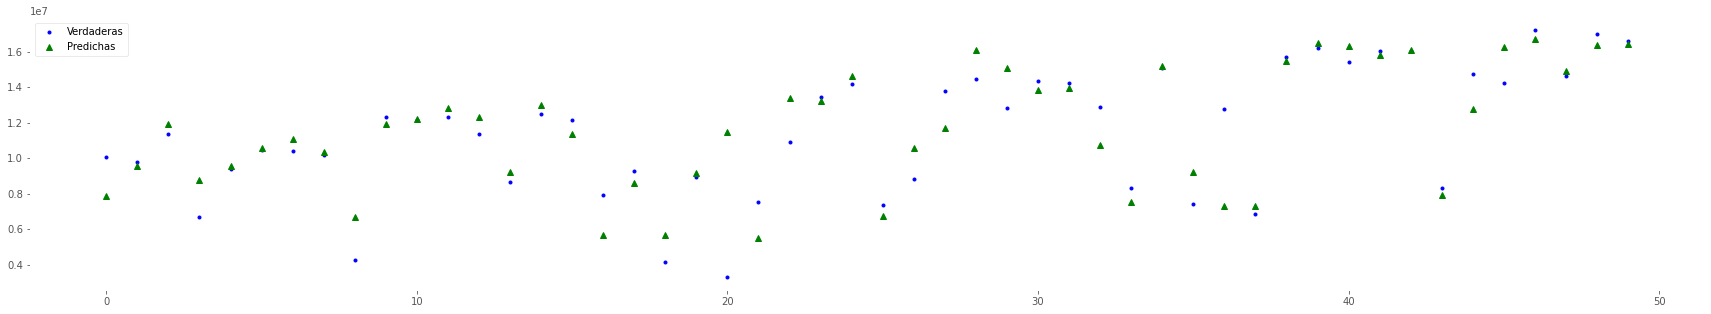

In [80]:
# RMSE
rmse_ridge = rmse(y_test, y_test_pred)
print(f"RMSE de regresión lineal - Ridge: {rmse_ridge}")
pintaResultados(regrRidge,50)

# MAE
mae_ridge = metrics.mean_absolute_error(y_test, y_test_pred)
print(f"MAE de regresión lineal - Ridge: {mae_ridge}")

# Tiempo de ejecución
run_time_ridge = fin_ridge-inicio_ridge
print('El metodo de regresión lineal - Ridge ha tardado:', run_time_ridge, 'segundos')

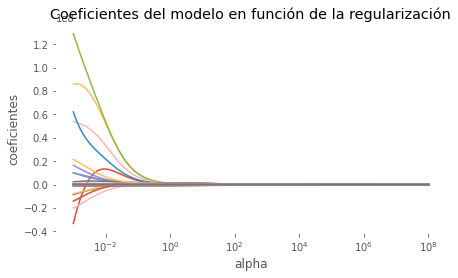

In [167]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================

#alphas = regrRidge.alphas
alphas = regrRidge.named_steps['REGL'].alphas
coefs = []

# Reproducibilidad
np.random.seed(10) 

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())


# Gráfico
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

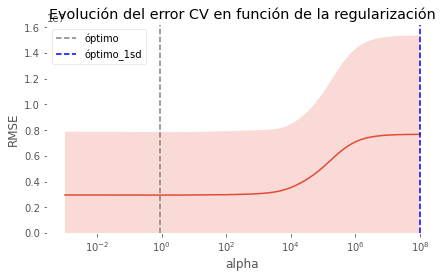

In [168]:
# Evolución del error en función de alpha
# ==============================================================================

# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = regrRidge.named_steps['REGL'].cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = regrRidge.named_steps['REGL'].cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = regrRidge.named_steps['REGL'].alphas[np.argmin(rmse_cv)]
optimo_1sd   = regrRidge.named_steps['REGL'].alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(regrRidge.named_steps['REGL'].alphas, rmse_cv)
ax.fill_between(
    regrRidge.named_steps['REGL'].alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend()

In [83]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {regrRidge.named_steps['REGL'].alpha_}")

Mejor valor de alpha encontrado: 0.8504489341802686


Text(0.5, 1.0, 'Coeficientes del modelo')

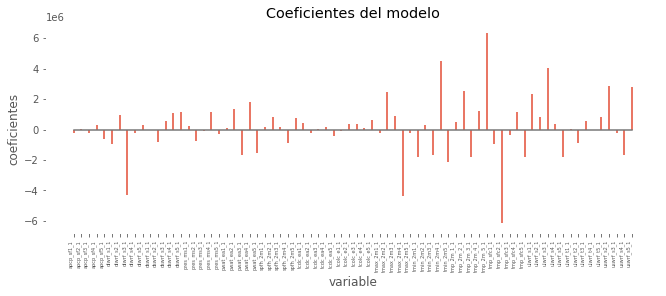

In [84]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': feat_names,
                         'coef': regrRidge.named_steps['REGL'].coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo')

In [85]:
regrRidge.named_steps['REGL'].coef_
#regrRidge['REGL'].coef_

array([ -197773.49315333,    65323.86854477,  -210133.74101521,
         285657.58716321,  -613769.79136797,  -975489.8653171 ,
         948110.02645058, -4282880.48539869,  -229035.92781801,
         267500.94575942,   -60548.98688635,  -835442.97060492,
         574387.22755548,  1115965.90470169,  1121790.9625935 ,
         217391.34753746,  -766924.86514288,  -122266.90020926,
        1135567.44745704,  -311379.56553186,    76743.29619768,
        1360966.7879683 , -1658753.79997341,  1794743.899882  ,
       -1525010.33421726,   141299.75504426,   807239.67820344,
         191742.1909533 ,  -875574.91579721,   779167.36067139,
         431875.25906451,  -220323.57594946,    17118.47389767,
         145823.30930972,  -434218.3546794 ,  -115826.8976191 ,
         339156.53666055,   338895.23652628,   130156.06672779,
         624254.38217451,  -231562.68423943,  2438226.43043433,
         857368.82980923, -4334623.31431255,  -249705.99410132,
       -1801381.81707578,   266251.66601

### Lasso

#### Evaluación del modelo

In [86]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================

# Por defecto LassoCV utiliza el mean squared error
regrLasso_pipe = LassoCV(
            alphas          = np.logspace(-9, 3, 200),
            #cv              = ps
         )

regrLasso = Pipeline([
    ('scale', StandardScaler()),
    ('REGL', regrLasso_pipe)])

np.random.seed(10)  # Reproducibilidad

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_lasso = time.time()
regr_Lasso = regrLasso.fit(X = X_train, y = y_train)
fin_lasso = time.time()

# Obtenemos  prediciones con el test set
y_test_pred = regr_Lasso.predict(X_test)

RMSE de regresión lineal - Lasso: 2813298.536987961
MAE de regresión lineal - Lasso: 1869288.2507282284
El metodo de regresión lineal - Lasso ha tardado: 8.91783595085144 segundos


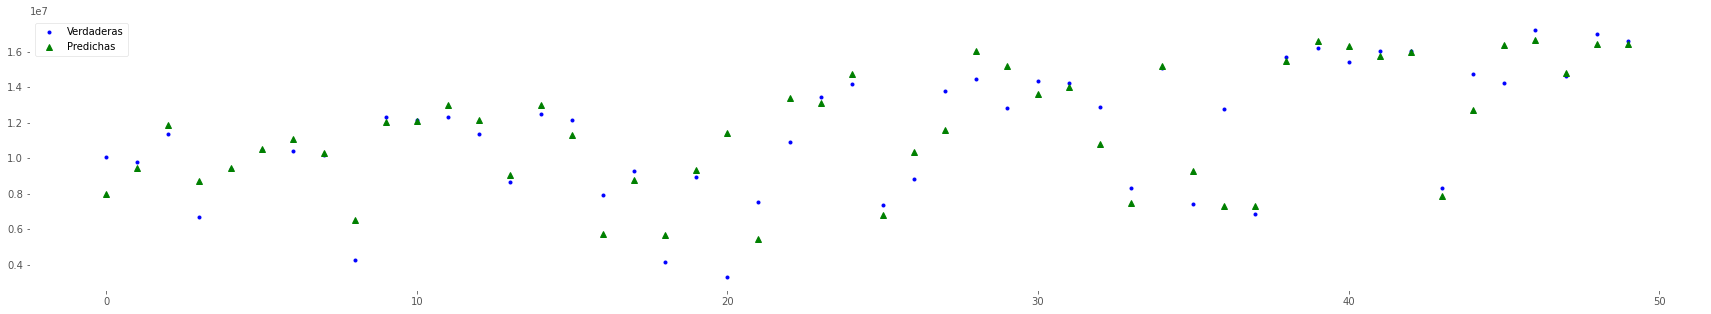

In [87]:
# RMSE
rmse_lasso = rmse(y_test, y_test_pred)
print(f"RMSE de regresión lineal - Lasso: {rmse_lasso}")
pintaResultados(regr_Lasso, 50)

# MAE
mae_lasso = metrics.mean_absolute_error(y_test, y_test_pred)
print(f"MAE de regresión lineal - Lasso: {mae_lasso}")

# Tiempo de ejecución
run_time_lasso = fin_lasso - inicio_lasso
print('El metodo de regresión lineal - Lasso ha tardado:', run_time_lasso, 'segundos')

Text(0.5, 1.0, 'Coeficientes del modelo en función de la regularización')

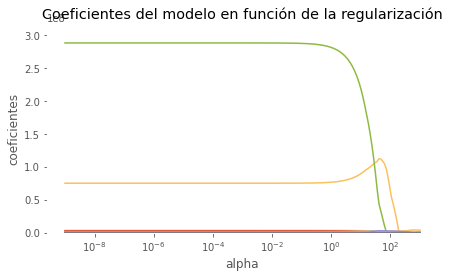

In [169]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = regrLasso.named_steps['REGL'].alphas_
coefs = []

# Reproducibilidad
np.random.seed(10) 

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-1,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización')

Text(0.5, 1.0, 'Predictores incluidos en función de la regularización')

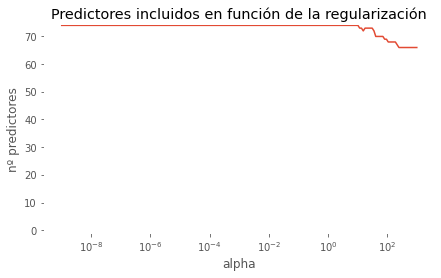

In [170]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
# ==============================================================================
alphas = regrLasso.named_steps['REGL'].alphas_
n_predictores = []

# Reproducibilidad
np.random.seed(10) 

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-1,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización')

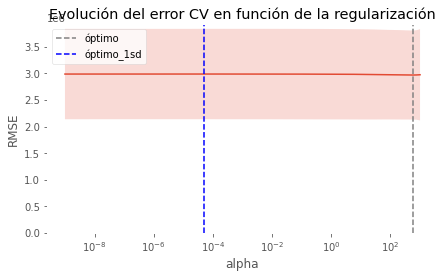

In [90]:
# Evolución del error en función de alpha
# ==============================================================================
# regrLasso.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)
mse_cv = regrLasso.named_steps['REGL'].mse_path_.mean(axis=1)
mse_sd = regrLasso.named_steps['REGL'].mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = regrLasso.named_steps['REGL'].alphas_[np.argmin(rmse_cv)]
optimo_1sd   = regrLasso.named_steps['REGL'].alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(regrLasso.named_steps['REGL'].alphas_, rmse_cv)
ax.fill_between(
    regrLasso.named_steps['REGL'].alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend()

In [91]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {regrLasso.named_steps['REGL'].alpha_}")

Mejor valor de alpha encontrado: 573.8441648302381


Text(0.5, 1.0, 'Coeficientes del modelo')

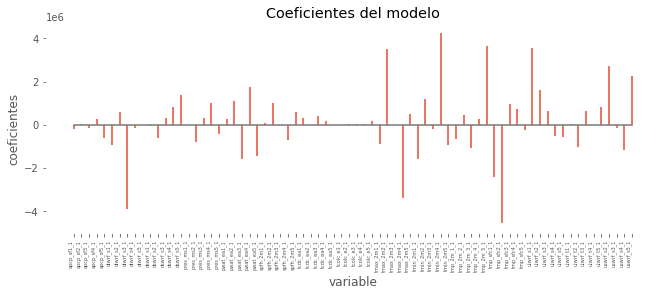

In [92]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': feat_names,
                         'coef': regrLasso.named_steps['REGL'].coef_.flatten()}
                  )
fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo')

### Elastic Net

#### Evaluación del modelo

In [93]:
# Por defecto ElasticNetCV utiliza el mean squared error
regrElastic_pipe = ElasticNetCV(
            l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
            alphas          = np.logspace(-10, 3, 200),
            cv              = 10
         )


# Creamos un pipeline para escalar los datos con el modelo
regrElastic = Pipeline([
    ('scale', StandardScaler()),
    ('REGL', regrElastic_pipe)])

np.random.seed(10)  # Reproducibilidad

# Lo entrenamos
inicio_elastic = time.time()
regr_net = regrElastic.fit(X = X_train, y = y_train)
fin_elastic = time.time()

# Obtenemos  prediciones con el test set
y_test_pred = regr_net.predict(X_test)

RMSE de regresión lineal - Elastic Net: 2816612.6567437807
MAE de regresión lineal - Elastic Net: 1871293.5418307004
El metodo de regresión lineal - Elastic Net ha tardado: 105.26503992080688 segundos


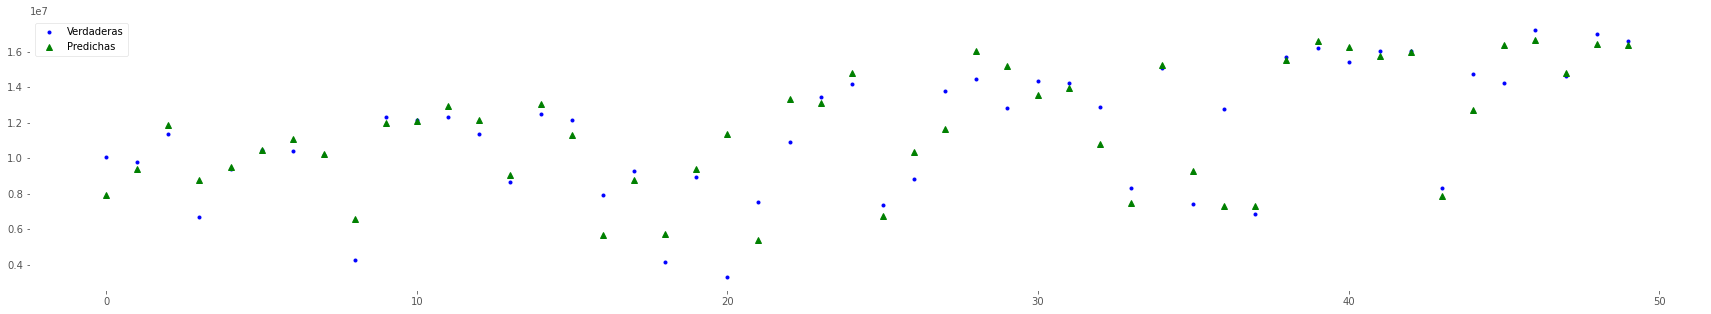

In [94]:
# RMSE
rmse_elastic = rmse(y_test, y_test_pred)
print(f"RMSE de regresión lineal - Elastic Net: {rmse_elastic}")
pintaResultados(regr_net, 50)

# MAE
mae_elastic = metrics.mean_absolute_error(y_test, y_test_pred)
print(f"MAE de regresión lineal - Elastic Net: {mae_elastic}")

# Tiempo de ejecución
run_time_elastic = fin_elastic - inicio_elastic
print('El metodo de regresión lineal - Elastic Net ha tardado:', run_time_elastic, 'segundos')


In [95]:
# Evolución del error en función de alpha y l1_ratio
# ==============================================================================
# regrElastic.mse_path_ almacena el mse de cv para cada valor de alpha y l1_ratio.
# Tiene dimensiones (n_l1_ratio, n_alpha, n_folds)

# Error medio de las 10 particiones por cada valor de alpha y l1_ratio 
mean_error_cv = regrElastic['REGL'].mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha)
# Se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [regrElastic['REGL'].l1_ratio, regrElastic['REGL'].alphas_],
                                    names     = ['l1_ratio', 'modelo.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

l1_ratio  modelo.alphas_        mse_cv       rmse_cv
693       0.70        0.000841  8.766032e+12  2.960749e+06
101       0.00        0.000252  8.766032e+12  2.960749e+06
1081      0.95        0.005111  8.766035e+12  2.960749e+06
886       0.90        0.002409  8.766044e+12  2.960751e+06
300       0.10        0.000293  8.766054e+12  2.960752e+06
...        ...             ...           ...           ...
2         0.00      740.196000  5.538800e+13  7.442311e+06
201       0.10      860.346442  5.553698e+13  7.452314e+06
1         0.00      860.346442  5.586342e+13  7.474183e+06
200       0.10     1000.000000  5.599424e+13  7.482930e+06
0         0.00     1000.000000  5.628046e+13  7.502030e+06

[1400 rows x 4 columns]

Text(0, 0.5, 'rmse_cv')

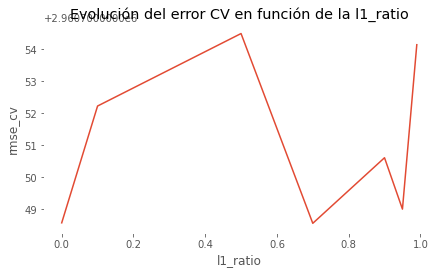

In [96]:
# Mejor valor encontrado para cada l1_ratio
fig, ax = plt.subplots(figsize=(7, 3.84))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv')

In [97]:
# Mejor valor alpha y l1_ratio_ encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {regrElastic['REGL'].alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {regrElastic['REGL'].l1_ratio_}")

Mejor valor de alpha encontrado: 0.0008406652885618334
Mejor valor de l1_ratio encontrado: 0.7


Text(0.5, 1.0, 'Coeficientes del modelo')

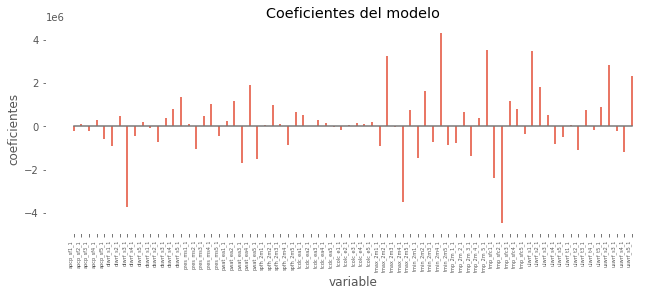

In [98]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': feat_names,
                         'coef': regrElastic['REGL'].coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo')

### Regresión polinómica

#### Evaluación del modelo con sus hiperparámetros por omisión

In [99]:
'''
degrees = [2, 3, 4, 5, 6] # Change degree "hyperparameter" here
best_score = 0
best_degree = 0

# Reproducibilidad
np.random.seed(10) 

for degree in degrees:
    poly_features = PolynomialFeatures(degree = degree, include_bias=False)
    X_train_poly = poly_features.fit_transform(X_train)
    polynomial_regressor = LinearRegression()
    polynomial_regressor.fit(X_train_poly, y_train)
    scores = cross_val_score(polynomial_regressor, X_train_poly, y_train, cv=ps) # Change k-fold cv value here
    if max(scores) > best_score:
      best_score = max(scores)
      best_degree = degree  

print(f"Mejor valor (R2): {best_score}")
print(f"Mejor valor de grado encontrado: {best_degree}") 
'''

'\ndegrees = [2, 3, 4, 5, 6] # Change degree "hyperparameter" here\nbest_score = 0\nbest_degree = 0\nfor degree in degrees:\n    poly_features = PolynomialFeatures(degree = degree, include_bias=False)\n    X_train_poly = poly_features.fit_transform(X_train)\n    polynomial_regressor = LinearRegression()\n    polynomial_regressor.fit(X_train_poly, y_train)\n    scores = cross_val_score(polynomial_regressor, X_train_poly, y_train, cv=ps) # Change k-fold cv value here\n    if max(scores) > best_score:\n      best_score = max(scores)\n      best_degree = degree  \n\nprint(f"Mejor valor (R2): {best_score}")\nprint(f"Mejor valor de grado encontrado: {best_degree}") \n'

In [100]:
'''
# Aquí, establecemos nuestro modelo
poly_features = PolynomialFeatures(degree = best_degree, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
best_polynomial_regressor = LinearRegression()

# Reproducibilidad
np.random.seed(10) 

# Lo entrenamos
best_polynomial_regressor.fit(X_train_poly, y_train)
X_test_poly = poly_features.fit_transform(X_test)

print(f"RMSE de regresión polinomial: {rmse(y_test, best_polynomial_regressor.predict(X=X_test_poly))}")
plt.subplots(figsize=(30, 5))
x = np.arange(y_test[:50].size)

# Evaluamos
y_pred = best_polynomial_regressor.predict(X=X_test_poly)
plt.plot(x, y_test[:50], 'b.', x, y_pred[:50], 'g^')
'''

'\n# Aquí, establecemos nuestro modelo\npoly_features = PolynomialFeatures(degree = best_degree, include_bias=False)\nX_train_poly = poly_features.fit_transform(X_train)\nbest_polynomial_regressor = LinearRegression()\n\n# Lo entrenamos\nbest_polynomial_regressor.fit(X_train_poly, y_train)\nX_test_poly = poly_features.fit_transform(X_test)\n\nprint(f"RMSE de regresión polinomial: {rmse(y_test, best_polynomial_regressor.predict(X=X_test_poly))}")\nplt.subplots(figsize=(30, 5))\nx = np.arange(y_test[:50].size)\n\n# Evaluamos\ny_pred = best_polynomial_regressor.predict(X=X_test_poly)\nplt.plot(x, y_test[:50], \'b.\', x, y_pred[:50], \'g^\')\n'

In [101]:
#print(best_polynomial_regressor.coef_)

## Conclusiones

¿cuál es el mejor método? ¿Cuál de los métodos básicos de aprendizaje automático es más rápido? ¿Los resultados son mejores que los regresores triviales/naive/baseline? ¿El ajuste de hiperparámetros mejora con respecto a los valores por omisión? ¿Hay algún equilibrio entre tiempo de ejecución y mejora de resultados? Etc.

In [174]:
# RMSE
# ==============================================================================

# Creamos un diccionario con los valores de cada columna
data = {
    'original': [rmse_knn, rmse_aDecision, rmse_aLineal, rmse_linealmc, rmse_ridge, rmse_lasso, rmse_elastic],
    'gridSearch': [rmse_knn_grid, rmse_aDecision_grid, rmse_aLineal_grid, rmse_linealmc_grid, '-', '-', '-'],
    'randomSearch': [rmse_knn_random, rmse_aDecision_random, rmse_aLineal_random, rmse_linealmc_random, '-', '-', '-'],
    'bayesSeach': [rmse_knn_bayes, rmse_aDecision_bayes, rmse_aLineal_bayes, rmse_linealmc_bayes, '-', '-', '-']
}

# Creamos un DataFrame a partir del diccionario
rmse_df = pd.DataFrame(data, index=['K-nn', 'arbolDecision', 'arbolLineal', 'LinealMC', 'Ridge', 'Lasso', 'Elastic-net'])

# Imprimimos el DataFrame
rmse_df

original      gridSearch    randomSearch  \
K-nn           [3012505.1605153284]  2935959.144719   2938773.94315   
arbolDecision   [4114831.985143367]  3101087.825647  3101087.825647   
arbolLineal     [3133509.690233524]  2791815.855998  2791815.855998   
LinealMC        [2794559.509924959]  2794559.509925  2794559.509925   
Ridge                2808892.218674               -               -   
Lasso                2813298.536988               -               -   
Elastic-net          2816612.656744               -               -   

                   bayesSeach  
K-nn           2935959.144719  
arbolDecision  3101087.825647  
arbolLineal    2791815.855998  
LinealMC       2794559.509925  
Ridge                       -  
Lasso                       -  
Elastic-net                 -

Podemos ver como el mejor método básico respecto el RMSE es el de arbol lineal con cualquiera de los ajustes de hiperparámetros. Cabe destacar que en todos los que podemos hacer distintos ajustes, siempre hay una mejoria o por lo menos no empeora en ningun caso.

In [175]:
# MAE
# ==============================================================================

# Creamos un diccionario con los valores de cada columna
data = {
    'original': [mae_knn, mae_aDecision, mae_aLineal, mae_linealmc, mae_ridge, mae_lasso, mae_elastic],
    'gridSearch': [mae_knn_grid, mae_aDecision_grid, mae_aLineal_grid, mae_linealmc_grid, '-', '-', '-'],
    'randomSearch': [mae_knn_random, mae_aDecision_random, mae_aLineal_random, mae_linealmc_random, '-', '-', '-'],
    'bayesSeach': [mae_knn_bayes, mae_aDecision_bayes, mae_aLineal_bayes, mae_linealmc_bayes, '-', '-', '-']
}

# Creamos un DataFrame a partir del diccionario
mae_df = pd.DataFrame(data, index=['K-nn', 'arbolDecision', 'arbolLineal', 'LinealMC', 'Ridge', 'Lasso', 'Elastic-net'])

# Imprimimos el DataFrame
mae_df

original      gridSearch    randomSearch  \
K-nn           [2141476.7506849314]  2069520.057954   2938773.94315   
arbolDecision   [2742760.684931507]  2165689.172741  2165689.172741   
arbolLineal     [2262895.106849315]  1966397.278251  1966397.278251   
LinealMC       [1968858.6833077967]  1968858.683308  1968858.683308   
Ridge                1864033.592306               -               -   
Lasso                1869288.250728               -               -   
Elastic-net          1871293.541831               -               -   

                   bayesSeach  
K-nn            2089487.00049  
arbolDecision  2165689.172741  
arbolLineal    1966397.278251  
LinealMC       1968858.683308  
Ridge                       -  
Lasso                       -  
Elastic-net                 -

Con MAE los mejores métodos son los de regresion lineal. De nuevo el ajuste de hiperparametros tiene mejores resultados que el original.

In [176]:
# Tiempo de ejecucion evaluando RMSE
# ==============================================================================

# Creamos un diccionario con los valores de cada columna
data = {
    'original': [run_time_knn, run_time_aDecision, run_time_aLineal, run_time_regr_linealmc_validated, run_time_ridge, run_time_lasso, run_time_elastic],
    'gridSearch': [run_time_knn_grid, run_time_aDecision_grid, run_time_aLineal_grid, run_time_linealmc_grid, '-', '-', '-'],
    'randomSearch': [run_time_knn_random, run_time_aDecision_random, run_time_aLineal_random, run_time_linealmc_random, '-', '-', '-'],
    'bayesSeach': [run_time_knn_bayes, run_time_aDecision_bayes, run_time_aLineal_bayes, run_time_linealmc_bayes, '-', '-', '-']
}

# Creamos un DataFrame a partir del diccionario
run_time_df = pd.DataFrame(data, index=['K-nn', 'arbolDecision', 'arbolLineal', 'LinealMC', 'Ridge', 'Lasso', 'Elastic-net'])

# Imprimimos el DataFrame
run_time_df

original gridSearch randomSearch bayesSeach
K-nn             0.068599   8.115384     0.489765  83.657124
arbolDecision    0.249815   7.259198      3.27222  53.329605
arbolLineal      0.249815   0.245458     0.231963  57.653199
LinealMC         0.095143   0.875113     0.454989  47.611388
Ridge            0.252985          -            -          -
Lasso            8.917836          -            -          -
Elastic-net    105.265040          -            -          -

El metodo más rápido con evaluacion del RMSE es el de regresion lineal por minimos cuadrados original. En general podemos notar un significativo aumento en el tiempo de ejecución cuando hay un ajuste de hiperparametros pero esto era de esperar. Son especialmente lentod los modelos con ajuste de hiperparametros que utilizan una optimizacion bayesiana.

In [177]:
# Tiempo de ejecucion evaluando MAE
# ==============================================================================

# Creamos un diccionario con los valores de cada columna
data = {
    'original': [run_time_knn, run_time_aDecision, run_time_aLineal, run_time_regr_linealmc_validated, run_time_ridge, run_time_lasso, run_time_elastic],
    'gridSearch': [mae_run_time_knn_grid, mae_run_time_aDecision_grid, mae_run_time_aLineal_grid, mae_run_time_linealmc_grid, '-', '-', '-'],
    'randomSearch': [mae_run_time_knn_random, mae_run_time_aDecision_random, mae_run_time_aLineal_random, mae_run_time_linealmc_random, '-', '-', '-'],
    'bayesSeach': [mae_run_time_knn_bayes, mae_run_time_aDecision_bayes, mae_run_time_aLineal_bayes, run_time_linealmc_bayes, '-', '-', '-']
}

# Creamos un DataFrame a partir del diccionario
mae_run_time_df = pd.DataFrame(data, index=['K-nn', 'arbolDecision', 'arbolLineal', 'LinealMC', 'Ridge', 'Lasso', 'Elastic-net'])

# Imprimimos el DataFrame
mae_run_time_df

original gridSearch randomSearch bayesSeach
K-nn             0.068599   2.563234     0.444765   80.51053
arbolDecision    0.249815   6.664096     3.311535  53.753032
arbolLineal      0.249815    0.21564     0.212286  61.797177
LinealMC         0.095143   0.604017     0.429577  47.611388
Ridge            0.252985          -            -          -
Lasso            8.917836          -            -          -
Elastic-net    105.265040          -            -          -

Si comparamos los tiempos de ejecucion con modelizacion por MAE, podemos ver que los metodos tardan menos en general, siendo LinealMC el mejor de nuevo. Aqui otra vez podemos ber que la optimización bayesiana es mucho más lenta pero no da mejores resultados que otros ajustes como GridSearch (ver apartados anteriores).

Text(0.5, 1.0, 'Comparación de modelos ')

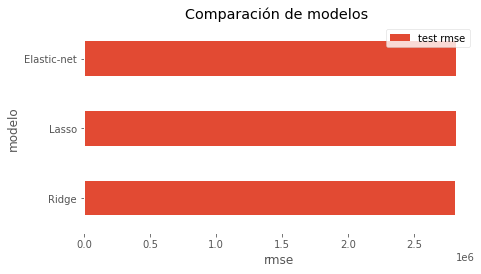

In [178]:
# Comparamos los modelos de Regresión Lineal el RMSE
df_comparacion = pd.DataFrame({
                    #'modelo': ['LinealMC', 'Ridge', 'Lasso', 'Elastic-net'],
                     'modelo': ['Ridge', 'Lasso', 'Elastic-net'],
                    #'test rmse': [rmse_linealmc, rmse_ridge, rmse_lasso, rmse_elastic]
                    'test rmse': [rmse_ridge, rmse_lasso, rmse_elastic]
                 })

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos ')


In [179]:
# Coeficientes de los distintos modelos con parámetros por omisión
# ==============================================================================
d = [#["Lineal", np.count_nonzero(np.abs(linealmc['REGL'].coef_.flatten()) > 0.5)],
     ["Ridge", np.count_nonzero(np.abs(regrRidge['REGL'].coef_.flatten()) > 0.5)],
     ["Lasso", np.count_nonzero(np.abs(regrLasso['REGL'].coef_.flatten()) > 0.5)],
     ["Elastic Net", np.count_nonzero(np.abs(regrElastic['REGL'].coef_.flatten()) > 0.5)]]

df = pd.DataFrame(d, columns = ['Modelo','Núm. predictores'])
df

Modelo  Núm. predictores
0        Ridge                74
1        Lasso                70
2  Elastic Net                74

Comparando los modelos de regresion lineal Ridge, Lasso y Elastic net podemos ver que su error es practicamente es mismo aunque lasso tenga menos predictores.

# Reducción de la dimensionalidad del problema

¿Es posible reducir la dimensionalidad del problema?

La reducción de la dimensionalidad se refiere al proceso de reducir el número de variables en un conjunto de datos, manteniendo al mismo tiempo la mayor cantidad posible de información relevante.

Hay varias técnicas para reducir la dimensionalidad de un problema, entre las que se incluyen:

- **Selección de características**: La primera opción es seleccionar las caracteristicas más relevantes en el problema, es decir las más correladas (>70) con la variable y que es nuestra variable objetivo, como podrian ser las variables de temperatura.
- **Extracción de características**: Este seria el enfoque contrario al anterior en la que se deben descartar las variables menos significativas con la variable salida. En nuestro caso, esto ya se ha realizado durante la fase del EDA en la que habia una variable 'extraña'. Pero tambien podriamos eliminar aquellas con una correlación muy debil o debil dependiendo del caso, como podria ser dswrf_s1_1 con una correlación de 0,1.
- **Agrupamiento de variables**: Agrupar variables altamente correlacionadas en grupos más amplios puede ser tambien una opción interesante que además de reducir la dimensionalidad del problema, nos facilita la interpretación del modelo. Por ejemplo poner las cinco tomas de la misma variable como una sola variable siempre que se comporten de la misma manera (es decir sean constantes durante el dia) como podria ser pwat_eatm (ver distribuciones en el EDA).

Pero antes de realizar cualquier reducción de dimensionalidad es importante tener en cuenta que puede llevar a una pérdida de información y una menor precisión del modelo.

# Métodos avanzados

## SVMs

### SVM lineal

#### Evaluación del modelo con sus hiperparámetros por omisión

In [108]:
# Creación del modelo SVM lineal
# ==============================================================================

# Creamos un pipeline para escalar los datos con el modelo
scaler = StandardScaler()
svr = SVR(kernel = 'linear')

svm_lineal = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

# Reproducibilidad
np.random.seed(10)

# Validación cruzada
inicio_svm_lineal = time.time()
svm_lineal_validated= cross_validate(svm_lineal, X_train, y_train, cv=ps, scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"])
fin_svm_lineal = time.time()

# Errores
rmse_svm_lineal = -svm_lineal_validated["test_neg_root_mean_squared_error"]
mae_svm_lineal = -svm_lineal_validated["test_neg_mean_absolute_error"]
print("RMSE de svm lineal con los parametros por omisión : ", -svm_lineal_validated["test_neg_root_mean_squared_error"])
print("MAE de svm lineal  con los parametros por omisión: ", -svm_lineal_validated["test_neg_mean_absolute_error"])

# Tiempo de ejecución
run_time_svm_lineal = fin_svm_lineal - inicio_svm_lineal
print('El metodo svm lineal  con los parametros por omisión ha tardado:', run_time_svm_lineal, 'segundos')

RMSE de svm lineal con los parametros por omisión :  [7562110.92028072]
MAE de svm lineal  con los parametros por omisión:  [6589538.18244566]
El metodo svm lineal  con los parametros por omisión ha tardado: 0.7756400108337402 segundos


#### Ajuste de los hiperparametros del modelo

##### Gridsearch

In [109]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'SVM__C': [0.1, 1, 10, 100],
              'SVM__gamma': [0.01, 0.1, 1]}

# Creamos un pipeline para escalar los datos con el modelo
scaler = StandardScaler()
svr = SVR(kernel= 'linear')
pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

# Validación cruzada
svm_lineal_grid = GridSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_root_mean_squared_error',
                        cv=ps, 
                        n_jobs=-1, verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste
inicio_svm_lineal_grid = time.time()
svm_lineal_grid.fit(X=X_train, y=y_train)
fin_svm_lineal_grid = time.time()

# Error 
rmse_svm_lineal_grid = -svm_lineal_grid.best_score_
print("RMSE de SVM lineal ajustado con gridsearch: ", rmse_svm_lineal_grid)

# Tiempo de ejecución
run_time_svm_lineal_grid = fin_svm_lineal_grid-inicio_svm_lineal_grid
print('El metodo de SVM lineal con gridsearch ha tardado, RMSE:', run_time_knn_grid, 'segundos')



Fitting 1 folds for each of 12 candidates, totalling 12 fits
RMSE de SVM lineal ajustado con gridsearch:  4636353.46206261
El metodo de SVM lineal con gridsearch ha tardado, RMSE: 8.115383863449097 segundos


In [110]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================

svm_lineal_grid = GridSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_mean_absolute_error',
                        cv=ps, 
                        n_jobs=-1, verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste
inicio_svm_lineal_grid = time.time()
svm_lineal_grid.fit(X=X_train, y=y_train)
fin_svm_lineal_grid = time.time()

# Error 
mae_svm_lineal_grid = -svm_lineal_grid.best_score_
print("MAE de SVM lineal ajustado con gridsearch: ", -svm_lineal_grid.best_score_)

# Tiempo de ejecución
mae_run_time_svm_lineal_grid = fin_svm_lineal_grid-inicio_svm_lineal_grid
print('El metodo de SVM lineal con gridsearch ha tardado, MAE:', mae_run_time_knn_grid, 'segundos')

Fitting 1 folds for each of 12 candidates, totalling 12 fits
MAE de SVM lineal ajustado con gridsearch:  3738997.455057147
El metodo de SVM lineal con gridsearch ha tardado, MAE: 2.5632340908050537 segundos


##### Randomized Seach

In [111]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'SVM__C': [0.1, 1, 10, 100],
              'SVM__gamma': [0.01, 0.1, 1]}

# This is the preprocessing pipeline: SVMs need scaling
scaler = StandardScaler()
svr = SVR(kernel= 'linear')

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

# Hacemos la validación cruzada
svm_lineal_random = RandomizedSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_root_mean_squared_error',
                        cv=ps, 
                        n_jobs=-1, verbose=1,
                        n_iter=100)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste
inicio_svm_lineal_random = time.time()
svm_lineal_random.fit(X=X_train, y=y_train)
fin_svm_lineal_random = time.time()

# Error
rmse_svm_lineal_random = -svm_lineal_random.best_score_
print("RMSE de SVM lineal ajustado con randomSearch: ", svm_lineal_random)

# Tiempo de ejecución
run_time_svm_lineal_random = fin_svm_lineal_random-inicio_svm_lineal_random
print('El metodo de SVM lineal con randomSearch ha tardado, RMSE:', run_time_svm_lineal_random, 'segundos')



Fitting 1 folds for each of 12 candidates, totalling 12 fits
RMSE de SVM lineal ajustado con randomSearch:  RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
                   estimator=Pipeline(steps=[('scale', StandardScaler()),
                                             ('SVM', SVR(kernel='linear'))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'SVM__C': [0.1, 1, 10, 100],
                                        'SVM__gamma': [0.01, 0.1, 1]},
                   scoring='neg_root_mean_squared_error', verbose=1)
El metodo de SVM lineal con randomSearch ha tardado, RMSE: 4.0920729637146 segundos


In [112]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================

svm_lineal_random = RandomizedSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_mean_absolute_error',
                        cv=ps, 
                        n_jobs=-1, verbose=1,
                        n_iter=100)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste
inicio_svm_lineal_random = time.time()
svm_lineal_random.fit(X=X_train, y=y_train)
fin_svm_lineal_random = time.time()

# Error
mae_svm_lineal_random = -svm_lineal_random.best_score_
print("MAE de SVM lineal ajustado con randomSearch: ", -svm_lineal_random.best_score_)

# Tiempo de ejecución
mae_run_time_svm_lineal_random = fin_svm_lineal_random-inicio_svm_lineal_random
print('El metodo de SVM lineal con randomSearch ha tardado, MAE:', run_time_svm_lineal_random, 'segundos')


Fitting 1 folds for each of 12 candidates, totalling 12 fits
MAE de SVM lineal ajustado con randomSearch:  3738997.455057147
El metodo de SVM lineal con randomSearch ha tardado, MAE: 4.0920729637146 segundos


##### Optimización bayesiana

In [113]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'SVM__C': [0.1, 1, 10, 100],
              'SVM__gamma': [0.01, 0.1, 1]}

# Creamos un pipeline para escalar los datos con el modelo
scaler = StandardScaler()
svr = SVR(kernel= 'linear')

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

# Hacemos la validación cruzada
svm_lineal_bayes = BayesSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_root_mean_squared_error',
                        cv=ps, 
                        n_jobs=-1, verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste
inicio_svm_lineal_bayes = time.time()
svm_lineal_bayes.fit(X=X_train, y=y_train)
fin_svm_lineal_bayes = time.time()

# Error
rmse_svm_lineal_bayes = -svm_lineal_bayes.best_score_
print("RMSE de SVM lineal con bayesSearch: ", -svm_lineal_bayes.best_score_)

# Tiempo de ejecución
run_time_svm_lineal_bayes = fin_svm_lineal_bayes-inicio_svm_lineal_bayes
print('El metodo de SVM lineal con bayesSearch ha tardado, RMSE:', run_time_svm_lineal_bayes, 'segundos')



Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fi

In [114]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================

svm_lineal_bayes = BayesSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_mean_absolute_error',
                        cv=ps, 
                        n_jobs=-1, verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste
inicio_svm_lineal_bayes = time.time()
svm_lineal_bayes.fit(X=X_train, y=y_train)
fin_svm_lineal_bayes = time.time()

# Error
mae_svm_lineal_bayes = -svm_lineal_bayes.best_score_
print("MAE de SVM lineal con bayesSearch: ", -svm_lineal_bayes.best_score_)

# Tiempo de ejecución
mae_run_time_svm_lineal_bayes = fin_svm_lineal_bayes-inicio_svm_lineal_bayes
print('El metodo de SVM lineal con bayesSearch ha tardado, MAE:', run_time_svm_lineal_bayes, 'segundos')

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fi

### SVM radial

#### Evaluación del modelo con sus hiperparámetros por omisión

In [115]:
# Creación del modelo SVM radial
# ==============================================================================

# Creamos un pipeline para escalar los datos con el modelo
scaler = StandardScaler()
svr = SVR(kernel = 'rbf')

svm_radial = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_svm_radial = time.time()
svm_radial_validated = cross_validate(svm_radial, X_train, y_train, cv=ps, scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"])
fin_svm_radial = time.time()

# Errores
rmse_svm_radial = -svm_radial_validated["test_neg_root_mean_squared_error"]
print("RMSE de svm radial con los parametros por omisión : ", rmse_svm_radial)
mae_svm_radial = -svm_radial_validated["test_neg_mean_absolute_error"]
print("MAE de svm radial  con los parametros por omisión: ", mae_svm_radial)

# Tiempo de ejecución
run_time_svm_radial = fin_svm_radial - inicio_svm_radial
print('El metodo svm radial  con los parametros por omisión ha tardado:', run_time_svm_radial, 'segundos')

RMSE de svm radial con los parametros por omisión :  [7627920.84964465]
MAE de svm radial  con los parametros por omisión:  [6651347.61630187]
El metodo svm radial  con los parametros por omisión ha tardado: 1.5416829586029053 segundos


#### Ajuste de los hiperparámetros del modelo

##### Gridsearch

In [116]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'SVM__C': [0.1, 1, 10, 100],
              'SVM__gamma': [0.01, 0.1, 1]}

# Creamos un pipeline para escalar los datos con el modelo
scaler = StandardScaler()
svr = SVR(kernel= "rbf")

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

# Hacemos la validación cruzada para la busqueda de hiperparámetros
svm_radial_grid = GridSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_root_mean_squared_error',
                        cv=ps, 
                        n_jobs=-1, 
                        verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_svm_radial_grid = time.time()
svm_radial_grid.fit(X=X_train, y=y_train)
fin_svm_radial_grid = time.time()

# Error 
rmse_svm_radial_grid = -svm_radial_grid.best_score_
print("RMSE de SVM radial ajustado con gridsearch: ", -svm_radial_grid.best_score_)

# Tiempo de ejecución
run_time_svm_radial_grid = fin_svm_radial_grid-inicio_svm_radial_grid
print('El metodo de SVM radial con gridsearch ha tardado, RMSE:', run_time_svm_radial_grid, 'segundos')


Fitting 1 folds for each of 12 candidates, totalling 12 fits
RMSE de SVM radial ajustado con gridsearch:  7595304.122320808
El metodo de SVM radial con gridsearch ha tardado, RMSE: 6.577136039733887 segundos


In [117]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================

svm_radial_grid = GridSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_mean_absolute_error',
                        cv=ps, 
                        n_jobs=-1, 
                        verbose=1)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_svm_radial_grid = time.time()
svm_radial_grid.fit(X=X_train, y=y_train)
fin_svm_radial_grid = time.time()

# Error 
mae_svm_radial_grid = -svm_radial_grid.best_score_
print("MAE de SVM radial ajustado con gridsearch: ", -svm_radial_grid.best_score_)

# Tiempo de ejecución
mae_run_time_svm_radial_grid = fin_svm_radial_grid-inicio_svm_radial_grid
print('El metodo de SVM radial con gridsearch ha tardado, MAE:', run_time_svm_radial_grid, 'segundos')


Fitting 1 folds for each of 12 candidates, totalling 12 fits
MAE de SVM radial ajustado con gridsearch:  6619251.297414741
El metodo de SVM radial con gridsearch ha tardado, MAE: 6.577136039733887 segundos


##### Randomized Search

In [118]:
# Creamos un pipeline para escalar los datos con el modelo
scaler = StandardScaler()
svr = SVR()

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'SVM__C': loguniform(1e-1, 1e4),
              'SVM__gamma': loguniform(1e-4, 1e0)}

# Hacemos la validación cruzada
budget = 100
svm_radial_random = RandomizedSearchCV(pipe_regr, 
                            param_grid,
                            scoring='neg_root_mean_squared_error',
                            cv=ps, 
                            n_jobs=-1, verbose=1,
                            n_iter=budget
                        )

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_svm_radial_random = time.time()
svm_radial_random.fit(X=X_train, y=y_train)
fin_svm_radial_random = time.time()

# Error
rmse_svm_radial_random = -svm_radial_random.best_score_
print("RMSE de SVM radial ajustado con randomSearch: ", rmse_svm_radial_random)

# Tiempo de ejecución
run_time_svm_radial_random = fin_svm_radial_random-inicio_svm_radial_random
print('El metodo de SVM radial con randomSearch ha tardado, RMSE:', run_time_svm_radial_random, 'segundos')


Fitting 1 folds for each of 100 candidates, totalling 100 fits
RMSE de SVM radial ajustado con randomSearch:  5687463.592399119
El metodo de SVM radial con randomSearch ha tardado, RMSE: 37.712982177734375 segundos


In [119]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================

# Train the self-adjusting process
budget = 100
svm_radial_random = RandomizedSearchCV(pipe_regr, 
                            param_grid,
                            scoring='neg_mean_absolute_error',
                            cv=ps, 
                            n_jobs=-1, verbose=1,
                            n_iter=budget
                        )

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_svm_radial_random = time.time()
svm_radial_random.fit(X=X_train, y=y_train)
fin_svm_radial_random = time.time()

# Error
mae_svm_radial_random = -svm_radial_random.best_score_
print("MAE de SVM radial ajustado con randomSearch: ", -svm_radial_random.best_score_)

# Tiempo de ejecución
mae_run_time_svm_radial_random = fin_svm_radial_random-inicio_svm_radial_random
print('El metodo de SVM radial con randomSearch ha tardado, MAE:', run_time_svm_radial_random, 'segundos')

Fitting 1 folds for each of 100 candidates, totalling 100 fits
MAE de SVM radial ajustado con randomSearch:  4712411.471085799
El metodo de SVM radial con randomSearch ha tardado, MAE: 37.712982177734375 segundos


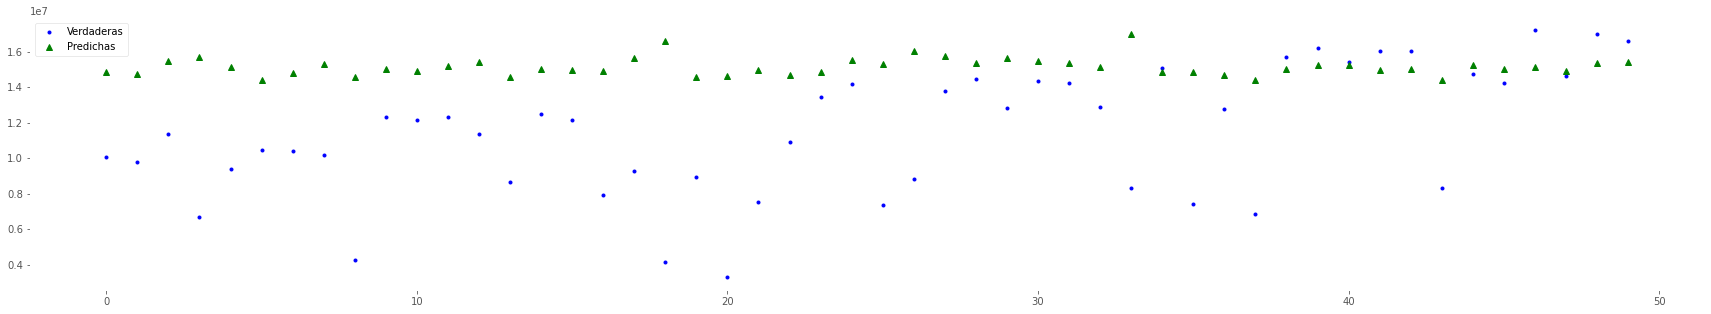

In [120]:
pintaResultados(svm_radial_random,50)

##### Optimización Bayesiana

In [121]:
# Creamos un pipeline para escalar los datos con el modelo
scaler = StandardScaler()
svr = SVR()

pipe_regr = Pipeline([
    ('scale', scaler),
    ('SVM', svr)])

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'SVM__C': Real(1e-1, 1e4, prior="log-uniform"),
              'SVM__gamma': Real(1e-4, 1e0, prior="log-uniform")}

# Hacemos la validación cruzada
budget = 100
svm_radial_bayes = BayesSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_root_mean_squared_error',
                        cv=ps, 
                        n_jobs=-1, verbose=0,
                        n_iter=budget
                        )

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_svm_radial_bayes = time.time()
svm_radial_bayes.fit(X=X_train, y=y_train)
fin_svm_radial_bayes = time.time()

# Error
rmse_svm_radial_bayes = -svm_radial_bayes.best_score_
print("RMSE de SVM radial con bayesSearch: ", rmse_svm_radial_bayes)

# Tiempo de ejecución
run_time_svm_radial_bayes = fin_svm_radial_bayes-inicio_svm_radial_bayes
print('El metodo de SVM radial con bayesSearch ha tardado, RMSE:', run_time_svm_radial_bayes, 'segundos')


RMSE de SVM radial con bayesSearch:  5499718.10442758
El metodo de SVM radial con bayesSearch ha tardado, RMSE: 660.1488456726074 segundos


In [122]:
budget = 100
svm_radial_bayes = BayesSearchCV(pipe_regr, 
                        param_grid,
                        scoring='neg_mean_absolute_error',
                        cv=ps, 
                        n_jobs=-1, verbose=0,
                        n_iter=budget
                        )
np.random.seed(10)  # Reproducibilidad
inicio_svm_radial_bayes = time.time()
svm_radial_bayes.fit(X=X_train, y=y_train)
fin_svm_radial_bayes = time.time()

# Error
mae_svm_radial_bayes = -svm_radial_bayes.best_score_
print("MAE de SVM radial con bayesSearch: ", -svm_radial_bayes.best_score_)

# Tiempo de ejecución
mae_run_time_svm_radial_bayes = fin_svm_radial_bayes-inicio_svm_radial_bayes
print('El metodo de SVM radial con bayesSearch ha tardado, MAE:', run_time_svm_radial_bayes, 'segundos')



MAE de SVM radial con bayesSearch:  4500600.460230177
El metodo de SVM radial con bayesSearch ha tardado, MAE: 660.1488456726074 segundos


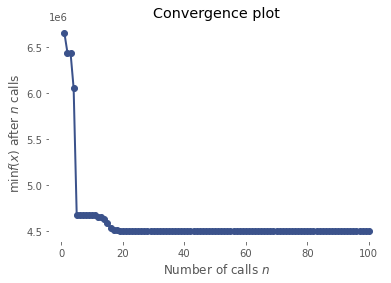

In [123]:
# Comprobamos si la optimización ha convergido
_ = plot_convergence(svm_radial_bayes.optimizer_results_[0])
plt.show()

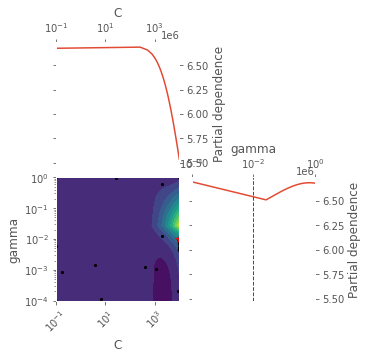

In [124]:
_ = plot_objective(svm_radial_bayes.optimizer_results_[0],
                   dimensions=['C', 'gamma'],
                   n_minimum_search=int(1e8))
plt.show()

## Random Forests

### Evaluación del modelo con sus hiperparámetros por omisión

In [125]:
# Creación del modelo
# ==============================================================================
rforest = RandomForestRegressor(
            n_estimators = 10,
            max_depth    = None,
            max_features = 1.0,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 10
         )
# Creamos un pipeline para escalar los datos con el modelo
scaler = StandardScaler()
pipe_rf = Pipeline([
    ('scale', scaler),
    ('RF', rforest)])

# Reproducibilidad
np.random.seed(10) 

# Entrenamiento del modelo
# ==============================================================================
inicio_rforest = time.time()
rforest_validated= cross_validate(pipe_rf, X_train, y_train, cv=ps, scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"])
fin_rforest = time.time()

# Errores
rmse_rforest = -rforest_validated["test_neg_root_mean_squared_error"]
mae_rforest = -rforest_validated["test_neg_mean_absolute_error"]
print("RMSE de Random Forest por defecto : ", -rforest_validated["test_neg_root_mean_squared_error"])
print("MAE de Random Forest por defecto : ", -rforest_validated["test_neg_mean_absolute_error"])

# Tiempo de ejecución
run_time_rforest = fin_rforest-inicio_rforest
print('El metodo Random Forest ha tardado:', run_time_rforest, 'segundos')


RMSE de Random Forest por defecto :  [3031433.87394956]
MAE de Random Forest por defecto :  [2116038.23835616]
El metodo Random Forest ha tardado: 0.7403478622436523 segundos


### Optimización de parámetros

#### Numero de arboles 'n_estimators'

Valor óptimo de n_estimators: 141


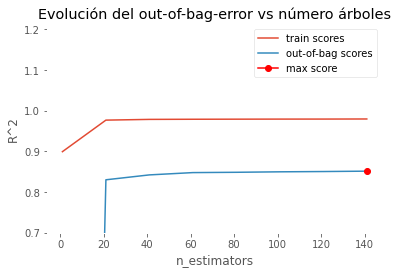

In [171]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 20)

# Reproducibilidad
np.random.seed(10) 

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                max_depth    = None,
                max_features = 1.0,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 10
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
ax.set_ylim([0.7,None])
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

#### Máximo número de predictores 'max_features'

Valor óptimo de max_features: 5


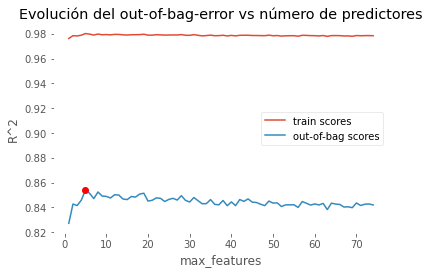

In [172]:
# Validación empleando el Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Reproducibilidad
np.random.seed(10) 

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de Out-of-Bag.
for max_features in max_features_range:
    modelo = RandomForestRegressor(
                n_estimators = 40,
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 10
             )
    modelo.fit(X_train, y_train)
    train_scores.append(modelo.score(X_train, y_train))
    oob_scores.append(modelo.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolución del out-of-bag-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmax(oob_scores)]}")

### Ajuste de los hiperparámetros

##### Randomized Search

In [128]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'n_estimators': sp_randint(10,200),
              'max_features': sp_randint(1,X.shape[1])}

budget = 100

# Hacemos la validación cruzada para la busqueda de hiperparámetros
rforest_random = RandomizedSearchCV(RandomForestRegressor(), 
                         param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=ps,
                         refit=True,
                         n_jobs=-1, verbose=1,
                         n_iter=budget
                        )


np.random.seed(10)  # Reproducibilidad

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_rforest_random = time.time()
rforest_random.fit(X=X_train, y=y_train)
fin_rforest_random = time.time()

# Error
rmse_rforest_random = -knn_random.best_score_
print("RMSE de Random Forest ajustado con randomSearch: ", rmse_rforest_random)

# Tiempo de ejecución
run_time_rforest_random = fin_rforest_random-inicio_rforest_random
print('El metodo de Random Forest con randomSearch ha tardado, RMSE:', run_time_rforest_random, 'segundos')



Fitting 1 folds for each of 100 candidates, totalling 100 fits
RMSE de Random Forest ajustado con randomSearch:  2938773.943149911
El metodo de Random Forest con randomSearch ha tardado, RMSE: 149.61221766471863 segundos


In [129]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================

# Validación cruzada
budget = 100
rforest_random = RandomizedSearchCV(RandomForestRegressor(), 
                         param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=ps,
                         refit=True,
                         n_jobs=-1, verbose=1,
                         n_iter=budget
                        )

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_rforest_random = time.time()
rforest_random.fit(X=X_train, y=y_train)
fin_rforest_random = time.time()

# Error
mae_rforest_random = -rforest_random.best_score_
print("MAE de Random Forest ajustado con randomSearch: ", rmse_rforest_random)

# Tiempo de ejecución
mae_run_time_rforest_random = fin_rforest_random-inicio_rforest_random
print('El metodo de Random Forest con randomSearch ha tardado, MAE:', mae_run_time_rforest_random, 'segundos')


Fitting 1 folds for each of 100 candidates, totalling 100 fits
MAE de Random Forest ajustado con randomSearch:  2938773.943149911
El metodo de Random Forest con randomSearch ha tardado, MAE: 143.20459008216858 segundos


In [130]:
rforest_random.best_params_, -rforest_random.best_score_

({'max_features': 5, 'n_estimators': 104}, 2683038.097128613)

##### Importancia por pureza

In [131]:
importancia_predictores = pd.DataFrame(
                            {'predictor': feat_names,
                             'importancia': rforest_random.best_estimator_.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


predictor  importancia
14  dswrf_s5_1     0.094461
13  dswrf_s4_1     0.086733
12  dswrf_s3_1     0.069270
73  uswrf_s5_1     0.050061
64  ulwrf_s5_1     0.044742
72  uswrf_s4_1     0.042452
11  dswrf_s2_1     0.041556
71  uswrf_s3_1     0.039487
59  tmp_sfc5_1     0.039257
58  tmp_sfc4_1     0.038581
57  tmp_sfc3_1     0.036093
63  ulwrf_s4_1     0.031779
70  uswrf_s2_1     0.025893
43  tmax_2m4_1     0.021182
69  ulwrf_t5_1     0.018970
56  tmp_sfc2_1     0.017440
67  ulwrf_t3_1     0.017202
62  ulwrf_s3_1     0.016590
49  tmin_2m5_1     0.015432
44  tmax_2m5_1     0.014885
54  tmp_2m_5_1     0.012357
40  tmax_2m1_1     0.012266
53  tmp_2m_4_1     0.011049
68  ulwrf_t4_1     0.011007
42  tmax_2m3_1     0.010876
48  tmin_2m4_1     0.007437
38  tcolc_e4_1     0.006070
65  ulwrf_t1_1     0.005849
8   dlwrf_s4_1     0.005642
9   dlwrf_s5_1     0.005558
46  tmin_2m2_1     0.005427
3   apcp_sf4_1     0.005375
45  tmin_2m1_1     0.005007
36  tcolc_e2_1     0.004957
37  tcolc_e3_1     0.004921
55  tmp_sfc1_1     0.004910
4   apcp_sf5_1     0.004555
2   apcp_sf3_1     0.004456
31  tcdc_ea2_1     0.004270
32  tcdc_ea3_1     0.004240
24  pwat_ea5_1     0.004134
25  spfh_2m1_1     0.004085
66  ulwrf_t2_1     0.003975
21  pwat_ea2_1     0.003909
22  pwat_ea3_1     0.003873
33  tcdc_ea4_1     0.003831
39  tcolc_e5_1     0.003722
23  pwat_ea4_1     0.003620
30  tcdc_ea1_1     0.003589
6   dlwrf_s2_1     0.003579
34  tcdc_ea5_1     0.003446
7   dlwrf_s3_1     0.003416
61  ulwrf_s2_1     0.003322
20  pwat_ea1_1     0.003314
29  spfh_2m5_1     0.003244
52  tmp_2m_3_1     0.003091
35  tcolc_e1_1     0.003083
28  spfh_2m4_1     0.002993
50  tmp_2m_1_1     0.002991
41  tmax_2m2_1     0.002964
60  ulwrf_s1_1     0.002921
1   apcp_sf2_1     0.002801
27  spfh_2m3_1     0.002745
5   dlwrf_s1_1     0.002716
51  tmp_2m_2_1     0.002593
26  spfh_2m2_1     0.002389
15  pres_ms1_1     0.002367
16  pres_ms2_1     0.002261
18  pres_ms4_1     0.002256
19  pres_ms5_1     0.002140
47  tmin_2m3_1     0.002134
17  pres_ms3_1     0.002108
0   apcp_sf1_1     0.001998
10  dswrf_s1_1     0.000095

Podemos observas que las variables con mayor importancia se encuentran al principio, mientras que las menos importantes estan al final. Esto está en linea con la correlación realizada en el EDA en el paso 8, ya que en ambas la más importante es la variable dswrf_s5_1 y la que menos es dswrf_s1_1

##### Importancia por permutacion

In [132]:
importancia = permutation_importance(
                estimator    = rforest_random.best_estimator_,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 10
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
# df_importancia['feature'] = X_train.columns
df_importancia['feature'] = feat_names
df_importancia.sort_values('importances_mean', ascending=False)

importances_mean  importances_std     feature
14     759543.510367     15366.816285  dswrf_s5_1
13     634294.240471     10401.267109  dswrf_s4_1
12     608742.820145      7176.085734  dswrf_s3_1
73     507938.104264     14970.595540  uswrf_s5_1
59     423835.265663      7889.038337  tmp_sfc5_1
72     423831.549999      8252.341100  uswrf_s4_1
71     377913.701065      8232.277524  uswrf_s3_1
11     377539.431460      8854.350278  dswrf_s2_1
70     320397.651444      4447.889495  uswrf_s2_1
64     320122.761209      6727.061764  ulwrf_s5_1
58     300122.655645      7117.752791  tmp_sfc4_1
69     208806.010247      3769.551291  ulwrf_t5_1
57     203945.583576      5711.795311  tmp_sfc3_1
63     199320.590127      1532.123076  ulwrf_s4_1
54     197150.536659      6124.433841  tmp_2m_5_1
68     186027.720200      6347.253328  ulwrf_t4_1
49     166817.106948      2360.384466  tmin_2m5_1
43     165167.614072      3462.306899  tmax_2m4_1
53     154654.548250      3348.694360  tmp_2m_4_1
56     148224.706761      2840.055779  tmp_sfc2_1
36     138830.822614      4619.093936  tcolc_e2_1
38     134861.848173      3710.937946  tcolc_e4_1
67     130923.944889      1977.298432  ulwrf_t3_1
22     130709.935854      5018.133556  pwat_ea3_1
42     128351.375020      1634.845381  tmax_2m3_1
24     127163.527858      3443.956688  pwat_ea5_1
44     120587.438267      2623.266047  tmax_2m5_1
21     118030.314043      2648.683236  pwat_ea2_1
2      116683.973315      3667.587597  apcp_sf3_1
23     116276.388580      1750.722903  pwat_ea4_1
62     112425.209162      1589.079629  ulwrf_s3_1
37     101190.593578       994.157169  tcolc_e3_1
31     101181.695872      3109.759741  tcdc_ea2_1
39     100561.246629      2286.680138  tcolc_e5_1
4       97957.708600      1849.047781  apcp_sf5_1
34      96363.387615      1885.476909  tcdc_ea5_1
20      96191.117339      2083.455577  pwat_ea1_1
48      95837.102910      1238.981803  tmin_2m4_1
29      92964.957454      1839.178825  spfh_2m5_1
33      91509.047756      3367.642997  tcdc_ea4_1
3       90178.871245      1655.261567  apcp_sf4_1
32      88681.679655      2220.729276  tcdc_ea3_1
9       87963.105211      1907.031862  dlwrf_s5_1
30      87377.901806      2280.477197  tcdc_ea1_1
66      85855.152746       482.131852  ulwrf_t2_1
6       85805.811853      1825.310323  dlwrf_s2_1
40      84173.863679      1713.605735  tmax_2m1_1
35      82702.153064      1132.866063  tcolc_e1_1
8       81615.586748      2034.754661  dlwrf_s4_1
61      80882.442953      2141.721822  ulwrf_s2_1
7       80294.781718      1928.749130  dlwrf_s3_1
1       79293.216218      1134.463626  apcp_sf2_1
27      78675.267617      1768.414188  spfh_2m3_1
41      77383.463998      1560.902014  tmax_2m2_1
28      77249.953342      1967.220323  spfh_2m4_1
52      75263.845343       968.832325  tmp_2m_3_1
5       73545.584644      1511.633158  dlwrf_s1_1
26      69976.166870      1602.909681  spfh_2m2_1
51      69011.668236      1261.096781  tmp_2m_2_1
46      67966.845673      1287.766828  tmin_2m2_1
65      67106.831062       690.796728  ulwrf_t1_1
55      65583.354298      1703.883906  tmp_sfc1_1
25      60270.619561      2220.010020  spfh_2m1_1
50      60128.245163      2146.077758  tmp_2m_1_1
45      58474.993836      2147.047664  tmin_2m1_1
60      58212.198901      2575.343118  ulwrf_s1_1
18      54857.747796      2233.271086  pres_ms4_1
19      53163.700087      2917.099211  pres_ms5_1
15      51386.134393      3201.077137  pres_ms1_1
16      51043.730335      3173.378042  pres_ms2_1
17      50880.529299      1143.653876  pres_ms3_1
47      48114.297002      2637.825741  tmin_2m3_1
0       47132.492732      1086.626343  apcp_sf1_1
10       1006.688575        92.910777  dswrf_s1_1

Al igual que en el apartado anterior, podemos observar que ocurre lo mismo.

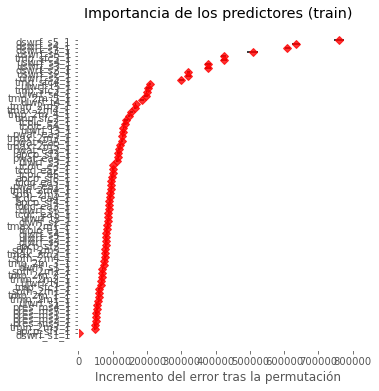

In [133]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

##### Extremely randomized tree 

In [134]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'n_estimators': sp_randint(10,200),
              'max_features': sp_randint(1,X.shape[1])}

# Hacemos la validación cruzada
budget = 100
rforest_extra = RandomizedSearchCV(ExtraTreesRegressor(), 
                         param_grid,
                         scoring='neg_root_mean_squared_error',
                         refit=True,
                         cv=ps, 
                         n_jobs=-1, verbose=1,
                         n_iter=budget
                        )

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_rforest_extra = time.time()
rforest_extra.fit(X=X_train, y=y_train)
fin_rforest_extra = time.time()

# Predicciones
y_test_pred = rforest_extra.predict(X_test)

# Error
rmse_rforest_extra = -rforest_extra.best_score_
print("RMSE de ExtremelyRandomizedTree ajustado con randomSearch: ", rmse_rforest_extra)

# Tiempo de ejecución
run_time_rforest_extra = fin_rforest_extra-inicio_rforest_extra
print('El metodo de ExtremelyRandomizedTree con randomSearch ha tardado, RMSE:', run_time_rforest_extra, 'segundos')

Fitting 1 folds for each of 100 candidates, totalling 100 fits
RMSE de ExtremelyRandomizedTree ajustado con randomSearch:  2632373.243907486
El metodo de ExtremelyRandomizedTree con randomSearch ha tardado, RMSE: 56.95023274421692 segundos


In [135]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'n_estimators': sp_randint(10,200),
              'max_features': sp_randint(1,X.shape[1])}

# Hacemos la validación cruzada
budget = 100
rforest_extra = RandomizedSearchCV(ExtraTreesRegressor(), 
                         param_grid,
                         scoring='neg_mean_absolute_error',
                         refit=True,
                         cv=ps, 
                         n_jobs=-1, verbose=1,
                         n_iter=budget
                        )

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_rforest_extra = time.time()
rforest_extra.fit(X=X_train, y=y_train)
fin_rforest_extra = time.time()

# Predicciones
y_test_pred = rforest_extra.predict(X_test)

# Error
mae_rforest_extra = -rforest_extra.best_score_
print("MAE de ExtremelyRandomizedTree ajustado con randomSearch: ", mae_rforest_extra)

# Tiempo de ejecución
mae_run_time_rforest_extra = fin_rforest_extra-inicio_rforest_extra
print('El metodo de ExtremelyRandomizedTree con randomSearch ha tardado, MAE:', mae_run_time_rforest_extra, 'segundos')

Fitting 1 folds for each of 100 candidates, totalling 100 fits
MAE de ExtremelyRandomizedTree ajustado con randomSearch:  1849947.635844749
El metodo de ExtremelyRandomizedTree con randomSearch ha tardado, MAE: 55.19372200965881 segundos


RMSE de RF con búsqueda de hiperparámetros: 2646297.6722306604


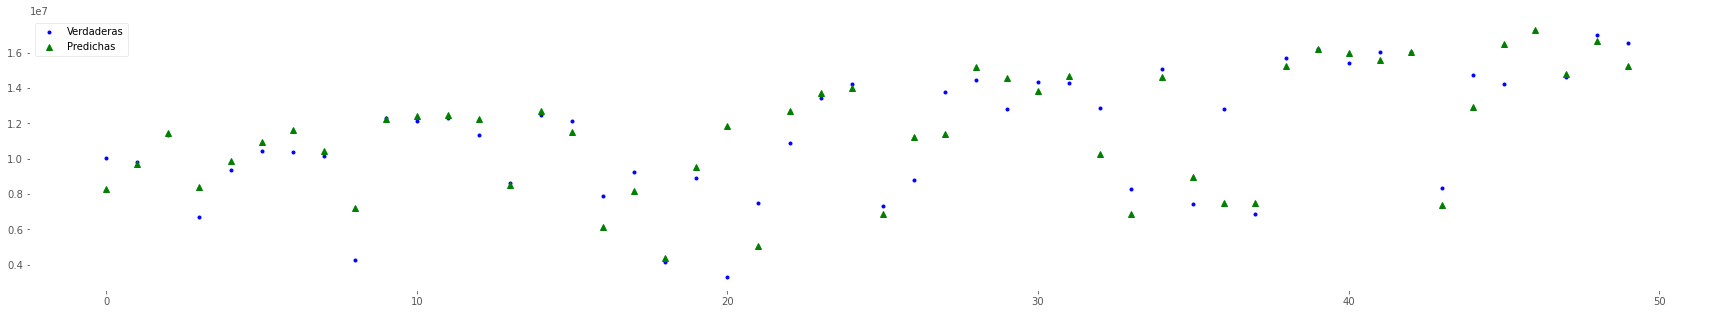

In [136]:
print(f"RMSE de RF con búsqueda de hiperparámetros: {rmse(y_test, rforest_extra.predict(X=X_test))}")
pintaResultados(rforest_extra,50)

In [137]:
rforest_extra.best_params_, -rforest_extra.best_score_

({'max_features': 16, 'n_estimators': 144}, 1849947.635844749)

## HistGradientBoostingRegressor

### Evaluación del modelo con sus hiperparámetros por omisión

In [138]:
# Creación del modelo
# ==============================================================================
regr_gb = HistGradientBoostingRegressor(
            random_state = 10
         )

# Entrenamiento del modelo
# ==============================================================================
np.random.seed(10)  # Reproducibilidad

inicio_gb = time.time()
gb_validated = cross_validate(regr_gb, X_train, y_train, cv=ps, scoring=["neg_mean_absolute_error", "neg_root_mean_squared_error"])
fin_gb = time.time()

# Errores
rmse_gb = -knn_validated["test_neg_root_mean_squared_error"]
mae_gb = -knn_validated["test_neg_mean_absolute_error"]
print("RMSE de Gradient Boosting con los parametros por omisión : ", -knn_validated["test_neg_root_mean_squared_error"])
print("MAE de Gradient Boosting con los parametros por omisión: ", -knn_validated["test_neg_mean_absolute_error"])

# Tiempo de ejecución
run_time_gb = fin_gb - inicio_gb
print('El metodo k-NN con los parametros por omisión ha tardado:', run_time_knn, 'segundos')

RMSE de Gradient Boosting con los parametros por omisión :  [3012505.16051533]
MAE de Gradient Boosting con los parametros por omisión:  [2141476.75068493]
El metodo k-NN con los parametros por omisión ha tardado: 0.06859898567199707 segundos


### Ajuste de los hiperparámetros del modelo

#### Random Search

In [139]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'max_depth'         : [None, 1, 3, 5, 10, 20],
              'learning_rate'     : [0.001, 0.01, 0.1, 0.2],
              'l2_regularization' : [0, 1],
              'max_leaf_nodes': [3, 10, 30]
             }

# Hacemos la validación cruzada 
budget = 100
regr = RandomizedSearchCV (estimator  = HistGradientBoostingRegressor(max_iter            = 1000,
                                                                      random_state        = 10,
                                                                      # Activación de la parada temprana
                                                                      validation_fraction = 0.1,
                                                                      n_iter_no_change    = 5,
                                                                      tol                 = 0.0001),
                           param_distributions = param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=ps,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           n_iter=budget,
                           return_train_score=True
                           )

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste
inicio_regr = time.time()
regr.fit(X=X_train, y=y_train)
fin_regr = time.time()

# Error
rmse_gb_random = -regr.best_score_
print("RMSE de HistGradientBoosting ajustado con randomSearch: ", rmse_gb_random)

# Tiempo de ejecución
run_time_gb_random = fin_regr-inicio_regr
print('El metodo de HistGradientBoosting con randomSearch ha tardado, RMSE:', run_time_gb_random, 'segundos')


Fitting 1 folds for each of 100 candidates, totalling 100 fits
RMSE de HistGradientBoosting ajustado con randomSearch:  2678875.30510434
El metodo de HistGradientBoosting con randomSearch ha tardado, RMSE: 110.1747100353241 segundos


In [140]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================

regr = RandomizedSearchCV (estimator  = HistGradientBoostingRegressor(max_iter            = 1000,
                                                                      random_state        = 10,
                                                                      # Activación de la parada temprana
                                                                      validation_fraction = 0.1,
                                                                      n_iter_no_change    = 5,
                                                                      tol                 = 0.0001),
                           param_distributions = param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=ps,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           n_iter=budget,
                           return_train_score=True
                           )

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste
inicio_regr = time.time()
regr.fit(X=X_train, y=y_train)
fin_regr = time.time()

# Error
mae_gb_random = -regr.best_score_
print("MAE de HistGradientBoosting ajustado con randomSearch: ", mae_gb_random)

# Tiempo de ejecución
mae_run_time_gb_random = fin_regr-inicio_regr
print('El metodo de HistGradientBoosting con randomSearch ha tardado, MAE:', mae_run_time_gb_random, 'segundos')

Fitting 1 folds for each of 100 candidates, totalling 100 fits
MAE de HistGradientBoosting ajustado con randomSearch:  1891709.2713720896
El metodo de HistGradientBoosting con randomSearch ha tardado, MAE: 162.85017609596252 segundos


In [141]:
# Resultados
# ==============================================================================
resultados = pd.DataFrame(regr.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

param_max_leaf_nodes param_max_depth param_learning_rate  \
11                   30              20                0.01   
89                   30               5                0.01   
47                   30            None                0.01   
40                   30              10                0.01   

   param_l2_regularization  mean_test_score  std_test_score  mean_train_score  \
11                       0    -1.891709e+06             0.0     -8.552396e+05   
89                       1    -1.893061e+06             0.0     -1.200100e+06   
47                       0    -1.897255e+06             0.0     -8.586821e+05   
40                       0    -1.897858e+06             0.0     -9.083603e+05   

    std_train_score  
11              0.0  
89              0.0  
47              0.0  
40              0.0

#### Importancia por permutación

In [142]:
importancia = permutation_importance(
                estimator    = regr,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 10
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )

df_importancia['feature'] = feat_names
df_importancia.sort_values('importances_mean', ascending=False)

importances_mean  importances_std     feature
14      1.510915e+06     20616.852483  dswrf_s5_1
13      1.022339e+06     16060.963019  dswrf_s4_1
12      8.458693e+05     12112.502956  dswrf_s3_1
70      7.211747e+05     12610.184810  uswrf_s2_1
59      4.058180e+05     10542.208112  tmp_sfc5_1
73      3.291677e+05     10963.323391  uswrf_s5_1
24      2.354271e+05     14001.561872  pwat_ea5_1
71      1.928527e+05      5550.041322  uswrf_s3_1
54      1.551287e+05      8332.763111  tmp_2m_5_1
39      1.405387e+05      9455.058042  tcolc_e5_1
69      1.332600e+05      5224.828611  ulwrf_t5_1
4       1.286716e+05      4745.386657  apcp_sf5_1
49      1.202625e+05      4001.678902  tmin_2m5_1
29      1.177543e+05      5564.889780  spfh_2m5_1
65      1.177167e+05      4391.551490  ulwrf_t1_1
2       1.112689e+05      6662.971773  apcp_sf3_1
68      1.043996e+05      3481.134149  ulwrf_t4_1
0       9.966556e+04      5084.942925  apcp_sf1_1
33      9.357276e+04      4370.932521  tcdc_ea4_1
72      9.140339e+04      2099.746534  uswrf_s4_1
35      8.931340e+04      3128.171092  tcolc_e1_1
31      8.484452e+04      2621.125671  tcdc_ea2_1
11      8.144471e+04      2972.589962  dswrf_s2_1
28      7.829914e+04      2893.028080  spfh_2m4_1
38      6.957713e+04      3814.190395  tcolc_e4_1
22      6.650024e+04      3877.660197  pwat_ea3_1
58      6.565738e+04      3366.783182  tmp_sfc4_1
1       6.335977e+04      3890.979679  apcp_sf2_1
17      6.186225e+04      2237.781168  pres_ms3_1
23      5.962913e+04      1976.009607  pwat_ea4_1
37      5.870992e+04      2737.533224  tcolc_e3_1
40      5.736832e+04      1198.644162  tmax_2m1_1
42      5.642860e+04      2991.730593  tmax_2m3_1
36      5.564887e+04      1169.967969  tcolc_e2_1
34      5.396652e+04      2530.550832  tcdc_ea5_1
66      5.343943e+04      1712.455815  ulwrf_t2_1
26      5.092223e+04      2625.581753  spfh_2m2_1
8       4.843739e+04      4126.657398  dlwrf_s4_1
32      4.819483e+04      3208.801072  tcdc_ea3_1
5       4.784350e+04      2272.383546  dlwrf_s1_1
19      4.618357e+04      2515.073383  pres_ms5_1
48      4.615267e+04      4855.036144  tmin_2m4_1
7       4.564407e+04      3026.308031  dlwrf_s3_1
18      4.452705e+04      2731.180219  pres_ms4_1
16      4.434326e+04      3972.478914  pres_ms2_1
3       4.142498e+04      1267.854784  apcp_sf4_1
41      3.935622e+04      5188.113568  tmax_2m2_1
57      3.861065e+04      3228.406863  tmp_sfc3_1
21      3.443221e+04       619.004046  pwat_ea2_1
25      3.379518e+04      1756.775954  spfh_2m1_1
27      3.284442e+04      2932.130214  spfh_2m3_1
56      3.234064e+04      1798.186207  tmp_sfc2_1
6       3.173364e+04      1890.046400  dlwrf_s2_1
20      3.148323e+04      1871.183345  pwat_ea1_1
67      3.041792e+04      1523.263160  ulwrf_t3_1
46      2.951703e+04      3345.421057  tmin_2m2_1
44      2.913235e+04      1160.095251  tmax_2m5_1
63      2.867614e+04      2219.270022  ulwrf_s4_1
30      2.802136e+04      1497.671154  tcdc_ea1_1
15      2.764559e+04      1525.812203  pres_ms1_1
43      2.698491e+04      1206.358393  tmax_2m4_1
9       2.171538e+04      1652.420112  dlwrf_s5_1
53      1.975354e+04      1122.968032  tmp_2m_4_1
64      1.961975e+04      1482.662983  ulwrf_s5_1
55      1.892613e+04      1486.781423  tmp_sfc1_1
60      1.583524e+04       748.956334  ulwrf_s1_1
51      1.566198e+04       772.108639  tmp_2m_2_1
61      1.467189e+04       680.874800  ulwrf_s2_1
52      1.302226e+04       737.403156  tmp_2m_3_1
45      1.080009e+04      1032.002338  tmin_2m1_1
62      1.054044e+04      1140.870810  ulwrf_s3_1
50      9.497567e+03       840.000702  tmp_2m_1_1
47      3.792261e+03       281.287091  tmin_2m3_1
10      8.414682e+02       152.316427  dswrf_s1_1

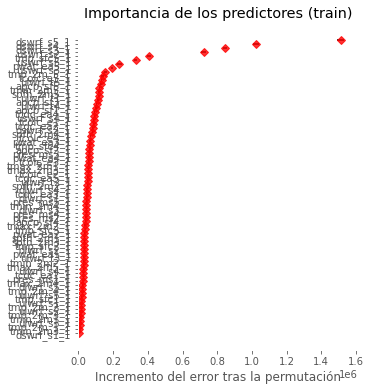

In [143]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');

## XGBoost

In [144]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'max_depth'        : [None, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'n_estimators'     : sp_randint(50, 500)
              }

# Búsqueda por random search con validación cruzada
# ==============================================================================

budget = 100
grid = RandomizedSearchCV(
    estimator  = XGBRegressor(random_state = 10),
    param_distributions= param_grid,
    scoring    = 'neg_root_mean_squared_error',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = ps,
    refit      = True,
    verbose    = 0,
    n_iter=budget
)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_xgb = time.time()
grid.fit(X = X_train, y = y_train)
fin_xgb = time.time()

# Error
rmse_xgb = -grid.best_score_
print("RMSE de HistGradientBoosting ajustado con randomSearch: ", rmse_xgb)

# Tiempo de ejecución
run_time_xgb = fin_xgb-inicio_xgb
print('El metodo de HistGradientBoosting con randomSearch ha tardado, RMSE:', run_time_xgb, 'segundos')

RMSE de HistGradientBoosting ajustado con randomSearch:  2802113.9340112726
El metodo de HistGradientBoosting con randomSearch ha tardado, RMSE: 331.9414129257202 segundos


In [154]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'max_depth'        : [None, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'n_estimators'     : sp_randint(50, 500)
              }

# Búsqueda por random search con validación cruzada
# ==============================================================================

budget = 100
grid = RandomizedSearchCV(
    estimator  = XGBRegressor(random_state = 10),
    param_distributions= param_grid,
    scoring    = 'neg_mean_absolute_error',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = ps,
    refit      = True,
    verbose    = 0,
    n_iter=budget
)

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_xgb = time.time()
grid.fit(X = X_train, y = y_train)
fin_xgb = time.time()

# Error
mae_xgb = -grid.best_score_
print("MAE de XGBoost ajustado con randomSearch: ", mae_xgb)

# Tiempo de ejecución
mae_run_time_xgb = fin_xgb-inicio_xgb
print('El metodo de HistGradientBoosting con randomSearch ha tardado, MAE:', mae_run_time_xgb, 'segundos')

MAE de XGBoost ajustado con randomSearch:  1957160.5633561644
El metodo de HistGradientBoosting con randomSearch ha tardado, MAE: 358.62204098701477 segundos


In [155]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

param_learning_rate param_max_depth param_n_estimators param_subsample  \
7                  0.2               5                104               1   
21                 0.1              10                270             0.5   
60                 0.1              10                374             0.5   
51                 0.2               5                191               1   

    mean_test_score  std_test_score  
7     -1.957161e+06             0.0  
21    -1.959799e+06             0.0  
60    -1.960344e+06             0.0  
51    -1.969089e+06             0.0

In [156]:
grid.best_params_, -grid.best_score_

({'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 104, 'subsample': 1},
 1957160.5633561644)

## LightGBM

In [147]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'     : sp_randint(100, 5000),
              'max_depth'        : [-1, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.001, 0.01, 0.1],
              'boosting_type'    : ['gbdt']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
budget = 100
light_gbm = RandomizedSearchCV(
        estimator  = LGBMRegressor(random_state=10),
        param_distributions = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = ps, 
        refit      = True,
        verbose    = 0,
        return_train_score = True,
        n_iter=budget
       )

# Reproducibilidad
np.random.seed(10)

# Entrenar el proceso de autoajuste midiendo el tiempo de ejecución
inicio_light_gbm = time.time()
light_gbm.fit(X = X_train, y = y_train)
fin_light_gbm = time.time()

# Error
rmse_light_gbm = -light_gbm.best_score_
print("RMSE de LightGBM ajustado con randomSearch: ", rmse_light_gbm)

# Tiempo de ejecución
run_time_light_gbm = fin_light_gbm-inicio_light_gbm
print('El metodo de LightGBM con randomSearch ha tardado, RMSE:', run_time_light_gbm, 'segundos')

[LightGBM] [Warning] [LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

In [148]:
# Repetimos la validación cruzada con el MAE en vez de RMSE
# ==============================================================================
budget = 100
light_gbm = RandomizedSearchCV(
        estimator  = LGBMRegressor(random_state=10),
        param_distributions = param_grid,
        scoring    = 'neg_mean_absolute_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = ps, 
        refit      = True,
        verbose    = 0,
        return_train_score = True,
        n_iter=budget
       )

# Reproducibilidad
np.random.seed(10)

inicio_light_gbm = time.time()
light_gbm.fit(X = X_train, y = y_train)
fin_light_gbm = time.time()

# Error
mae_light_gbm = -light_gbm.best_score_
print("MAE de LightGBM ajustado con randomSearch: ", mae_light_gbm)

# Tiempo de ejecución
mae_run_time_light_gbm = fin_light_gbm-inicio_light_gbm
print('El metodo de LightGBM con randomSearch ha tardado, MAE:', mae_run_time_light_gbm, 'segundos')

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

In [149]:
# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

param_learning_rate param_max_depth param_n_estimators param_subsample  \
7                  0.2               5                104               1   
21                 0.1              10                270             0.5   
60                 0.1              10                374             0.5   
51                 0.2               5                191               1   

    mean_test_score  std_test_score  
7     -1.957161e+06             0.0  
21    -1.959799e+06             0.0  
60    -1.960344e+06             0.0  
51    -1.969089e+06             0.0

## Conclusiones

In [185]:
# RMSE
# ==============================================================================
# Imprimimos el DataFrame de los básicos
print(rmse_df)


# Creamos un diccionario con los valores de cada columna
data = {
    'original': [rmse_svm_lineal, rmse_svm_radial, rmse_rforest, rmse_gb, rmse_xgb, rmse_light_gbm],
    'gridSearch': [rmse_svm_lineal_grid, rmse_svm_radial_grid, '-', '-', '-', '-'],
    'randomSearch': [rmse_svm_lineal_random, rmse_svm_radial_random, rmse_rforest_random, rmse_gb_random, '-', '-'],
    'bayesSeach': [rmse_svm_lineal_bayes, rmse_svm_radial_bayes, '-', '-', '-', '-'],
    'extrarandom': ['-', '-', rmse_rforest_extra, '-', '-', '-']
}

# Creamos un DataFrame a partir del diccionario
rmse2_df = pd.DataFrame(data, index=['SVM_Lineal', 'SVM_Radial', 'RF', 'GradientB', 'XGBoost', 'LightGBM'])

# Imprimimos el DataFrame
rmse2_df

                           original      gridSearch    randomSearch  \
K-nn           [3012505.1605153284]  2935959.144719   2938773.94315   
arbolDecision   [4114831.985143367]  3101087.825647  3101087.825647   
arbolLineal     [3133509.690233524]  2791815.855998  2791815.855998   
LinealMC        [2794559.509924959]  2794559.509925  2794559.509925   
Ridge                2808892.218674               -               -   
Lasso                2813298.536988               -               -   
Elastic-net          2816612.656744               -               -   

                   bayesSeach  
K-nn           2935959.144719  
arbolDecision  3101087.825647  
arbolLineal    2791815.855998  
LinealMC       2794559.509925  
Ridge                       -  
Lasso                       -  
Elastic-net                 -  


original      gridSearch    randomSearch  \
SVM_Lineal   [7562110.920280724]  4636353.462063  4636353.462063   
SVM_Radial   [7627920.849644647]  7595304.122321  5687463.592399   
RF          [3031433.8739495566]               -   2938773.94315   
GradientB   [3012505.1605153284]               -  2678875.305104   
XGBoost           2802113.934011               -               -   
LightGBM          2712228.882868               -               -   

                bayesSeach     extrarandom  
SVM_Lineal  4636353.462063               -  
SVM_Radial  5499718.104428               -  
RF                       -  2632373.243907  
GradientB                -               -  
XGBoost                  -               -  
LightGBM                 -               -

Comparando RMSE, el mejor modelo es Random Forest - Extremely Randomized Tree con un error de 2632373 seguido muy de cerca de HistGradientBoosting con randomSearch con 2678875.

In [186]:
# MAE
# ==============================================================================
# Imprimimos el DataFrame
print(mae_df)

# Creamos un diccionario con los valores de cada columna
data = {
    'original': [mae_svm_lineal, mae_svm_radial, mae_rforest, mae_gb, mae_xgb, mae_light_gbm],
    'gridSearch': [mae_svm_lineal_grid, mae_svm_radial_grid, '-', '-', '-', '-'],
    'randomSearch': [mae_svm_lineal_random, mae_svm_radial_random, mae_rforest_random, mae_gb_random, '-', '-'],
    'bayesSeach': [mae_svm_lineal_bayes, mae_svm_radial_bayes, '-', '-', '-', '-'],
    'extrarandom': ['-', '-', mae_rforest_extra, '-', '-', '-']
}

# Creamos un DataFrame a partir del diccionario
mae_avanzado_df = pd.DataFrame(data, index=['SVM_Lineal', 'SVM_Radial', 'RF', 'GradientB', 'XGBoost', 'LightGBM'])

# Imprimimos el DataFrame
mae_avanzado_df

                           original      gridSearch    randomSearch  \
K-nn           [2141476.7506849314]  2069520.057954   2938773.94315   
arbolDecision   [2742760.684931507]  2165689.172741  2165689.172741   
arbolLineal     [2262895.106849315]  1966397.278251  1966397.278251   
LinealMC       [1968858.6833077967]  1968858.683308  1968858.683308   
Ridge                1864033.592306               -               -   
Lasso                1869288.250728               -               -   
Elastic-net          1871293.541831               -               -   

                   bayesSeach  
K-nn            2089487.00049  
arbolDecision  2165689.172741  
arbolLineal    1966397.278251  
LinealMC       1968858.683308  
Ridge                       -  
Lasso                       -  
Elastic-net                 -  


original      gridSearch    randomSearch  \
SVM_Lineal   [6589538.182445659]  3738997.455057  3738997.455057   
SVM_Radial   [6651347.616301873]  6619251.297415  4712411.471086   
RF           [2116038.238356164]               -  2683038.097129   
GradientB   [2141476.7506849314]               -  1891709.271372   
XGBoost           1957160.563356               -               -   
LightGBM          1899103.141754               -               -   

                bayesSeach     extrarandom  
SVM_Lineal  3738997.455057               -  
SVM_Radial   4500600.46023               -  
RF                       -  1849947.635845  
GradientB                -               -  
XGBoost                  -               -  
LightGBM                 -               -

Segun el MAE el mejor modelo tambien es el ExtremelyRandomized Tree de RF, pero esta vez seguido de los modelos de regresión lineal.

In [187]:
# Imprimimos el DataFrame
print(run_time_df)

# Creamos un diccionario con los valores de cada columna
data = {
    'original': [run_time_svm_lineal, run_time_svm_radial, run_time_rforest, run_time_gb, run_time_xgb, run_time_light_gbm],
    'gridSearch': [run_time_svm_lineal_grid, run_time_svm_radial_grid, '-', '-', '-', '-'],
    'randomSearch': [run_time_svm_lineal_random, run_time_svm_radial_random, run_time_rforest_random, run_time_gb_random, '-', '-'],
    'bayesSeach': [run_time_svm_lineal_bayes, run_time_svm_radial_bayes, '-', '-', '-', '-'],
    'extrarandom': ['-', '-', run_time_rforest_extra, '-', '-', '-']
}

# Creamos un DataFrame a partir del diccionario
run_time_avanzado_df = pd.DataFrame(data, index=['SVM_Lineal', 'SVM_Radial', 'RF', 'GradientB', 'XGBoost', 'LightGBM'])

# Imprimimos el DataFrame
run_time_avanzado_df

                 original gridSearch randomSearch bayesSeach
K-nn             0.068599   8.115384     0.489765  83.657124
arbolDecision    0.249815   7.259198      3.27222  53.329605
arbolLineal      0.249815   0.245458     0.231963  57.653199
LinealMC         0.095143   0.875113     0.454989  47.611388
Ridge            0.252985          -            -          -
Lasso            8.917836          -            -          -
Elastic-net    105.265040          -            -          -


original gridSearch randomSearch  bayesSeach extrarandom
SVM_Lineal    0.775640   7.700974     4.092073  488.374366           -
SVM_Radial    1.541683   6.577136    37.712982  660.148846           -
RF            0.740348          -   149.612218           -   56.950233
GradientB     0.813957          -    110.17471           -           -
XGBoost     331.941413          -            -           -           -
LightGBM    394.372313          -            -           -           -

El mejor modelo en terminos de tiempo de ejecucion evaluando el RMSE son los modelos originales de los métodos básicos. Por el lado contrario, concluimos que no merece la pena realizar la busqueda de parametros por bayes ya que llegamos normalmene a las mismas conclusiones que con gridSearch pero con un tiempo de ejecucion mucho más significativo. 

El modelo que mejor resultado nos ha dado en terminos de error ha tardado un término medio que aunque no es el más rápido, no tarda en exceso y da buenos resultados.

Respecto al equilibrio entre el error y el tiempo de ejecución en general vemos que son muy equilibrados. Esto lo podemos ver en que el que menor error tiene tarda un tiempo razonable. Podemos ver una excepción en los de bayesSerach en los que el tiempo es desorbitado.

In [188]:
# Imprimimos el DataFrame
print(run_time_df)

# Creamos un diccionario con los valores de cada columna
data = {
    'original': [run_time_svm_lineal, run_time_svm_radial, run_time_rforest, run_time_gb, run_time_xgb, run_time_light_gbm],
    'gridSearch': [mae_run_time_svm_lineal_grid, run_time_svm_radial_grid, '-', '-', '-', '-'],
    'randomSearch': [mae_run_time_svm_lineal_random, mae_run_time_svm_radial_random, mae_run_time_rforest_random, mae_run_time_gb_random, '-', '-'],
    'bayesSeach': [mae_run_time_svm_lineal_bayes, mae_run_time_svm_radial_bayes, '-', '-', '-', '-'],
    'extrarandom': ['-', '-', mae_run_time_rforest_extra, '-', '-', '-']
}

# Creamos un DataFrame a partir del diccionario
run_time_avanzado_df = pd.DataFrame(data, index=['SVM_Lineal', 'SVM_Radial', 'RF', 'GradientB', 'XGBoost', 'LightGBM'])

# Imprimimos el DataFrame
run_time_avanzado_df

                 original gridSearch randomSearch bayesSeach
K-nn             0.068599   8.115384     0.489765  83.657124
arbolDecision    0.249815   7.259198      3.27222  53.329605
arbolLineal      0.249815   0.245458     0.231963  57.653199
LinealMC         0.095143   0.875113     0.454989  47.611388
Ridge            0.252985          -            -          -
Lasso            8.917836          -            -          -
Elastic-net    105.265040          -            -          -


original gridSearch randomSearch  bayesSeach extrarandom
SVM_Lineal    0.775640   3.840956      3.72162  884.982692           -
SVM_Radial    1.541683   6.577136  3710.157393  342.540136           -
RF            0.740348          -    143.20459           -   55.193722
GradientB     0.813957          -   162.850176           -           -
XGBoost     331.941413          -            -           -           -
LightGBM    394.372313          -            -           -           -

Si analizamos el tiempo de ejecución segun el MAE, vemos que los tiempos son muy parecidos, siendo menores en general pero en randomSearch tarda algo más.